## **Introduction**

Welcome to this [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) dataset tutorial ! 

We will first do an Exploratory Data Analysis, then we will clean the data, do some Feature Engineering and train our models, one lasso and one gradient boosting decision tree. We fill finally blend them to make our final model, which gives a score in the top 10% of the leaderboard (0.12263).

## **Libraries Import**

In [1]:
# for data processing
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for statistical tests
import scipy.stats as stats

# for transformations
from sklearn.preprocessing import RobustScaler

# for capping
from statsmodels.tsa.api import Holt

# for the lasso model
from sklearn.linear_model import Lasso

# for the xgboost model
from xgboost import XGBRegressor

# for evaluation
from sklearn.metrics import mean_squared_log_error

# for doing a grid seach on hyperparameters
from sklearn.model_selection import GridSearchCV

# for retrieving submission score
import subprocess
import re

# for dismissing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# for displaying all the columns and all the rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## **Inspection of the Datasets**

In [3]:
train_data = pd.read_csv("train.csv")
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
test_data = pd.read_csv("test.csv")
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [5]:
train_data.shape

(1460, 81)

In [6]:
test_data.shape

(1459, 80)

We can see that we have 80 features and 1 target feature (the sale price).

## **Features correlation**

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
num_feat = [col for col in train_data.drop(["Id"], axis=1) if train_data.dtypes[col] != "object"]

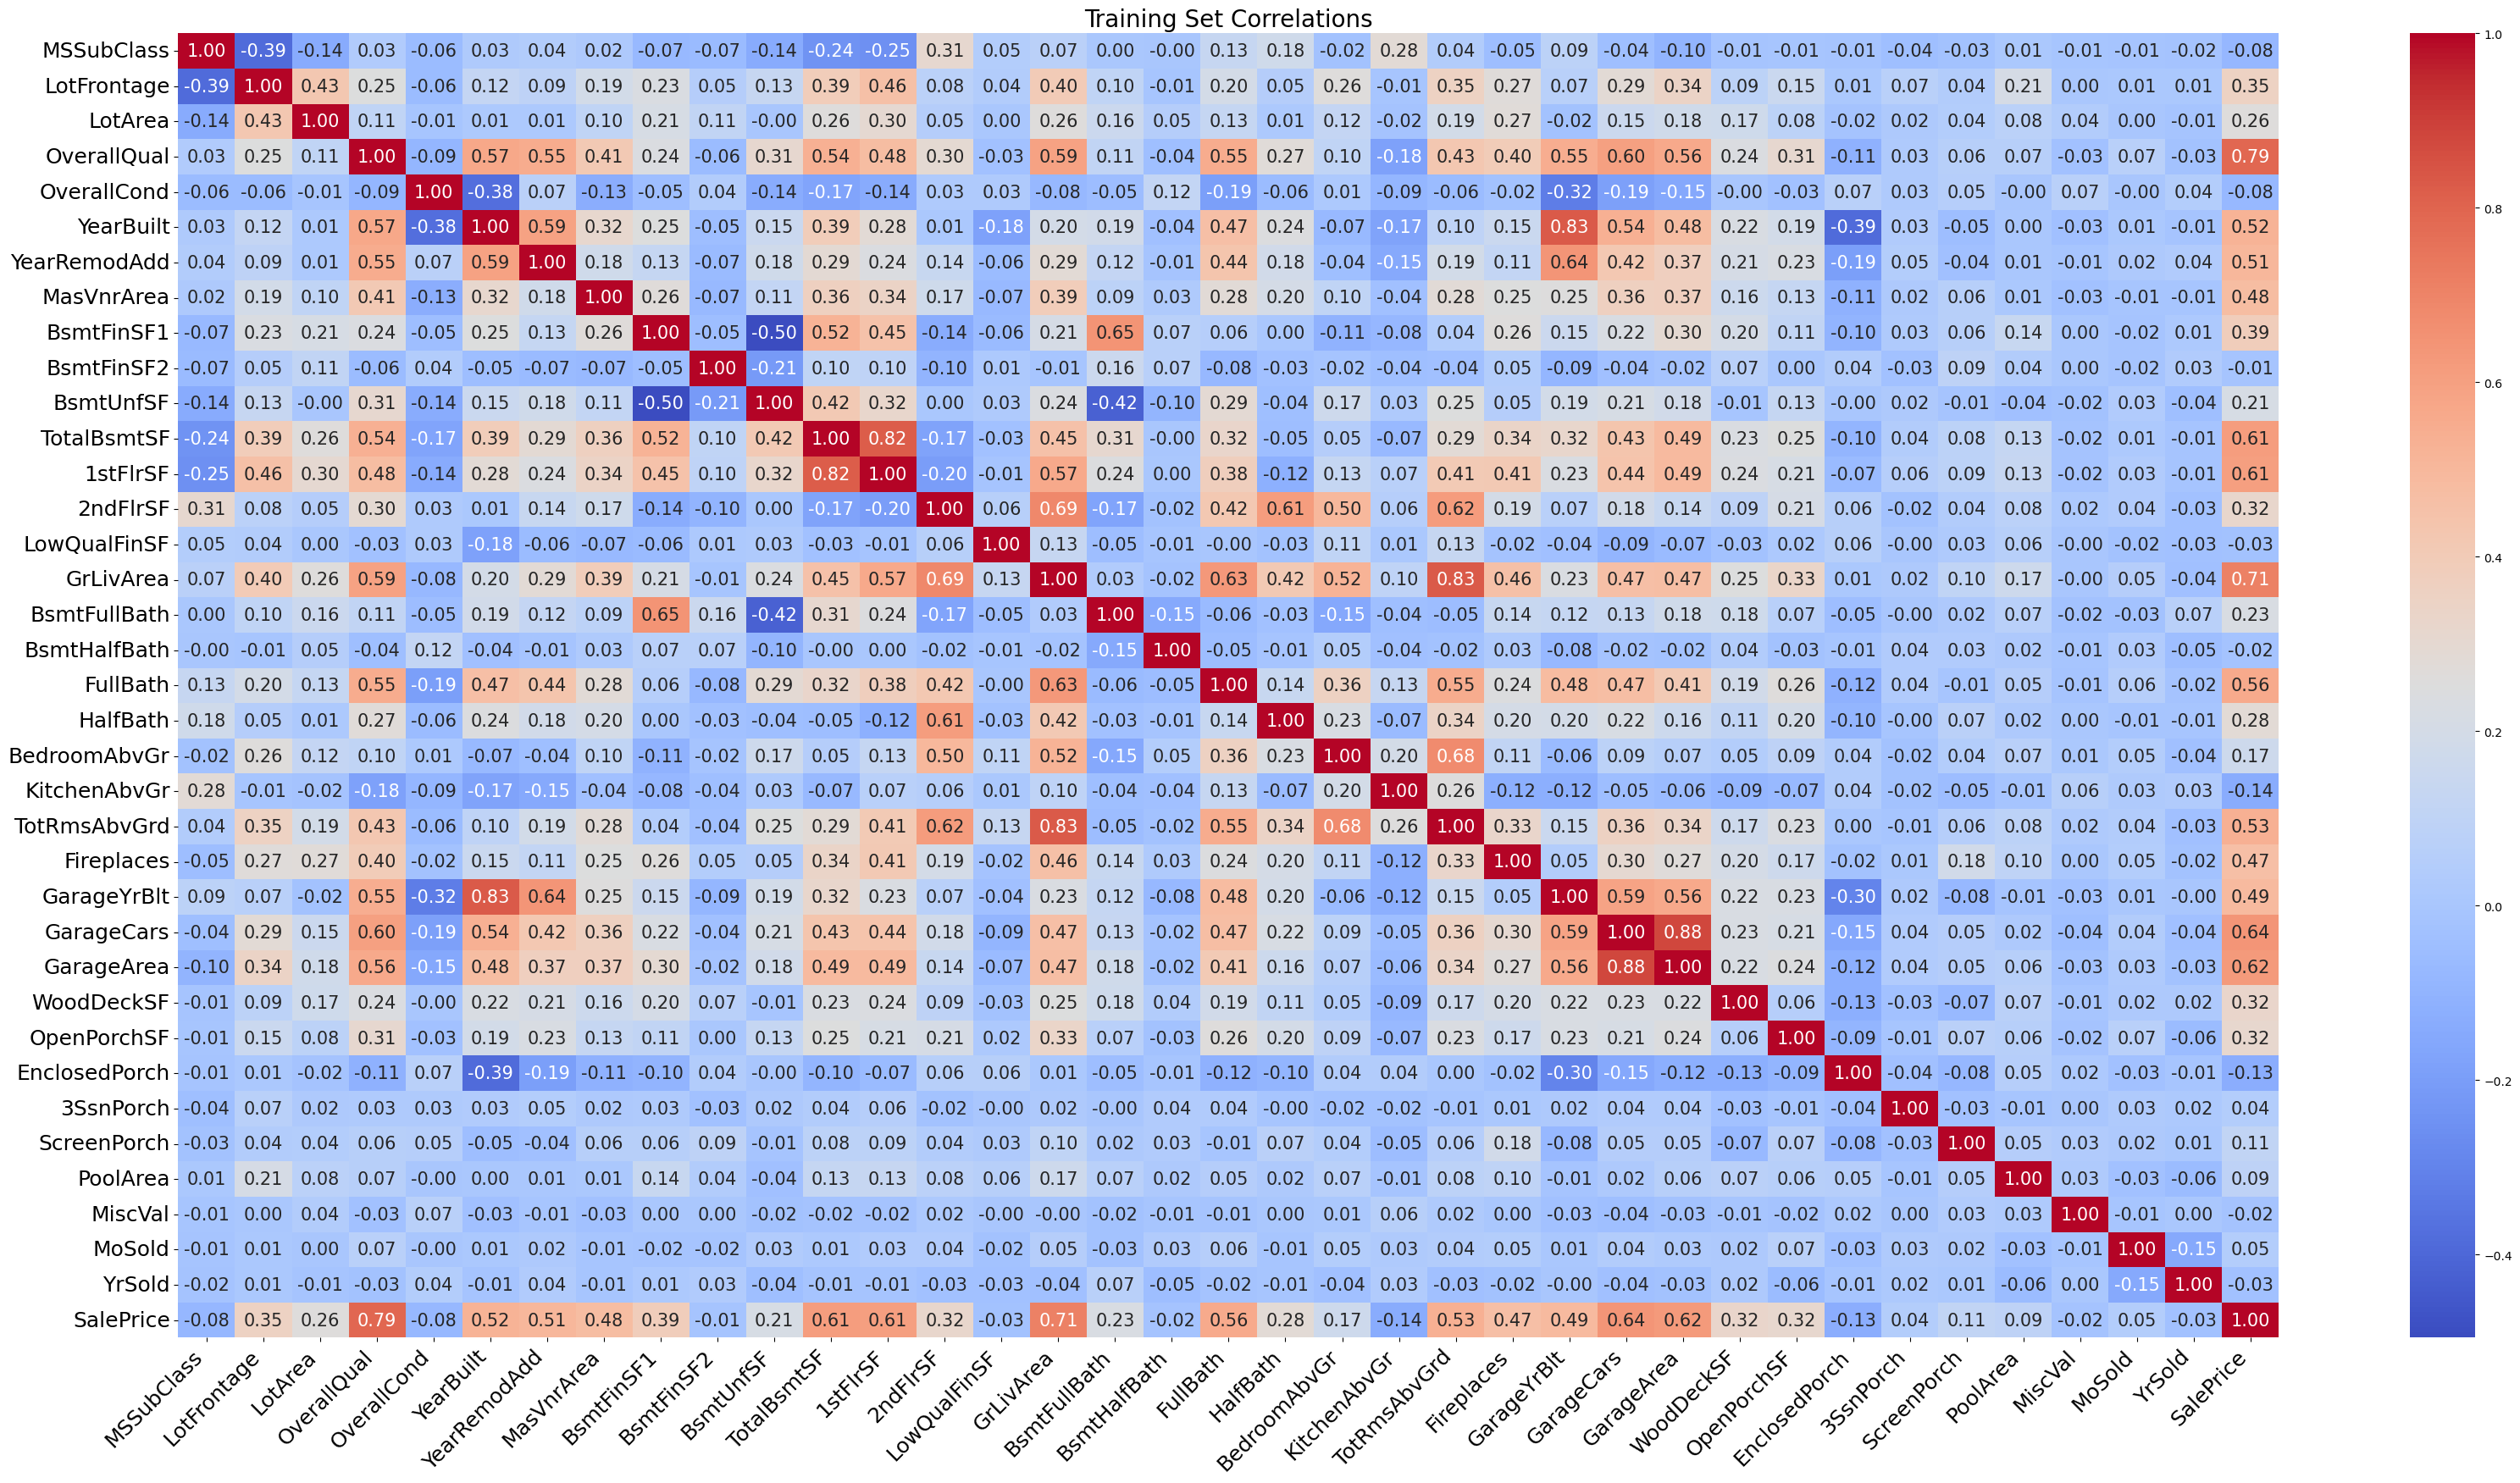

In [9]:
fig, ax = plt.subplots(figsize=(40, 20))

heatmap = sns.heatmap(train_data[num_feat].corr(),
            annot=True, cmap="coolwarm", 
            annot_kws={"size":15}, fmt=".2f")

colorbar = heatmap.collections[0].colorbar

plt.xticks(size=18, rotation=45, ha="right")
plt.yticks(size=18)

ax.set_title("Training Set Correlations", size=20)

plt.show()

The quality of the dwelling (OverallQual) and the surface above ground (GrLivArea) are very correlated with our target, the sale price.

We can notice several pairs of strongly correlated features: GarageYrBuilt/YearBuilt, TotRmsAbvGrd/GrLivArea, 1stFlrSF/TotalBsmtSF and GarageCars/GarageArea, to say the most important.

Of these pairs, we will keep only one feature, the one most correlated with the sale price.

Let's make a list of numeric features to drop which we will use when selecting the features.

In [10]:
num_feat_to_drop = ["TotRmsAbvGrd", "TotalBsmtSF", "GarageArea", "GarageYrBlt"]

## **Anomalies check**

To facilitate this process, we will concatenate the training and test dataframes.

In [11]:
all_data = pd.concat([train_data, test_data]).reset_index(drop=True)

Let's check if there are anomalies in the numeric features.

In [12]:
all_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

### **Garage construction year anomaly**

We notice a max value of 2207 for GarageYrBuilt, which is an anomaly.

Let's check the distribution of the garage construction years.

<Axes: xlabel='GarageYrBlt', ylabel='Count'>

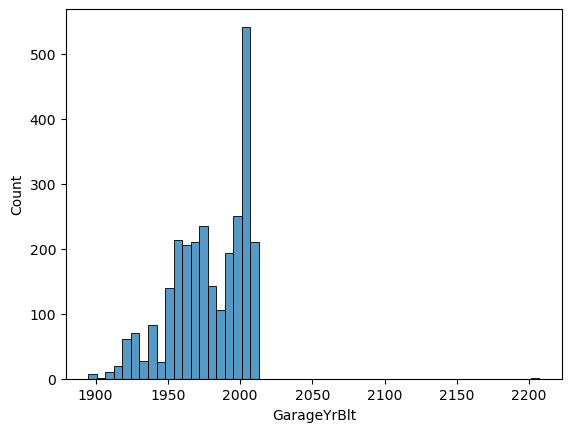

In [13]:
sns.histplot(all_data["GarageYrBlt"])

It seems that there anomalies beyond 2200.

In [14]:
all_data[all_data["GarageYrBlt"] > 2200]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2592  2593          20       RL         68.0     8298   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2592         HLS    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2592       Norm     1Fam     1Story            8            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2592          2007       Hip  CompShg     VinylSd     VinylSd        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2592         NaN        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2592           Av          GLQ       583.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2592      963.0       1546.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2592      1564         0             0       1564           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2592         2         0             2             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
2592             6        Typ           1          Gd     Attchd       2207.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
2592          RFn         2.0       502.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
2592         132            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
2592         0    NaN   NaN         NaN        0       9    2007      New   

     SaleCondition  SalePrice  
2592       Partial        NaN

This concerns only one row. Since the features YearBuilt and GarageYrBuilt are strongly correlated, we can replace this value by the value of YearBuilt for this row.

In [15]:
all_data.loc[all_data["GarageYrBlt"] > 2200, "GarageYrBlt"] = all_data.loc[all_data["GarageYrBlt"] > 2200, "YearBuilt"]

Let's check the distribution now.

In [16]:
all_data["GarageYrBlt"].describe()

count    2760.000000
mean     1978.040580
std        25.205796
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

### **Area and distance data**

Let's analyze the features about area and distance.

In [17]:
area_dist_feat = []
area_dist_substrs = ["Area", "SF", "Porch", "Frontage"]

for feature in all_data.columns:
    if any(area_dist_substr in feature for area_dist_substr in area_dist_substrs):
        area_dist_feat.append(feature)

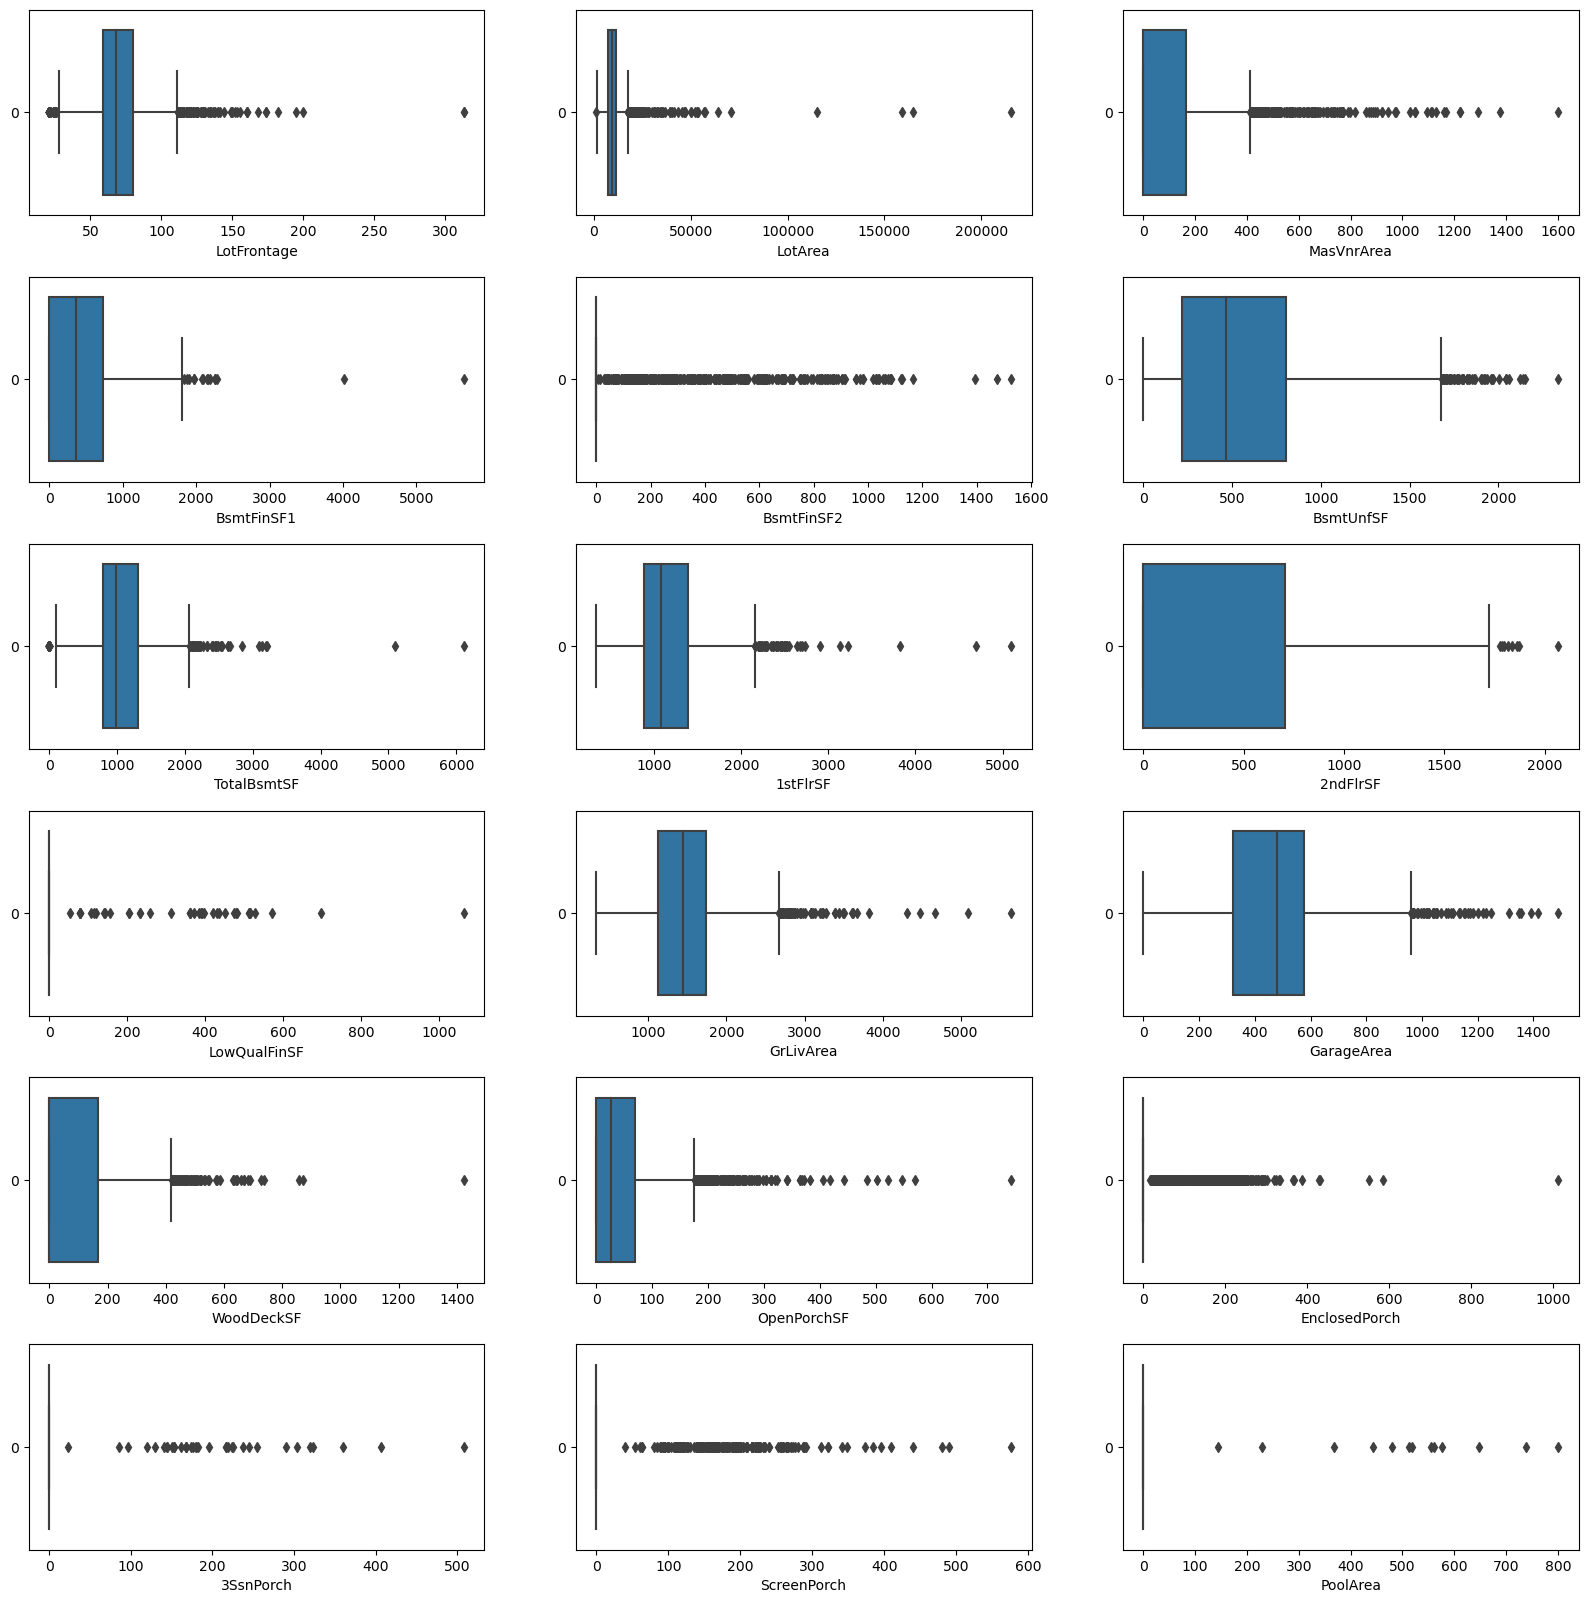

In [18]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))

for i, feature in enumerate(area_dist_feat, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(all_data[feature], orient="h").set(xlabel=feature)

plt.subplots_adjust(hspace=0.3)

These features have outliers but they don't seem to have unusual values.

## **Missing values check**

Let's define a function to display missing values.

In [19]:
def missing_values(df):
    cols = df.columns.tolist()
    missing_cnt = [df[col].isnull().sum() for col in cols]
    missing_df = pd.DataFrame({"Feature": cols, "Missing values": missing_cnt})
    return missing_df.sort_values(by=["Missing values", "Feature"], ascending=False, ignore_index=True)    

Now let's check the missing values.

In [20]:
missing_values(all_data)

Feature  Missing values
0          PoolQC            2909
1     MiscFeature            2814
2           Alley            2721
3           Fence            2348
4      MasVnrType            1766
5       SalePrice            1459
6     FireplaceQu            1420
7     LotFrontage             486
8     GarageYrBlt             159
9      GarageQual             159
10   GarageFinish             159
11     GarageCond             159
12     GarageType             157
13   BsmtExposure              82
14       BsmtCond              82
15       BsmtQual              81
16   BsmtFinType2              80
17   BsmtFinType1              79
18     MasVnrArea              23
19       MSZoning               4
20      Utilities               2
21     Functional               2
22   BsmtHalfBath               2
23   BsmtFullBath               2
24    TotalBsmtSF               1
25       SaleType               1
26    KitchenQual               1
27     GarageCars               1
28     GarageArea               1
29    Exterior2nd               1
30    Exterior1st               1
31     Electrical               1
32      BsmtUnfSF               1
33     BsmtFinSF2               1
34     BsmtFinSF1               1
35         YrSold               0
36   YearRemodAdd               0
37      YearBuilt               0
38     WoodDeckSF               0
39   TotRmsAbvGrd               0
40         Street               0
41    ScreenPorch               0
42  SaleCondition               0
43      RoofStyle               0
44       RoofMatl               0
45       PoolArea               0
46     PavedDrive               0
47    OverallQual               0
48    OverallCond               0
49    OpenPorchSF               0
50   Neighborhood               0
51         MoSold               0
52        MiscVal               0
53     MSSubClass               0
54   LowQualFinSF               0
55       LotShape               0
56      LotConfig               0
57        LotArea               0
58      LandSlope               0
59    LandContour               0
60   KitchenAbvGr               0
61             Id               0
62     HouseStyle               0
63      HeatingQC               0
64        Heating               0
65       HalfBath               0
66      GrLivArea               0
67       FullBath               0
68     Foundation               0
69     Fireplaces               0
70      ExterQual               0
71      ExterCond               0
72  EnclosedPorch               0
73     Condition2               0
74     Condition1               0
75     CentralAir               0
76       BldgType               0
77   BedroomAbvGr               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

There is a lot of features with missing values. Let's examine the features with more than 50 missing values. It is  likely that instead of typing NA, None (for MasVnrType) or 0 (for GarageYrBlt), no values have been typed in this case.

### **Swimming pool**

For the feature PoolQC, there is a feature PoolArea that can tell us if there is no pool when PoolQC is empty.

In [21]:
all_data[all_data["PoolQC"].isnull()]["PoolArea"].value_counts(dropna=False)

PoolArea
0      2906
368       1
444       1
561       1
Name: count, dtype: int64

Except for three rows, there is no pool.

Let's replace the missing values for these 2906 rows. We'll examine the 3 other rows later.

In [22]:
all_data.loc[all_data["PoolArea"] == 0, "PoolQC"] = all_data.loc[all_data["PoolArea"] == 0, "PoolQC"].fillna("NA")

### **Miscellaneous feature**

For the feature MiscFeature, there is a feature MiscVal that can tell us if there is no miscellaneous feature when MiscFeature is empty.

In [23]:
all_data[all_data["MiscFeature"].isnull()]["MiscVal"].value_counts(dropna=False)

MiscVal
0        2813
17000       1
Name: count, dtype: int64

Except for one row, there is no miscellaneous feature for these rows.

Let's replace the missing values for these 2813 rows. We'll examine the other row later.

In [24]:
all_data.loc[all_data["MiscVal"] == 0, "MiscFeature"] = all_data.loc[all_data["MiscVal"] == 0, "MiscFeature"].fillna("NA")

### **Alley and Fence**

For the features Alley and Fence, there is no other feature which allows us to check if there is no alley or no fence. So we have to assume this is the case.

In [25]:
all_data["Alley"].fillna("NA", inplace=True)

In [26]:
all_data["Fence"].fillna("NA", inplace=True)

### **Masonry veneer**

For the feature MasVnrType, there is a feature MasVnrArea that can tell us if there is no masonry veneer when MasVnrType is empty.

In [27]:
all_data[all_data["MasVnrType"].isnull()]["MasVnrArea"].value_counts(dropna=False)

MasVnrArea
0.0      1735
NaN        23
1.0         3
288.0       1
344.0       1
312.0       1
285.0       1
198.0       1
Name: count, dtype: int64

Let's check the rows with a masonry veneer area of 1 sq ft.

In [28]:
all_data[all_data["MasVnrArea"] == 1]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
773    774          20       RL         70.0    10150   Pave    NA      Reg   
1230  1231          90       RL          NaN    18890   Pave    NA      IR1   
2452  2453          20       RM         52.0     8626   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
773          Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1230         Lvl    AllPub    Inside       Gtl       Sawyer      Feedr   
2452         Lvl    AllPub    Inside       Gtl      OldTown       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
773        Norm     1Fam     1Story            5            5       1958   
1230       RRAe   Duplex     1.5Fin            5            5       1977   
2452       Norm     1Fam     1Story            4            6       1956   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
773           1958     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   
1230          1977      Shed  CompShg     Plywood     Plywood        NaN   
2452          1956     Gable  CompShg     MetalSd     MetalSd        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
773          1.0        TA        TA     CBlock       TA       TA   
1230         1.0        TA        TA     CBlock       Gd       TA   
2452         1.0        TA        TA     CBlock      NaN      NaN   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
773            No          Rec       456.0          Unf         0.0   
1230           No          GLQ       498.0          Rec       211.0   
2452          NaN          NaN         0.0          NaN         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
773       456.0        912.0    GasA        Ex          Y      FuseA   
1230      652.0       1361.0    GasA        Ex          Y      SBrkr   
2452        0.0          0.0    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
773        912         0             0        912           0.0           0.0   
1230      1361      1259             0       2620           0.0           0.0   
2452       968         0             0        968           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
773          1         0             2             1          TA   
1230         2         2             4             2          TA   
2452         1         0             2             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
773              5        Typ           0         NaN     Attchd       1958.0   
1230            12        Typ           1          TA    BuiltIn       1977.0   
2452             5        Typ           0         NaN     Attchd       1956.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
773           RFn         1.0       275.0         TA         TA          Y   
1230          RFn         2.0       600.0         TA         TA          N   
2452          Unf         1.0       331.0         Fa         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
773            0            0              0          0            0   
1230         155           24            145          0            0   
2452           0            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
773          0     NA    NA          NA        0       7    2007      COD   
1230         0     NA    NA        Gar2     8300       8    2007       WD   
2452         0     NA    NA          NA        0       5    2007       WD   

     SaleCondition  SalePrice  
773         Normal   114500.0  
1230        Normal   190000.0  
245

These 3 rows are the only ones with a masonry veneer area of 1 sq ft. Let's replace them with a 0 value.

In [29]:
all_data["MasVnrArea"].replace(1.0, 0.0, inplace=True) 

In [30]:
all_data[all_data["MasVnrType"].isnull()]["MasVnrArea"].value_counts(dropna=False)

MasVnrArea
0.0      1738
NaN        23
288.0       1
344.0       1
312.0       1
285.0       1
198.0       1
Name: count, dtype: int64

Except for 5 rows, there is no masonry veneer for these rows.

Let's replace the missing values for these 1758 rows. We'll examine the other rows later.

In [31]:
all_data.loc[all_data["MasVnrArea"] == 0, "MasVnrType"] = all_data.loc[all_data["MasVnrArea"] == 0, "MasVnrType"].fillna("None")

In [32]:
all_data.loc[all_data["MasVnrArea"].isnull(), "MasVnrType"] = all_data.loc[all_data["MasVnrArea"].isnull(), "MasVnrType"].fillna("None")

Let's also replace also the 23 missing values for MasVnrArea.

In [33]:
all_data["MasVnrArea"].fillna(0.0, inplace=True)

### **Fireplace**

For the feature FireplaceQu, there is a feature Fireplaces that can tell us if there is no fireplace when FireplaceQu is empty.

In [34]:
all_data[all_data["FireplaceQu"].isnull()]["Fireplaces"].value_counts(dropna=False)

Fireplaces
0    1420
Name: count, dtype: int64

There is no fireplace for these rows. Let's replace the missing values for these rows.

In [35]:
all_data.loc[all_data["Fireplaces"] == 0, "FireplaceQu"] = all_data.loc[all_data["Fireplaces"] == 0, "FireplaceQu"].fillna("NA")

### **Lot frontage**

About the missing LotFrontage values, let's check the LotConfig for these rows.

In [36]:
all_data[all_data["LotFrontage"].isnull()]["LotConfig"].value_counts(dropna=False)

LotConfig
Inside     271
Corner     104
CulDSac     87
FR2         20
FR3          4
Name: count, dtype: int64

There are several configurations concerned. We will make a deeper analysis later.

### **Garage**

For the features GarageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond, let's first check if the 157 missing values for these features regard the same rows. There are 159 missing values for GarageYrBlt, GarageFinish, GarageQual and GarageCond but the feature GarageType has only 157 missing values. We will check the additional rows later.

In [37]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1     LotFrontage             486
2     GarageYrBlt             159
3      GarageQual             159
4    GarageFinish             159
5      GarageCond             159
6      GarageType             157
7    BsmtExposure              82
8        BsmtCond              82
9        BsmtQual              81
10   BsmtFinType2              80
11   BsmtFinType1              79
12     MasVnrType               5
13       MSZoning               4
14         PoolQC               3
15      Utilities               2
16     Functional               2
17   BsmtHalfBath               2
18   BsmtFullBath               2
19    TotalBsmtSF               1
20       SaleType               1
21    MiscFeature               1
22    KitchenQual               1
23     GarageCars               1
24     GarageArea               1
25    Exterior2nd               1
26    Exterior1st               1
27     Electrical               1
28      BsmtUnfSF               1
29     BsmtFinSF2               1
30     BsmtFinSF1               1
31         YrSold               0
32   YearRemodAdd               0
33      YearBuilt               0
34     WoodDeckSF               0
35   TotRmsAbvGrd               0
36         Street               0
37    ScreenPorch               0
38  SaleCondition               0
39      RoofStyle               0
40       RoofMatl               0
41       PoolArea               0
42     PavedDrive               0
43    OverallQual               0
44    OverallCond               0
45    OpenPorchSF               0
46   Neighborhood               0
47         MoSold               0
48        MiscVal               0
49     MasVnrArea               0
50     MSSubClass               0
51   LowQualFinSF               0
52       LotShape               0
53      LotConfig               0
54        LotArea               0
55      LandSlope               0
56    LandContour               0
57   KitchenAbvGr               0
58             Id               0
59     HouseStyle               0
60      HeatingQC               0
61        Heating               0
62       HalfBath               0
63      GrLivArea               0
64       FullBath               0
65     Foundation               0
66     Fireplaces               0
67    FireplaceQu               0
68          Fence               0
69      ExterQual               0
70      ExterCond               0
71  EnclosedPorch               0
72     Condition2               0
73     Condition1               0
74     CentralAir               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

In [38]:
len(all_data[(all_data["GarageType"].isnull()) & 
           (all_data["GarageYrBlt"].isnull()) & 
           (all_data["GarageFinish"].isnull()) & 
           (all_data["GarageQual"].isnull()) & 
           (all_data["GarageCond"].isnull())])

157

They are the same rows. Now let's check with the feature GarageArea if there is no garage.

In [39]:
all_data[all_data["GarageType"].isnull()]["GarageArea"].value_counts(dropna=False)

GarageArea
0.0    157
Name: count, dtype: int64

There is no garage for these 157 rows.

In [40]:
all_data[all_data["GarageArea"] == 0]["GarageType"].value_counts(dropna=False)

GarageType
NaN    157
Name: count, dtype: int64

And all the rows with a garage area of 0 have null values for these features.

Let's replace the missing values for these 157 rows.

In [41]:
for feature in ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]:
    all_data.loc[all_data["GarageArea"] == 0, feature] = all_data.loc[all_data["GarageArea"] == 0, feature].fillna("NA")

In [42]:
all_data.loc[all_data["GarageArea"] == 0, "GarageYrBlt"] = all_data.loc[all_data["GarageArea"] == 0, "GarageYrBlt"].fillna(0)

### **Basement**

In [43]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1     LotFrontage             486
2    BsmtExposure              82
3        BsmtCond              82
4        BsmtQual              81
5    BsmtFinType2              80
6    BsmtFinType1              79
7      MasVnrType               5
8        MSZoning               4
9          PoolQC               3
10      Utilities               2
11    GarageYrBlt               2
12     GarageQual               2
13   GarageFinish               2
14     GarageCond               2
15     Functional               2
16   BsmtHalfBath               2
17   BsmtFullBath               2
18    TotalBsmtSF               1
19       SaleType               1
20    MiscFeature               1
21    KitchenQual               1
22     GarageCars               1
23     GarageArea               1
24    Exterior2nd               1
25    Exterior1st               1
26     Electrical               1
27      BsmtUnfSF               1
28     BsmtFinSF2               1
29     BsmtFinSF1               1
30         YrSold               0
31   YearRemodAdd               0
32      YearBuilt               0
33     WoodDeckSF               0
34   TotRmsAbvGrd               0
35         Street               0
36    ScreenPorch               0
37  SaleCondition               0
38      RoofStyle               0
39       RoofMatl               0
40       PoolArea               0
41     PavedDrive               0
42    OverallQual               0
43    OverallCond               0
44    OpenPorchSF               0
45   Neighborhood               0
46         MoSold               0
47        MiscVal               0
48     MasVnrArea               0
49     MSSubClass               0
50   LowQualFinSF               0
51       LotShape               0
52      LotConfig               0
53        LotArea               0
54      LandSlope               0
55    LandContour               0
56   KitchenAbvGr               0
57             Id               0
58     HouseStyle               0
59      HeatingQC               0
60        Heating               0
61       HalfBath               0
62      GrLivArea               0
63     GarageType               0
64       FullBath               0
65     Foundation               0
66     Fireplaces               0
67    FireplaceQu               0
68          Fence               0
69      ExterQual               0
70      ExterCond               0
71  EnclosedPorch               0
72     Condition2               0
73     Condition1               0
74     CentralAir               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

For the features BsmtQual, BsmtCond, BsmtFinType1, BsmtFinType2 and BsmtExposure, let's first check if the 79 missing values for these features regard the same rows. There are more than 79 missing values for BsmtQual, BsmtCond, BsmtFinType2 and BsmtExposure but BsmtFinType1 has only 79 missing values. We will check the additional rows later.

In [44]:
len(all_data[(all_data["BsmtQual"].isnull()) & 
               (all_data["BsmtCond"].isnull()) & 
               (all_data["BsmtFinType1"].isnull()) & 
               (all_data["BsmtFinType2"].isnull()) & 
               (all_data["BsmtExposure"].isnull())])

79

They are the same rows. Now let's check with the feature TotalBsmtSF if there is no basement.

In [45]:
all_data[all_data["BsmtFinType1"].isnull()]["TotalBsmtSF"].value_counts(dropna=False)

TotalBsmtSF
0.0    78
NaN     1
Name: count, dtype: int64

There is no basement for these 79 rows.

Let's replace the missing values for these rows.

In [46]:
for feature in ["BsmtQual", "BsmtCond", "BsmtFinType1", "BsmtFinType2", "BsmtExposure"]:
    all_data.loc[all_data["TotalBsmtSF"] == 0, feature] = all_data.loc[all_data["TotalBsmtSF"] == 0, feature].fillna("NA")
    all_data.loc[all_data["TotalBsmtSF"].isnull(), feature] = all_data.loc[all_data["TotalBsmtSF"].isnull(), feature].fillna("NA")

In [47]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1     LotFrontage             486
2      MasVnrType               5
3        MSZoning               4
4          PoolQC               3
5    BsmtExposure               3
6        BsmtCond               3
7       Utilities               2
8     GarageYrBlt               2
9      GarageQual               2
10   GarageFinish               2
11     GarageCond               2
12     Functional               2
13       BsmtQual               2
14   BsmtHalfBath               2
15   BsmtFullBath               2
16    TotalBsmtSF               1
17       SaleType               1
18    MiscFeature               1
19    KitchenQual               1
20     GarageCars               1
21     GarageArea               1
22    Exterior2nd               1
23    Exterior1st               1
24     Electrical               1
25      BsmtUnfSF               1
26   BsmtFinType2               1
27     BsmtFinSF2               1
28     BsmtFinSF1               1
29         YrSold               0
30   YearRemodAdd               0
31      YearBuilt               0
32     WoodDeckSF               0
33   TotRmsAbvGrd               0
34         Street               0
35    ScreenPorch               0
36  SaleCondition               0
37      RoofStyle               0
38       RoofMatl               0
39       PoolArea               0
40     PavedDrive               0
41    OverallQual               0
42    OverallCond               0
43    OpenPorchSF               0
44   Neighborhood               0
45         MoSold               0
46        MiscVal               0
47     MasVnrArea               0
48     MSSubClass               0
49   LowQualFinSF               0
50       LotShape               0
51      LotConfig               0
52        LotArea               0
53      LandSlope               0
54    LandContour               0
55   KitchenAbvGr               0
56             Id               0
57     HouseStyle               0
58      HeatingQC               0
59        Heating               0
60       HalfBath               0
61      GrLivArea               0
62     GarageType               0
63       FullBath               0
64     Foundation               0
65     Fireplaces               0
66    FireplaceQu               0
67          Fence               0
68      ExterQual               0
69      ExterCond               0
70  EnclosedPorch               0
71     Condition2               0
72     Condition1               0
73     CentralAir               0
74   BsmtFinType1               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

## **Missing values deep dive**

First, let's define functions for missing values imputation, whether the data are numeric or categorical.

In [48]:
def missing_val_imput(train_data, base_feat, null_feat, numeric=True):
    
    if numeric:
        # replace with the median of the base_feat group
        base_df = pd.DataFrame(train_data.groupby(base_feat)[null_feat].median()).reset_index()
        suffix_str = "_median"
    else:
        # replace with the mode of the base_feat group
        base_df = pd.DataFrame(train_data.groupby(base_feat, observed=True)[null_feat].apply(lambda x: x.mode()[0])).reset_index()
        suffix_str = "_mode"
        
    merged_df = all_data.merge(base_df, on=base_feat, how="left", suffixes=("", suffix_str), copy=False)
    merged_df[null_feat].fillna(merged_df[null_feat + suffix_str], inplace=True)
    merged_df.drop(columns=[null_feat + suffix_str], inplace=True)
    all_data.update(merged_df)

### **Lot Frontage**

The missing values of the LotFrontage feature will be filled with the median, which isn't sensitive to outliers. But using the median of all the dataset is not the wisest choice. Let's explore the lot configs.

#### *LotFrontage by LotConfig plotting*

In [49]:
train_data[~train_data["LotFrontage"].isnull()]["LotConfig"].value_counts()

LotConfig
Inside     918
Corner     201
CulDSac     45
FR2         33
FR3          4
Name: count, dtype: int64

Let's plot the LotFrontage distribution for each LotConfig. The dotted lines are the medians.

In [50]:
ltcfgs = train_data["LotConfig"].unique()

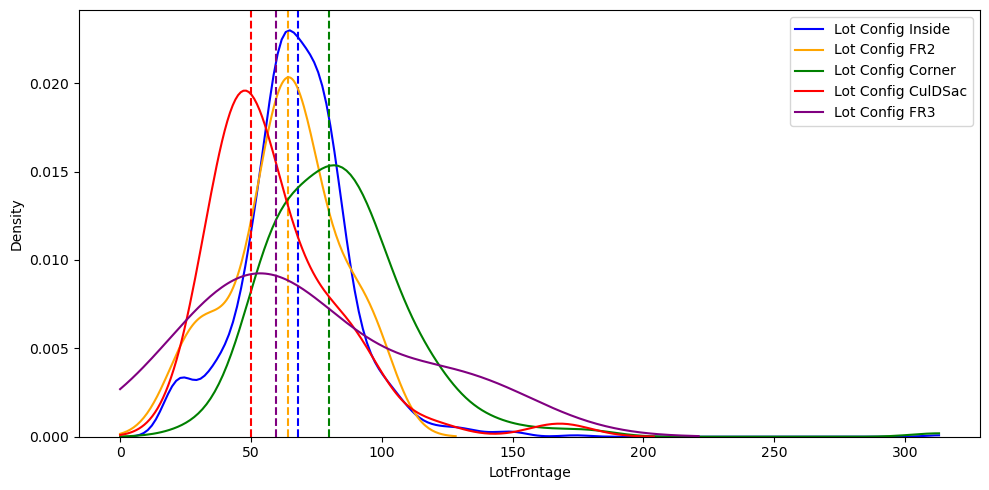

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))

colors = ["blue", "orange", "green", "red", "purple"]

for i, ltcfg in enumerate(ltcfgs):
    
    color = colors[i]

    ltcfg_data = train_data[train_data["LotConfig"] == ltcfg]    
    
    sns.kdeplot(ltcfg_data, x="LotFrontage", ax=ax, color=color,
                clip=(0, max(train_data["LotFrontage"])), label="Lot Config {}".format(ltcfg))

    ltfrtg_mean = ltcfg_data["LotFrontage"].mean()
    ltfrtg_median = ltcfg_data["LotFrontage"].median()

    plt.axvline(x=ltfrtg_median, linestyle="--", color=color)

plt.tight_layout()

plt.legend()

plt.plot();

In terms of medians, there seems to have three distinct groups: 
- the cul-de-sacs
- the inside lots and the lots with frontage on 2 or 3 sides (FR2 and FR3)
- and the lots in corner

The lots with frontage on 3 sides have a different distribution from the lots with frontage on 2 sides and the inside lots but since only 4 have 3 sides, whe're not gonna do a deeper examination.

In [52]:
missing_val_imput(train_data, ["LotConfig"], "LotFrontage")

In [53]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1      MasVnrType               5
2        MSZoning               4
3          PoolQC               3
4    BsmtExposure               3
5        BsmtCond               3
6       Utilities               2
7     GarageYrBlt               2
8      GarageQual               2
9    GarageFinish               2
10     GarageCond               2
11     Functional               2
12       BsmtQual               2
13   BsmtHalfBath               2
14   BsmtFullBath               2
15    TotalBsmtSF               1
16       SaleType               1
17    MiscFeature               1
18    KitchenQual               1
19     GarageCars               1
20     GarageArea               1
21    Exterior2nd               1
22    Exterior1st               1
23     Electrical               1
24      BsmtUnfSF               1
25   BsmtFinType2               1
26     BsmtFinSF2               1
27     BsmtFinSF1               1
28         YrSold               0
29   YearRemodAdd               0
30      YearBuilt               0
31     WoodDeckSF               0
32   TotRmsAbvGrd               0
33         Street               0
34    ScreenPorch               0
35  SaleCondition               0
36      RoofStyle               0
37       RoofMatl               0
38       PoolArea               0
39     PavedDrive               0
40    OverallQual               0
41    OverallCond               0
42    OpenPorchSF               0
43   Neighborhood               0
44         MoSold               0
45        MiscVal               0
46     MasVnrArea               0
47     MSSubClass               0
48   LowQualFinSF               0
49       LotShape               0
50    LotFrontage               0
51      LotConfig               0
52        LotArea               0
53      LandSlope               0
54    LandContour               0
55   KitchenAbvGr               0
56             Id               0
57     HouseStyle               0
58      HeatingQC               0
59        Heating               0
60       HalfBath               0
61      GrLivArea               0
62     GarageType               0
63       FullBath               0
64     Foundation               0
65     Fireplaces               0
66    FireplaceQu               0
67          Fence               0
68      ExterQual               0
69      ExterCond               0
70  EnclosedPorch               0
71     Condition2               0
72     Condition1               0
73     CentralAir               0
74   BsmtFinType1               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

## **Other rows**

### **Category Casting**

First let's do a category casting for categorical features.

In [54]:
for col in all_data.columns:
    if all_data[col].dtype == "object":
        all_data[col] = all_data[col].astype("category")

And let's get back our updated train_data and test_data.

In [55]:
train_data, test_data = all_data[:1460], all_data[1460:]

In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [57]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   int64   
 2   MSZoning       1455 non-null   category
 3   LotFrontage    1459 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   Alley          1459 non-null   category
 7   LotShape       1459 non-null   category
 8   LandContour    1459 non-null   category
 9   Utilities      1457 non-null   category
 10  LotConfig      1459 non-null   category
 11  LandSlope      1459 non-null   category
 12  Neighborhood   1459 non-null   category
 13  Condition1     1459 non-null   category
 14  Condition2     1459 non-null   category
 15  BldgType       1459 non-null   category
 16  HouseStyle     1459 non-null   category
 17  OverallQual    1459 non-null  

In [58]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1      MasVnrType               5
2        MSZoning               4
3          PoolQC               3
4    BsmtExposure               3
5        BsmtCond               3
6       Utilities               2
7     GarageYrBlt               2
8      GarageQual               2
9    GarageFinish               2
10     GarageCond               2
11     Functional               2
12       BsmtQual               2
13   BsmtHalfBath               2
14   BsmtFullBath               2
15    TotalBsmtSF               1
16       SaleType               1
17    MiscFeature               1
18    KitchenQual               1
19     GarageCars               1
20     GarageArea               1
21    Exterior2nd               1
22    Exterior1st               1
23     Electrical               1
24      BsmtUnfSF               1
25   BsmtFinType2               1
26     BsmtFinSF2               1
27     BsmtFinSF1               1
28         YrSold               0
29   YearRemodAdd               0
30      YearBuilt               0
31     WoodDeckSF               0
32   TotRmsAbvGrd               0
33         Street               0
34    ScreenPorch               0
35  SaleCondition               0
36      RoofStyle               0
37       RoofMatl               0
38       PoolArea               0
39     PavedDrive               0
40    OverallQual               0
41    OverallCond               0
42    OpenPorchSF               0
43   Neighborhood               0
44         MoSold               0
45        MiscVal               0
46     MasVnrArea               0
47     MSSubClass               0
48   LowQualFinSF               0
49       LotShape               0
50    LotFrontage               0
51      LotConfig               0
52        LotArea               0
53      LandSlope               0
54    LandContour               0
55   KitchenAbvGr               0
56             Id               0
57     HouseStyle               0
58      HeatingQC               0
59        Heating               0
60       HalfBath               0
61      GrLivArea               0
62     GarageType               0
63       FullBath               0
64     Foundation               0
65     Fireplaces               0
66    FireplaceQu               0
67          Fence               0
68      ExterQual               0
69      ExterCond               0
70  EnclosedPorch               0
71     Condition2               0
72     Condition1               0
73     CentralAir               0
74   BsmtFinType1               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

### **Masonry Veneer**

Let's check the remaining rows with null masonry veneer types.

In [59]:
all_data[all_data["MasVnrType"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
624    625          60       RL         80.0    10400   Pave    NA      Reg   
1300  1301          60       RL         50.0    10762   Pave    NA      IR1   
1334  1335         160       RM         24.0     2368   Pave    NA      Reg   
1669  1670          20       RL        102.0    13514   Pave    NA      IR1   
2610  2611          20       RL        124.0    27697   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
624          Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1300         Lvl    AllPub   CulDSac       Gtl      Gilbert       Norm   
1334         Lvl    AllPub    Inside       Gtl       BrDale       Norm   
1669         Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
2610         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
624        Norm     1Fam     2Story            6            5       1972   
1300       Norm     1Fam     2Story            7            5       1999   
1334       Norm   TwnhsE     2Story            5            6       1970   
1669       Norm     1Fam     1Story            9            5       2008   
2610       Norm     1Fam     1Story            4            3       1961   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
624           1972     Gable  CompShg     VinylSd     VinylSd        NaN   
1300          1999     Gable  CompShg     VinylSd     VinylSd        NaN   
1334          1970     Gable  CompShg     HdBoard     HdBoard        NaN   
1669          2008       Hip  CompShg     VinylSd     VinylSd        NaN   
2610          1961      Shed  CompShg     Plywood     Plywood        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
624        288.0        TA        TA     CBlock       TA       TA   
1300       344.0        Gd        TA      PConc       Gd       TA   
1334       312.0        TA        TA     CBlock       TA       TA   
1669       285.0        Ex        TA      PConc       Ex       TA   
2610       198.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
624            No          Rec       247.0          Unf         0.0   
1300           No          GLQ       694.0          Unf         0.0   
1334           No          LwQ       765.0          Unf         0.0   
1669           No          GLQ      1142.0          Unf         0.0   
2610           No          BLQ       811.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
624       485.0        732.0    GasA        Gd          Y      SBrkr   
1300      284.0        978.0    GasA        Ex          Y      SBrkr   
1334        0.0        765.0    GasA        TA          Y      SBrkr   
1669      632.0       1774.0    GasA        Ex          Y      SBrkr   
2610      585.0       1396.0    GasA        TA          N      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
624       1012       778             0       1790           1.0           0.0   
1300      1005       978             0       1983           0.0           0.0   
1334       765       600             0       1365           0.0           0.0   
1669      1808         0             0       1808           1.0           0.0   
2610      1608         0             0       1608           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
624          1         2             4             1          TA   
1300         2         1             3             1          Gd   
1334         1         1             3             1          TA   
1669         2         0             3             1          Ex   
2610         1         0             3             1          TA   

   

The first exterior covering (Exterior1st) and the second exterior covering (Exterior2nd) are the sames for these rows.

Let's fill the null values with the most associated type of masonry veneer for each first exterior covering.

In [60]:
MasVnr_Data = train_data[train_data["MasVnrArea"] > 0]

In [61]:
missing_val_imput(MasVnr_Data, ["Exterior1st"], "MasVnrType", numeric=False)

In [62]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1        MSZoning               4
2          PoolQC               3
3    BsmtExposure               3
4        BsmtCond               3
5       Utilities               2
6     GarageYrBlt               2
7      GarageQual               2
8    GarageFinish               2
9      GarageCond               2
10     Functional               2
11       BsmtQual               2
12   BsmtHalfBath               2
13   BsmtFullBath               2
14    TotalBsmtSF               1
15       SaleType               1
16    MiscFeature               1
17    KitchenQual               1
18     GarageCars               1
19     GarageArea               1
20    Exterior2nd               1
21    Exterior1st               1
22     Electrical               1
23      BsmtUnfSF               1
24   BsmtFinType2               1
25     BsmtFinSF2               1
26     BsmtFinSF1               1
27         YrSold               0
28   YearRemodAdd               0
29      YearBuilt               0
30     WoodDeckSF               0
31   TotRmsAbvGrd               0
32         Street               0
33    ScreenPorch               0
34  SaleCondition               0
35      RoofStyle               0
36       RoofMatl               0
37       PoolArea               0
38     PavedDrive               0
39    OverallQual               0
40    OverallCond               0
41    OpenPorchSF               0
42   Neighborhood               0
43         MoSold               0
44        MiscVal               0
45     MasVnrType               0
46     MasVnrArea               0
47     MSSubClass               0
48   LowQualFinSF               0
49       LotShape               0
50    LotFrontage               0
51      LotConfig               0
52        LotArea               0
53      LandSlope               0
54    LandContour               0
55   KitchenAbvGr               0
56             Id               0
57     HouseStyle               0
58      HeatingQC               0
59        Heating               0
60       HalfBath               0
61      GrLivArea               0
62     GarageType               0
63       FullBath               0
64     Foundation               0
65     Fireplaces               0
66    FireplaceQu               0
67          Fence               0
68      ExterQual               0
69      ExterCond               0
70  EnclosedPorch               0
71     Condition2               0
72     Condition1               0
73     CentralAir               0
74   BsmtFinType1               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

### **MS Zoning**

Let's check the remaining rows with null zoning classifications.

In [63]:
all_data[all_data["MSZoning"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1915  1916          30      NaN        109.0    21780   Grvl    NA      Reg   
2216  2217          20      NaN         80.0    14584   Pave    NA      Reg   
2250  2251          70      NaN         68.0    56600   Pave    NA      IR1   
2904  2905          20      NaN        125.0    31250   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1915         Lvl       NaN    Inside       Gtl       IDOTRR       Norm   
2216         Low    AllPub    Inside       Mod       IDOTRR       Norm   
2250         Low    AllPub    Inside       Gtl       IDOTRR       Norm   
2904         Lvl    AllPub    Inside       Gtl      Mitchel     Artery   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1915       Norm     1Fam     1Story            2            4       1910   
2216       Norm     1Fam     1Story            1            5       1952   
2250       Norm     1Fam     2.5Unf            5            1       1900   
2904       Norm     1Fam     1Story            1            3       1951   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1915          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
2216          1952     Gable  CompShg     AsbShng     VinylSd       None   
2250          1950       Hip  CompShg     Wd Sdng     Wd Sdng       None   
2904          1951     Gable  CompShg      CBlock     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1915         0.0        Fa        Fa     CBlock       NA       NA   
2216         0.0        Fa        Po       Slab       NA       NA   
2250         0.0        TA        TA     BrkTil       TA       TA   
2904         0.0        TA        Fa     CBlock       NA       NA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1915           NA           NA         0.0           NA         0.0   
2216           NA           NA         0.0           NA         0.0   
2250           No          Unf         0.0          Unf         0.0   
2904           NA           NA         0.0           NA         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1915        0.0          0.0    GasA        TA          N      FuseA   
2216        0.0          0.0    Wall        Po          N      FuseA   
2250      686.0        686.0    GasA        Ex          Y      SBrkr   
2904        0.0          0.0    GasA        TA          Y      FuseA   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1915       810         0             0        810           0.0           0.0   
2216       733         0             0        733           0.0           0.0   
2250      1150       686             0       1836           0.0           0.0   
2904      1600         0             0       1600           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1915         1         0             1             1          TA   
2216         1         0             2             1          Fa   
2250         2         0             4             1          TA   
2904         1         1             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1915             4       Min1           0          NA     Detchd       1975.0   
2216             4        NaN           0          NA     Attchd       1952.0   
2250             7       Maj1           0          NA     Detchd       1900.0   
2904             6        Mod           0          NA     Attchd       1951.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1915          Unf         1.0       280.0         TA         TA          N   
2216          Unf         2.0       487.0         Fa         Po          N   
2250          Unf         1.0

Let's fill the null values with the most associated zoning classification for each type of dwelling (MSSubClass).

In [64]:
missing_val_imput(MasVnr_Data, ["MSSubClass"], "MSZoning", numeric=False)

In [65]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1          PoolQC               3
2    BsmtExposure               3
3        BsmtCond               3
4       Utilities               2
5     GarageYrBlt               2
6      GarageQual               2
7    GarageFinish               2
8      GarageCond               2
9      Functional               2
10       BsmtQual               2
11   BsmtHalfBath               2
12   BsmtFullBath               2
13    TotalBsmtSF               1
14       SaleType               1
15    MiscFeature               1
16    KitchenQual               1
17     GarageCars               1
18     GarageArea               1
19    Exterior2nd               1
20    Exterior1st               1
21     Electrical               1
22      BsmtUnfSF               1
23   BsmtFinType2               1
24     BsmtFinSF2               1
25     BsmtFinSF1               1
26         YrSold               0
27   YearRemodAdd               0
28      YearBuilt               0
29     WoodDeckSF               0
30   TotRmsAbvGrd               0
31         Street               0
32    ScreenPorch               0
33  SaleCondition               0
34      RoofStyle               0
35       RoofMatl               0
36       PoolArea               0
37     PavedDrive               0
38    OverallQual               0
39    OverallCond               0
40    OpenPorchSF               0
41   Neighborhood               0
42         MoSold               0
43        MiscVal               0
44     MasVnrType               0
45     MasVnrArea               0
46       MSZoning               0
47     MSSubClass               0
48   LowQualFinSF               0
49       LotShape               0
50    LotFrontage               0
51      LotConfig               0
52        LotArea               0
53      LandSlope               0
54    LandContour               0
55   KitchenAbvGr               0
56             Id               0
57     HouseStyle               0
58      HeatingQC               0
59        Heating               0
60       HalfBath               0
61      GrLivArea               0
62     GarageType               0
63       FullBath               0
64     Foundation               0
65     Fireplaces               0
66    FireplaceQu               0
67          Fence               0
68      ExterQual               0
69      ExterCond               0
70  EnclosedPorch               0
71     Condition2               0
72     Condition1               0
73     CentralAir               0
74   BsmtFinType1               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

### **Basement**

Let's check the remaining rows with null basement features.

#### **Basement Exposure**

In [66]:
all_data[all_data["BsmtExposure"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
948    949          60       RL         65.0    14006   Pave    NA      IR1   
1487  1488          20       RL         73.0     8987   Pave    NA      Reg   
2348  2349          60       FV         81.0    10411   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
948          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1487         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
2348         Lvl    AllPub    Corner       Gtl      Somerst       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
948        Norm     1Fam     2Story            7            5       2002   
1487       Norm     1Fam     1Story            8            5       2005   
2348       Norm     1Fam     2Story            5            5       2007   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
948           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1487          2006     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2348          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
948        144.0        Gd        TA      PConc       Gd       TA   
1487       226.0        Gd        TA      PConc       Gd       TA   
2348         0.0        Gd        TA     CBlock       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
948           NaN          Unf         0.0          Unf         0.0   
1487          NaN          Unf         0.0          Unf         0.0   
2348          NaN          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
948       936.0        936.0    GasA        Ex          Y      SBrkr   
1487     1595.0       1595.0    GasA        Ex          Y      SBrkr   
2348      725.0        725.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
948        936       840             0       1776           0.0           0.0   
1487      1595         0             0       1595           0.0           0.0   
2348       725       863             0       1588           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
948          2         1             3             1          Gd   
1487         2         0             2             1          Gd   
2348         3         0             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
948              7        Typ           1          TA     Attchd       2002.0   
1487             6        Typ           1          Gd     Attchd       2005.0   
2348             8        Typ           0          NA     Attchd       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
948           RFn         2.0       474.0         TA         TA          Y   
1487          RFn         3.0       880.0         TA         TA          Y   
2348          Unf         2.0       561.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
948          144           96              0          0            0   
1487         144            0              0          0            0   
2348           0            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
948          0     NA    NA          NA        0       2    2006       WD   
1487         0     NA    NA          NA        0       5    2010       WD   
2348         0     NA    NA          NA        0       7    2007      New   

     SaleCondition  SalePrice  
948         Normal   192500.0  
1487        Normal        NaN  
234

Let's filter out the rows without basement.

In [67]:
bsmt_data = train_data[train_data["BsmtQual"] != "NA"]

Let's fill the null values with the most associated basement exposure for each type of dwelling (MSSubClass) and zoning classification (MSZoning).

In [68]:
missing_val_imput(bsmt_data, ["MSSubClass", "MSZoning"], "BsmtExposure", numeric=False)

In [69]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1          PoolQC               3
2        BsmtCond               3
3       Utilities               2
4     GarageYrBlt               2
5      GarageQual               2
6    GarageFinish               2
7      GarageCond               2
8      Functional               2
9        BsmtQual               2
10   BsmtHalfBath               2
11   BsmtFullBath               2
12    TotalBsmtSF               1
13       SaleType               1
14    MiscFeature               1
15    KitchenQual               1
16     GarageCars               1
17     GarageArea               1
18    Exterior2nd               1
19    Exterior1st               1
20     Electrical               1
21      BsmtUnfSF               1
22   BsmtFinType2               1
23     BsmtFinSF2               1
24     BsmtFinSF1               1
25         YrSold               0
26   YearRemodAdd               0
27      YearBuilt               0
28     WoodDeckSF               0
29   TotRmsAbvGrd               0
30         Street               0
31    ScreenPorch               0
32  SaleCondition               0
33      RoofStyle               0
34       RoofMatl               0
35       PoolArea               0
36     PavedDrive               0
37    OverallQual               0
38    OverallCond               0
39    OpenPorchSF               0
40   Neighborhood               0
41         MoSold               0
42        MiscVal               0
43     MasVnrType               0
44     MasVnrArea               0
45       MSZoning               0
46     MSSubClass               0
47   LowQualFinSF               0
48       LotShape               0
49    LotFrontage               0
50      LotConfig               0
51        LotArea               0
52      LandSlope               0
53    LandContour               0
54   KitchenAbvGr               0
55             Id               0
56     HouseStyle               0
57      HeatingQC               0
58        Heating               0
59       HalfBath               0
60      GrLivArea               0
61     GarageType               0
62       FullBath               0
63     Foundation               0
64     Fireplaces               0
65    FireplaceQu               0
66          Fence               0
67      ExterQual               0
68      ExterCond               0
69  EnclosedPorch               0
70     Condition2               0
71     Condition1               0
72     CentralAir               0
73   BsmtFinType1               0
74   BsmtExposure               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

#### **Basement Condition**

In [70]:
all_data[all_data["BsmtCond"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2040  2041          20       RL        103.0    16280   Pave    NA      Reg   
2185  2186          20       RL         65.0     6500   Pave    NA      Reg   
2524  2525          80       RL         72.0     9720   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2040         Lvl    AllPub    Inside       Gtl      Veenker       Norm   
2185         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
2524         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2040       Norm     1Fam     1Story            8            9       1976   
2185       Norm     1Fam     1Story            6            6       1976   
2524       Norm     1Fam       SLvl            5            7       1977   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2040          2007     Gable  CompShg     VinylSd     VinylSd       None   
2185          1976       Hip  CompShg     HdBoard     Plywood    BrkFace   
2524          1977     Gable  CompShg     Plywood     VinylSd    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2040         0.0        Ex        Ex     CBlock       Gd      NaN   
2185        84.0        TA        TA     CBlock       TA      NaN   
2524        51.0        TA        TA     CBlock       TA      NaN   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2040           Mn          GLQ      1044.0          Rec       382.0   
2185           No          BLQ      1033.0          Unf         0.0   
2524           Av          ALQ       755.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2040        0.0       1426.0    GasA        Ex          Y      SBrkr   
2185       94.0       1127.0    GasA        TA          Y      SBrkr   
2524      240.0        995.0    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2040      1671         0             0       1671           1.0           0.0   
2185      1127         0             0       1127           0.0           1.0   
2524      1009         0             0       1009           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2040         3         0             3             1          Ex   
2185         1         1             3             1          TA   
2524         2         0             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
2040             6        Typ           1          Gd     Attchd       1976.0   
2185             6        Typ           1          Po     Detchd       1991.0   
2524             6        Typ           1          Fa     Detchd       1977.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
2040          RFn         2.0       550.0         TA         TA          Y   
2185          Unf         2.0       480.0         TA         TA          Y   
2524          Unf         2.0       576.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
2040         280           90              0          0            0   
2185           0            0            138          0            0   
2524           0            0              0          0            0   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
2040         0     NA   GdWo          NA        0       5    2008       WD   
2185         0     NA     NA          NA        0       5    2008       WD   
2524         0     NA  MnPrv          NA        0       6    2007       WD   

     SaleCondition  SalePrice  
2040        Normal        NaN  
2185        Normal        NaN  

Let's fill the null values with the most associated basement condition for each type of rating (BsmtFinType1).

In [71]:
missing_val_imput(bsmt_data, ["BsmtFinType1"], "BsmtCond", numeric=False)

In [72]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1          PoolQC               3
2       Utilities               2
3     GarageYrBlt               2
4      GarageQual               2
5    GarageFinish               2
6      GarageCond               2
7      Functional               2
8        BsmtQual               2
9    BsmtHalfBath               2
10   BsmtFullBath               2
11    TotalBsmtSF               1
12       SaleType               1
13    MiscFeature               1
14    KitchenQual               1
15     GarageCars               1
16     GarageArea               1
17    Exterior2nd               1
18    Exterior1st               1
19     Electrical               1
20      BsmtUnfSF               1
21   BsmtFinType2               1
22     BsmtFinSF2               1
23     BsmtFinSF1               1
24         YrSold               0
25   YearRemodAdd               0
26      YearBuilt               0
27     WoodDeckSF               0
28   TotRmsAbvGrd               0
29         Street               0
30    ScreenPorch               0
31  SaleCondition               0
32      RoofStyle               0
33       RoofMatl               0
34       PoolArea               0
35     PavedDrive               0
36    OverallQual               0
37    OverallCond               0
38    OpenPorchSF               0
39   Neighborhood               0
40         MoSold               0
41        MiscVal               0
42     MasVnrType               0
43     MasVnrArea               0
44       MSZoning               0
45     MSSubClass               0
46   LowQualFinSF               0
47       LotShape               0
48    LotFrontage               0
49      LotConfig               0
50        LotArea               0
51      LandSlope               0
52    LandContour               0
53   KitchenAbvGr               0
54             Id               0
55     HouseStyle               0
56      HeatingQC               0
57        Heating               0
58       HalfBath               0
59      GrLivArea               0
60     GarageType               0
61       FullBath               0
62     Foundation               0
63     Fireplaces               0
64    FireplaceQu               0
65          Fence               0
66      ExterQual               0
67      ExterCond               0
68  EnclosedPorch               0
69     Condition2               0
70     Condition1               0
71     CentralAir               0
72   BsmtFinType1               0
73   BsmtExposure               0
74       BsmtCond               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

#### **Basement Quality**

In [73]:
all_data[all_data["BsmtQual"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2217  2218          70  C (all)         60.0     5280   Pave    NA      Reg   
2218  2219          50  C (all)         52.0     5150   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2217         Lvl    AllPub    Corner       Gtl       IDOTRR      Feedr   
2218         Lvl    AllPub    Corner       Gtl       IDOTRR      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2217       Norm     1Fam     2Story            4            7       1895   
2218       Norm     1Fam     1.5Fin            4            7       1910   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2217          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
2218          2000     Gable  CompShg     Plywood     Plywood       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2217         0.0        TA        TA      Stone      NaN       Fa   
2218         0.0        TA        TA      PConc      NaN       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2217           No          Unf         0.0          Unf         0.0   
2218           No          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2217      173.0        173.0    GasA        Ex          N      SBrkr   
2218      356.0        356.0    GasA        TA          N      FuseA   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2217       825       536             0       1361           0.0           0.0   
2218       671       378             0       1049           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2217         1         0             2             1          TA   
2218         1         0             2             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
2217             6        Typ           0          NA     Detchd       1895.0   
2218             5        Typ           0          NA     Detchd       1910.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
2217          Unf         1.0       185.0         Fa         TA          Y   
2218          Unf         1.0       195.0         Po         Fa          N   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
2217           0          123              0          0            0   
2218           0            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
2217         0     NA    NA          NA        0       7    2008       WD   
2218         0     NA    NA          NA        0       5    2008       WD   

     SaleCondition  SalePrice  
2217        Normal        NaN  
2218        Normal        NaN

Let's fill the null values with the most associated basement quality for each type of dwelling (MSSubClass) and zoning classification (MSZoning).

In [74]:
missing_val_imput(bsmt_data, ["MSSubClass", "MSZoning"], "BsmtQual", numeric=False)

In [75]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1          PoolQC               3
2       Utilities               2
3     GarageYrBlt               2
4      GarageQual               2
5    GarageFinish               2
6      GarageCond               2
7      Functional               2
8    BsmtHalfBath               2
9    BsmtFullBath               2
10    TotalBsmtSF               1
11       SaleType               1
12    MiscFeature               1
13    KitchenQual               1
14     GarageCars               1
15     GarageArea               1
16    Exterior2nd               1
17    Exterior1st               1
18     Electrical               1
19      BsmtUnfSF               1
20   BsmtFinType2               1
21     BsmtFinSF2               1
22     BsmtFinSF1               1
23         YrSold               0
24   YearRemodAdd               0
25      YearBuilt               0
26     WoodDeckSF               0
27   TotRmsAbvGrd               0
28         Street               0
29    ScreenPorch               0
30  SaleCondition               0
31      RoofStyle               0
32       RoofMatl               0
33       PoolArea               0
34     PavedDrive               0
35    OverallQual               0
36    OverallCond               0
37    OpenPorchSF               0
38   Neighborhood               0
39         MoSold               0
40        MiscVal               0
41     MasVnrType               0
42     MasVnrArea               0
43       MSZoning               0
44     MSSubClass               0
45   LowQualFinSF               0
46       LotShape               0
47    LotFrontage               0
48      LotConfig               0
49        LotArea               0
50      LandSlope               0
51    LandContour               0
52   KitchenAbvGr               0
53             Id               0
54     HouseStyle               0
55      HeatingQC               0
56        Heating               0
57       HalfBath               0
58      GrLivArea               0
59     GarageType               0
60       FullBath               0
61     Foundation               0
62     Fireplaces               0
63    FireplaceQu               0
64          Fence               0
65      ExterQual               0
66      ExterCond               0
67  EnclosedPorch               0
68     Condition2               0
69     Condition1               0
70     CentralAir               0
71       BsmtQual               0
72   BsmtFinType1               0
73   BsmtExposure               0
74       BsmtCond               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

#### **Basement Bathrooms**

In [76]:
all_data[all_data["BsmtHalfBath"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2120  2121          20       RM         99.0     5940   Pave    NA      IR1   
2188  2189          20       RL        123.0    47007   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2120         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   
2188         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2120       Norm     1Fam     1Story            4            7       1946   
2188       Norm     1Fam     1Story            5            7       1959   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2120          1950     Gable  CompShg     MetalSd      CBlock       None   
2188          1996     Gable  CompShg     Plywood     Plywood       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2120         0.0        TA        TA      PConc       NA       NA   
2188         0.0        TA        TA       Slab       NA       NA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2120           NA           NA         NaN           NA         NaN   
2188           NA           NA         0.0           NA         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2120        NaN          NaN    GasA        TA          Y      FuseA   
2188        0.0          0.0    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2120       896         0             0        896           NaN           NaN   
2188      3820         0             0       3820           NaN           NaN   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2120         1         0             2             1          TA   
2188         3         1             5             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
2120             4        Typ           0          NA     Detchd       1946.0   
2188            11        Typ           2          Gd     Attchd       1959.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
2120          Unf         1.0       280.0         TA         TA          Y   
2188          Unf         2.0       624.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
2120           0            0              0          0            0   
2188           0          372              0          0            0   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
2120         0     NA  MnPrv          NA        0       4    2008    ConLD   
2188         0     NA     NA          NA        0       7    2008       WD   

     SaleCondition  SalePrice  
2120       Abnorml        NaN  
2188        Normal        NaN

Since there are no other information about the basement bathrooms, we have to assume that there is no bathroomns in the basement for these two rows.

In [77]:
all_data["BsmtHalfBath"].fillna(0, inplace=True)
all_data["BsmtFullBath"].fillna(0, inplace=True)

In [78]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1          PoolQC               3
2       Utilities               2
3     GarageYrBlt               2
4      GarageQual               2
5    GarageFinish               2
6      GarageCond               2
7      Functional               2
8     TotalBsmtSF               1
9        SaleType               1
10    MiscFeature               1
11    KitchenQual               1
12     GarageCars               1
13     GarageArea               1
14    Exterior2nd               1
15    Exterior1st               1
16     Electrical               1
17      BsmtUnfSF               1
18   BsmtFinType2               1
19     BsmtFinSF2               1
20     BsmtFinSF1               1
21         YrSold               0
22   YearRemodAdd               0
23      YearBuilt               0
24     WoodDeckSF               0
25   TotRmsAbvGrd               0
26         Street               0
27    ScreenPorch               0
28  SaleCondition               0
29      RoofStyle               0
30       RoofMatl               0
31       PoolArea               0
32     PavedDrive               0
33    OverallQual               0
34    OverallCond               0
35    OpenPorchSF               0
36   Neighborhood               0
37         MoSold               0
38        MiscVal               0
39     MasVnrType               0
40     MasVnrArea               0
41       MSZoning               0
42     MSSubClass               0
43   LowQualFinSF               0
44       LotShape               0
45    LotFrontage               0
46      LotConfig               0
47        LotArea               0
48      LandSlope               0
49    LandContour               0
50   KitchenAbvGr               0
51             Id               0
52     HouseStyle               0
53      HeatingQC               0
54        Heating               0
55       HalfBath               0
56      GrLivArea               0
57     GarageType               0
58       FullBath               0
59     Foundation               0
60     Fireplaces               0
61    FireplaceQu               0
62          Fence               0
63      ExterQual               0
64      ExterCond               0
65  EnclosedPorch               0
66     Condition2               0
67     Condition1               0
68     CentralAir               0
69       BsmtQual               0
70   BsmtHalfBath               0
71   BsmtFullBath               0
72   BsmtFinType1               0
73   BsmtExposure               0
74       BsmtCond               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

#### **Basement Square Feet**

In [79]:
all_data[all_data["TotalBsmtSF"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2120  2121          20       RM         99.0     5940   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2120         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2120       Norm     1Fam     1Story            4            7       1946   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2120          1950     Gable  CompShg     MetalSd      CBlock       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2120         0.0        TA        TA      PConc       NA       NA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2120           NA           NA         NaN           NA         NaN   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2120        NaN          NaN    GasA        TA          Y      FuseA   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2120       896         0             0        896           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2120         1         0             2             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
2120             4        Typ           0          NA     Detchd       1946.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
2120          Unf         1.0       280.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
2120           0            0              0          0            0   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
2120         0     NA  MnPrv          NA        0       4    2008    ConLD   

     SaleCondition  SalePrice  
2120       Abnorml        NaN

Since there are no values for all the basement data of this row, we have to assume that there is no basement.

In [80]:
null_bsmt_sf_col = ["TotalBsmtSF", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"]
all_data[null_bsmt_sf_col] = all_data[null_bsmt_sf_col].fillna(0)

In [81]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1          PoolQC               3
2       Utilities               2
3     GarageYrBlt               2
4      GarageQual               2
5    GarageFinish               2
6      GarageCond               2
7      Functional               2
8        SaleType               1
9     MiscFeature               1
10    KitchenQual               1
11     GarageCars               1
12     GarageArea               1
13    Exterior2nd               1
14    Exterior1st               1
15     Electrical               1
16   BsmtFinType2               1
17         YrSold               0
18   YearRemodAdd               0
19      YearBuilt               0
20     WoodDeckSF               0
21    TotalBsmtSF               0
22   TotRmsAbvGrd               0
23         Street               0
24    ScreenPorch               0
25  SaleCondition               0
26      RoofStyle               0
27       RoofMatl               0
28       PoolArea               0
29     PavedDrive               0
30    OverallQual               0
31    OverallCond               0
32    OpenPorchSF               0
33   Neighborhood               0
34         MoSold               0
35        MiscVal               0
36     MasVnrType               0
37     MasVnrArea               0
38       MSZoning               0
39     MSSubClass               0
40   LowQualFinSF               0
41       LotShape               0
42    LotFrontage               0
43      LotConfig               0
44        LotArea               0
45      LandSlope               0
46    LandContour               0
47   KitchenAbvGr               0
48             Id               0
49     HouseStyle               0
50      HeatingQC               0
51        Heating               0
52       HalfBath               0
53      GrLivArea               0
54     GarageType               0
55       FullBath               0
56     Foundation               0
57     Fireplaces               0
58    FireplaceQu               0
59          Fence               0
60      ExterQual               0
61      ExterCond               0
62  EnclosedPorch               0
63     Condition2               0
64     Condition1               0
65     CentralAir               0
66      BsmtUnfSF               0
67       BsmtQual               0
68   BsmtHalfBath               0
69   BsmtFullBath               0
70   BsmtFinType1               0
71     BsmtFinSF2               0
72     BsmtFinSF1               0
73   BsmtExposure               0
74       BsmtCond               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

#### **Basement Type 2**

In [82]:
all_data[all_data["BsmtFinType2"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
332  333          20       RL         85.0    10655   Pave    NA      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
332         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
332       Norm     1Fam     1Story            8            5       2003   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
332          2004     Gable  CompShg     VinylSd     VinylSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
332       296.0        Gd        TA      PConc       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
332          GLQ      1124.0          NaN       479.0     1603.0       3206.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
332    GasA        Ex          Y      SBrkr      1629         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
332       1629           1.0           0.0         2         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
332             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
332          Gd     Attchd       2003.0          RFn         3.0       880.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
332         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
332          0            0         0     NA    NA          NA        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
332      10    2009       WD        Normal   284000.0

Since there is a value for BsmtFinSF2, there is a type 2 basement for this row. So let's fill the null values with the most associated type 2 rating (BsmtFinType2) for the type 1 rating (BsmtFinType1) of this row.

In [83]:
missing_val_imput(bsmt_data, ["BsmtFinType1"], "BsmtFinType2", numeric=False)

In [84]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1          PoolQC               3
2       Utilities               2
3     GarageYrBlt               2
4      GarageQual               2
5    GarageFinish               2
6      GarageCond               2
7      Functional               2
8        SaleType               1
9     MiscFeature               1
10    KitchenQual               1
11     GarageCars               1
12     GarageArea               1
13    Exterior2nd               1
14    Exterior1st               1
15     Electrical               1
16         YrSold               0
17   YearRemodAdd               0
18      YearBuilt               0
19     WoodDeckSF               0
20    TotalBsmtSF               0
21   TotRmsAbvGrd               0
22         Street               0
23    ScreenPorch               0
24  SaleCondition               0
25      RoofStyle               0
26       RoofMatl               0
27       PoolArea               0
28     PavedDrive               0
29    OverallQual               0
30    OverallCond               0
31    OpenPorchSF               0
32   Neighborhood               0
33         MoSold               0
34        MiscVal               0
35     MasVnrType               0
36     MasVnrArea               0
37       MSZoning               0
38     MSSubClass               0
39   LowQualFinSF               0
40       LotShape               0
41    LotFrontage               0
42      LotConfig               0
43        LotArea               0
44      LandSlope               0
45    LandContour               0
46   KitchenAbvGr               0
47             Id               0
48     HouseStyle               0
49      HeatingQC               0
50        Heating               0
51       HalfBath               0
52      GrLivArea               0
53     GarageType               0
54       FullBath               0
55     Foundation               0
56     Fireplaces               0
57    FireplaceQu               0
58          Fence               0
59      ExterQual               0
60      ExterCond               0
61  EnclosedPorch               0
62     Condition2               0
63     Condition1               0
64     CentralAir               0
65      BsmtUnfSF               0
66       BsmtQual               0
67   BsmtHalfBath               0
68   BsmtFullBath               0
69   BsmtFinType2               0
70   BsmtFinType1               0
71     BsmtFinSF2               0
72     BsmtFinSF1               0
73   BsmtExposure               0
74       BsmtCond               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

### **Pool Quality**

Let's check the remaining rows with null pool quality.

In [85]:
all_data[all_data["PoolQC"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2420  2421          20       RL         75.0     9532   Pave    NA      Reg   
2503  2504          50       RL        104.0    23920   Pave    NA      Reg   
2599  2600          20       RL        200.0    43500   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2420         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
2503         Lvl    AllPub    Inside       Gtl      SawyerW      Feedr   
2599         Lvl    AllPub    Inside       Gtl      Mitchel     Artery   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2420       Norm     1Fam     1Story            4            6       1953   
2503       Norm     1Fam     1.5Fin            6            5       1984   
2599       Norm     1Fam     1Story            3            5       1953   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2420          1953     Gable  CompShg     VinylSd     VinylSd       None   
2503          1984     Gable  CompShg     Wd Sdng     Wd Sdng       None   
2599          1953     Gable  CompShg     MetalSd     MetalSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2420         0.0        TA        TA     CBlock       TA       TA   
2503         0.0        TA        TA     CBlock       TA       TA   
2599         0.0        TA        TA     CBlock       NA       NA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2420           No          BLQ       595.0          Rec       354.0   
2503           No          Unf         0.0          Unf         0.0   
2599           NA           NA         0.0           NA         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2420      156.0       1105.0    GasA        Gd          Y      SBrkr   
2503     1105.0       1105.0    GasA        Ex          Y      SBrkr   
2599        0.0          0.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2420      1647         0             0       1647           1.0           0.0   
2503      1105       717             0       1822           0.0           0.0   
2599      2034         0             0       2034           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2420         1         0             3             1          TA   
2503         2         0             4             1          Gd   
2599         1         0             2             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
2420             6       Min1           1          Fa     Attchd       1953.0   
2503             7       Min2           1          Po     Attchd       1984.0   
2599             9       Min1           0          NA     2Types       1953.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
2420          Fin         1.0       280.0         TA         TA          Y   
2503          Unf         2.0       515.0         TA         TA          P   
2599          RFn         4.0      1041.0         TA         TA          N   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
2420         225            0              0          0            0   
2503           0          195           1012          0            0   
2599         483          266              0          0            0   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
2420       368    NaN  GdPrv          NA        0       2    2007       WD   
2503       444    NaN     NA          NA        0       4    2007       WD   
2599       561    NaN  GdPrv          NA        0       6    2007       WD   

     SaleCondition  SalePrice  
2420        Normal        NaN  
2503        Normal        NaN  

Let's keep the rows with a pool and let's replace the null values by the most present pool quality in the dataset.

In [86]:
pool_data = train_data[train_data["PoolArea"] > 0]
mode_pool_qc = pool_data["PoolQC"].mode()[0]

In [87]:
all_data["PoolQC"].fillna(mode_pool_qc, inplace=True)

In [88]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1       Utilities               2
2     GarageYrBlt               2
3      GarageQual               2
4    GarageFinish               2
5      GarageCond               2
6      Functional               2
7        SaleType               1
8     MiscFeature               1
9     KitchenQual               1
10     GarageCars               1
11     GarageArea               1
12    Exterior2nd               1
13    Exterior1st               1
14     Electrical               1
15         YrSold               0
16   YearRemodAdd               0
17      YearBuilt               0
18     WoodDeckSF               0
19    TotalBsmtSF               0
20   TotRmsAbvGrd               0
21         Street               0
22    ScreenPorch               0
23  SaleCondition               0
24      RoofStyle               0
25       RoofMatl               0
26         PoolQC               0
27       PoolArea               0
28     PavedDrive               0
29    OverallQual               0
30    OverallCond               0
31    OpenPorchSF               0
32   Neighborhood               0
33         MoSold               0
34        MiscVal               0
35     MasVnrType               0
36     MasVnrArea               0
37       MSZoning               0
38     MSSubClass               0
39   LowQualFinSF               0
40       LotShape               0
41    LotFrontage               0
42      LotConfig               0
43        LotArea               0
44      LandSlope               0
45    LandContour               0
46   KitchenAbvGr               0
47             Id               0
48     HouseStyle               0
49      HeatingQC               0
50        Heating               0
51       HalfBath               0
52      GrLivArea               0
53     GarageType               0
54       FullBath               0
55     Foundation               0
56     Fireplaces               0
57    FireplaceQu               0
58          Fence               0
59      ExterQual               0
60      ExterCond               0
61  EnclosedPorch               0
62     Condition2               0
63     Condition1               0
64     CentralAir               0
65      BsmtUnfSF               0
66       BsmtQual               0
67   BsmtHalfBath               0
68   BsmtFullBath               0
69   BsmtFinType2               0
70   BsmtFinType1               0
71     BsmtFinSF2               0
72     BsmtFinSF1               0
73   BsmtExposure               0
74       BsmtCond               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

### **Utilities**

Let's check the remaining rows with null utilities.

In [89]:
all_data[all_data["Utilities"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1915  1916          30       RM        109.0    21780   Grvl    NA      Reg   
1945  1946          20       RL         64.0    31220   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1915         Lvl       NaN    Inside       Gtl       IDOTRR       Norm   
1945         Bnk       NaN       FR2       Gtl      Gilbert      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1915       Norm     1Fam     1Story            2            4       1910   
1945       Norm     1Fam     1Story            6            2       1952   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1915          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1945          1952       Hip  CompShg     BrkFace     BrkFace       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1915         0.0        Fa        Fa     CBlock       NA       NA   
1945         0.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1915           NA           NA         0.0           NA         0.0   
1945           No          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1915        0.0          0.0    GasA        TA          N      FuseA   
1945     1632.0       1632.0    GasA        TA          Y      FuseA   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1915       810         0             0        810           0.0           0.0   
1945      1474         0             0       1474           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1915         1         0             1             1          TA   
1945         1         0             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1915             4       Min1           0          NA     Detchd       1975.0   
1945             7       Min2           2          Gd     Attchd       1952.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1915          Unf         1.0       280.0         TA         TA          N   
1945          Unf         2.0       495.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1915         119           24              0          0            0   
1945           0            0            144          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1915         0     NA    NA          NA        0       3    2009    ConLD   
1945         0     NA    NA        Shed      750       5    2008       WD   

     SaleCondition  SalePrice  
1915        Normal        NaN  
1945        Normal        NaN

Then let's fill the null values with the most associated type of utilities for each type of dwelling (MSSubClass), zoning classification (MSZoning) and neighborhood.

In [90]:
missing_val_imput(train_data, ["MSSubClass", "MSZoning", "Neighborhood"], "Utilities", numeric=False)

In [91]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1     GarageYrBlt               2
2      GarageQual               2
3    GarageFinish               2
4      GarageCond               2
5      Functional               2
6        SaleType               1
7     MiscFeature               1
8     KitchenQual               1
9      GarageCars               1
10     GarageArea               1
11    Exterior2nd               1
12    Exterior1st               1
13     Electrical               1
14         YrSold               0
15   YearRemodAdd               0
16      YearBuilt               0
17     WoodDeckSF               0
18      Utilities               0
19    TotalBsmtSF               0
20   TotRmsAbvGrd               0
21         Street               0
22    ScreenPorch               0
23  SaleCondition               0
24      RoofStyle               0
25       RoofMatl               0
26         PoolQC               0
27       PoolArea               0
28     PavedDrive               0
29    OverallQual               0
30    OverallCond               0
31    OpenPorchSF               0
32   Neighborhood               0
33         MoSold               0
34        MiscVal               0
35     MasVnrType               0
36     MasVnrArea               0
37       MSZoning               0
38     MSSubClass               0
39   LowQualFinSF               0
40       LotShape               0
41    LotFrontage               0
42      LotConfig               0
43        LotArea               0
44      LandSlope               0
45    LandContour               0
46   KitchenAbvGr               0
47             Id               0
48     HouseStyle               0
49      HeatingQC               0
50        Heating               0
51       HalfBath               0
52      GrLivArea               0
53     GarageType               0
54       FullBath               0
55     Foundation               0
56     Fireplaces               0
57    FireplaceQu               0
58          Fence               0
59      ExterQual               0
60      ExterCond               0
61  EnclosedPorch               0
62     Condition2               0
63     Condition1               0
64     CentralAir               0
65      BsmtUnfSF               0
66       BsmtQual               0
67   BsmtHalfBath               0
68   BsmtFullBath               0
69   BsmtFinType2               0
70   BsmtFinType1               0
71     BsmtFinSF2               0
72     BsmtFinSF1               0
73   BsmtExposure               0
74       BsmtCond               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

### **Garage**

Let's check the remaining rows with null garage features.

In [92]:
all_data[all_data["GarageCond"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2126  2127          60       RM         57.0     8094   Pave  Grvl      Reg   
2576  2577          70       RM         50.0     9060   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2126         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
2576         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2126       Norm   2fmCon     2.5Unf            6            8       1910   
2576       Norm     1Fam     2Story            5            6       1923   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2126          1983     Gable  CompShg     Wd Sdng     Wd Sdng       None   
2576          1999     Gable  CompShg     Wd Sdng     Plywood       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2126         0.0        TA        TA      PConc       TA       TA   
2576         0.0        TA        TA     BrkTil       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2126           Mn          Rec       196.0          Unf         0.0   
2576           No          ALQ       548.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2126     1046.0       1242.0    GasA        Gd          Y      SBrkr   
2576      311.0        859.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2126      1242       742             0       1984           0.0           0.0   
2576       942       886             0       1828           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2126         2         0             5             1          TA   
2576         2         0             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
2126             8        Typ           0          NA     Detchd          NaN   
2576             6        Typ           0          NA     Detchd          NaN   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
2126          NaN         1.0       360.0        NaN        NaN          Y   
2576          NaN         NaN         NaN        NaN        NaN          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
2126          64            0            180          0            0   
2576         174            0            212          0            0   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
2126         0     NA  MnPrv        Shed     1000       9    2008       WD   
2576         0     NA  MnPrv          NA        0       3    2007       WD   

     SaleCondition  SalePrice  
2126        Normal        NaN  
2576        Alloca        NaN

The second row have Nan values except for GarageType. It seems to be an error, there is no garage.

In [93]:
all_data.loc[all_data["Id"] == 2577, "GarageType"] = "NA"

gar_col_cat = ["GarageFinish", "GarageQual", "GarageCond"]
all_data.loc[all_data["Id"] == 2577, gar_col_cat] = all_data.loc[all_data["Id"] == 2577, gar_col_cat].fillna("NA")

gar_col_num = ["GarageCars", "GarageArea", "GarageYrBlt"]
all_data.loc[all_data["Id"] == 2577, gar_col_num] = all_data.loc[all_data["Id"] == 2577, gar_col_num].fillna(0)


Since the construction date of the dwelling for the first row is 1910, let's fill the missing GarageYrBlt for the first detached garage with the median of construction dates for detached garages built between 1905 and 1915.

In [94]:
det_gar = all_data[(all_data["GarageType"] == "Detchd") & 
                   (all_data["GarageYrBlt"] >= 1905) & 
                   (all_data["GarageYrBlt"] <= 1915)]

In [95]:
all_data["GarageYrBlt"].fillna(det_gar["GarageYrBlt"].median(), inplace=True)

And let's replace the missing values with feature modes for detached garages.

In [96]:
for col in gar_col_cat:
    all_data[col].fillna(det_gar[col].mode()[0], inplace=True)

In [97]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1      Functional               2
2        SaleType               1
3     MiscFeature               1
4     KitchenQual               1
5     Exterior2nd               1
6     Exterior1st               1
7      Electrical               1
8          YrSold               0
9    YearRemodAdd               0
10      YearBuilt               0
11     WoodDeckSF               0
12      Utilities               0
13    TotalBsmtSF               0
14   TotRmsAbvGrd               0
15         Street               0
16    ScreenPorch               0
17  SaleCondition               0
18      RoofStyle               0
19       RoofMatl               0
20         PoolQC               0
21       PoolArea               0
22     PavedDrive               0
23    OverallQual               0
24    OverallCond               0
25    OpenPorchSF               0
26   Neighborhood               0
27         MoSold               0
28        MiscVal               0
29     MasVnrType               0
30     MasVnrArea               0
31       MSZoning               0
32     MSSubClass               0
33   LowQualFinSF               0
34       LotShape               0
35    LotFrontage               0
36      LotConfig               0
37        LotArea               0
38      LandSlope               0
39    LandContour               0
40   KitchenAbvGr               0
41             Id               0
42     HouseStyle               0
43      HeatingQC               0
44        Heating               0
45       HalfBath               0
46      GrLivArea               0
47    GarageYrBlt               0
48     GarageType               0
49     GarageQual               0
50   GarageFinish               0
51     GarageCond               0
52     GarageCars               0
53     GarageArea               0
54       FullBath               0
55     Foundation               0
56     Fireplaces               0
57    FireplaceQu               0
58          Fence               0
59      ExterQual               0
60      ExterCond               0
61  EnclosedPorch               0
62     Condition2               0
63     Condition1               0
64     CentralAir               0
65      BsmtUnfSF               0
66       BsmtQual               0
67   BsmtHalfBath               0
68   BsmtFullBath               0
69   BsmtFinType2               0
70   BsmtFinType1               0
71     BsmtFinSF2               0
72     BsmtFinSF1               0
73   BsmtExposure               0
74       BsmtCond               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

### **Functional**

Let's check the remaining rows with null home functionalities.

In [98]:
all_data[all_data["Functional"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2216  2217          20       RL         80.0    14584   Pave    NA      Reg   
2473  2474          50       RM         60.0    10320   Pave  Grvl      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2216         Low    AllPub    Inside       Mod       IDOTRR       Norm   
2473         Lvl    AllPub    Corner       Gtl       IDOTRR     Artery   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2216       Norm     1Fam     1Story            1            5       1952   
2473       Norm     1Fam     1.5Fin            4            1       1910   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2216          1952     Gable  CompShg     AsbShng     VinylSd       None   
2473          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2216         0.0        Fa        Po       Slab       NA       NA   
2473         0.0        Fa        Fa     CBlock       TA       Fa   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2216           NA           NA         0.0           NA         0.0   
2473           No          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2216        0.0          0.0    Wall        Po          N      FuseA   
2473      771.0        771.0    GasA        Fa          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2216       733         0             0        733           0.0           0.0   
2473       866       504           114       1484           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2216         1         0             2             1          Fa   
2473         2         0             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
2216             4        NaN           0          NA     Attchd       1952.0   
2473             6        NaN           0          NA     Detchd       1910.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
2216          Unf         2.0       487.0         Fa         Po          N   
2473          Unf         1.0       264.0         TA         Fa          N   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
2216           0            0              0          0            0   
2473          14          211              0          0           84   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
2216         0     NA    NA          NA        0       2    2008       WD   
2473         0     NA    NA          NA        0       9    2007      COD   

     SaleCondition  SalePrice  
2216       Abnorml        NaN  
2473       Abnorml        NaN

Let's replace the null values by the most present home functionality in the dataset.

In [99]:
all_data["Functional"].fillna(all_data["Functional"].mode()[0], inplace=True)

In [100]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1        SaleType               1
2     MiscFeature               1
3     KitchenQual               1
4     Exterior2nd               1
5     Exterior1st               1
6      Electrical               1
7          YrSold               0
8    YearRemodAdd               0
9       YearBuilt               0
10     WoodDeckSF               0
11      Utilities               0
12    TotalBsmtSF               0
13   TotRmsAbvGrd               0
14         Street               0
15    ScreenPorch               0
16  SaleCondition               0
17      RoofStyle               0
18       RoofMatl               0
19         PoolQC               0
20       PoolArea               0
21     PavedDrive               0
22    OverallQual               0
23    OverallCond               0
24    OpenPorchSF               0
25   Neighborhood               0
26         MoSold               0
27        MiscVal               0
28     MasVnrType               0
29     MasVnrArea               0
30       MSZoning               0
31     MSSubClass               0
32   LowQualFinSF               0
33       LotShape               0
34    LotFrontage               0
35      LotConfig               0
36        LotArea               0
37      LandSlope               0
38    LandContour               0
39   KitchenAbvGr               0
40             Id               0
41     HouseStyle               0
42      HeatingQC               0
43        Heating               0
44       HalfBath               0
45      GrLivArea               0
46    GarageYrBlt               0
47     GarageType               0
48     GarageQual               0
49   GarageFinish               0
50     GarageCond               0
51     GarageCars               0
52     GarageArea               0
53     Functional               0
54       FullBath               0
55     Foundation               0
56     Fireplaces               0
57    FireplaceQu               0
58          Fence               0
59      ExterQual               0
60      ExterCond               0
61  EnclosedPorch               0
62     Condition2               0
63     Condition1               0
64     CentralAir               0
65      BsmtUnfSF               0
66       BsmtQual               0
67   BsmtHalfBath               0
68   BsmtFullBath               0
69   BsmtFinType2               0
70   BsmtFinType1               0
71     BsmtFinSF2               0
72     BsmtFinSF1               0
73   BsmtExposure               0
74       BsmtCond               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

### **Sale Type**

Let's check the remaining rows with null sale types.

In [101]:
all_data[all_data["SaleType"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2489  2490          20       RL         85.0    13770   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2489         Lvl    AllPub    Corner       Gtl       Sawyer      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2489       Norm     1Fam     1Story            5            6       1958   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2489          1998     Gable  CompShg     Plywood     Plywood    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2489       340.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2489           Mn          Rec       190.0          BLQ       873.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2489       95.0       1158.0    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2489      1176         0             0       1176           1.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2489         1         0             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
2489             6        Typ           2          Gd     Attchd       1958.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
2489          Unf         1.0       303.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
2489           0            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
2489         0     NA    NA          NA        0      10    2007      NaN   

     SaleCondition  SalePrice  
2489        Normal        NaN

Then let's fill the null values with the most sale condition for each type of sale.

In [102]:
missing_val_imput(MasVnr_Data, ["SaleCondition"], "SaleType", numeric=False)

In [103]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1     MiscFeature               1
2     KitchenQual               1
3     Exterior2nd               1
4     Exterior1st               1
5      Electrical               1
6          YrSold               0
7    YearRemodAdd               0
8       YearBuilt               0
9      WoodDeckSF               0
10      Utilities               0
11    TotalBsmtSF               0
12   TotRmsAbvGrd               0
13         Street               0
14    ScreenPorch               0
15       SaleType               0
16  SaleCondition               0
17      RoofStyle               0
18       RoofMatl               0
19         PoolQC               0
20       PoolArea               0
21     PavedDrive               0
22    OverallQual               0
23    OverallCond               0
24    OpenPorchSF               0
25   Neighborhood               0
26         MoSold               0
27        MiscVal               0
28     MasVnrType               0
29     MasVnrArea               0
30       MSZoning               0
31     MSSubClass               0
32   LowQualFinSF               0
33       LotShape               0
34    LotFrontage               0
35      LotConfig               0
36        LotArea               0
37      LandSlope               0
38    LandContour               0
39   KitchenAbvGr               0
40             Id               0
41     HouseStyle               0
42      HeatingQC               0
43        Heating               0
44       HalfBath               0
45      GrLivArea               0
46    GarageYrBlt               0
47     GarageType               0
48     GarageQual               0
49   GarageFinish               0
50     GarageCond               0
51     GarageCars               0
52     GarageArea               0
53     Functional               0
54       FullBath               0
55     Foundation               0
56     Fireplaces               0
57    FireplaceQu               0
58          Fence               0
59      ExterQual               0
60      ExterCond               0
61  EnclosedPorch               0
62     Condition2               0
63     Condition1               0
64     CentralAir               0
65      BsmtUnfSF               0
66       BsmtQual               0
67   BsmtHalfBath               0
68   BsmtFullBath               0
69   BsmtFinType2               0
70   BsmtFinType1               0
71     BsmtFinSF2               0
72     BsmtFinSF1               0
73   BsmtExposure               0
74       BsmtCond               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

### **Misc Feature**

Let's check the remaining rows with null miscellaneous features.

In [104]:
all_data[all_data["MiscFeature"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2549  2550          20       RL        128.0    39290   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2549         Bnk    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2549       Norm     1Fam     1Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2549          2009       Hip  CompShg     CemntBd     CmentBd      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2549      1224.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2549           Gd          GLQ      4010.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2549     1085.0       5095.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2549      5095         0             0       5095           1.0           1.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2549         2         1             2             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
2549            15        Typ           2          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
2549          Fin         3.0      1154.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
2549         546          484              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
2549         0     NA    NA         NaN    17000      10    2007      New   

     SaleCondition  SalePrice  
2549       Partial        NaN

Let's examine the median values for each miscellaneous feature.

In [105]:
train_data.groupby("MiscFeature")["MiscVal"].median().reset_index()

MiscFeature  MiscVal
0        Gar2  11900.0
1          NA      0.0
2        Othr   1750.0
3        Shed    500.0
4        TenC   2000.0

The value of of 17000 for the missing miscellaneous feature is closest to the value of a second garage. So let's replace the null value with a second garage.

In [106]:
all_data["MiscFeature"].fillna("Gar2", inplace=True)

In [107]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1     KitchenQual               1
2     Exterior2nd               1
3     Exterior1st               1
4      Electrical               1
5          YrSold               0
6    YearRemodAdd               0
7       YearBuilt               0
8      WoodDeckSF               0
9       Utilities               0
10    TotalBsmtSF               0
11   TotRmsAbvGrd               0
12         Street               0
13    ScreenPorch               0
14       SaleType               0
15  SaleCondition               0
16      RoofStyle               0
17       RoofMatl               0
18         PoolQC               0
19       PoolArea               0
20     PavedDrive               0
21    OverallQual               0
22    OverallCond               0
23    OpenPorchSF               0
24   Neighborhood               0
25         MoSold               0
26        MiscVal               0
27    MiscFeature               0
28     MasVnrType               0
29     MasVnrArea               0
30       MSZoning               0
31     MSSubClass               0
32   LowQualFinSF               0
33       LotShape               0
34    LotFrontage               0
35      LotConfig               0
36        LotArea               0
37      LandSlope               0
38    LandContour               0
39   KitchenAbvGr               0
40             Id               0
41     HouseStyle               0
42      HeatingQC               0
43        Heating               0
44       HalfBath               0
45      GrLivArea               0
46    GarageYrBlt               0
47     GarageType               0
48     GarageQual               0
49   GarageFinish               0
50     GarageCond               0
51     GarageCars               0
52     GarageArea               0
53     Functional               0
54       FullBath               0
55     Foundation               0
56     Fireplaces               0
57    FireplaceQu               0
58          Fence               0
59      ExterQual               0
60      ExterCond               0
61  EnclosedPorch               0
62     Condition2               0
63     Condition1               0
64     CentralAir               0
65      BsmtUnfSF               0
66       BsmtQual               0
67   BsmtHalfBath               0
68   BsmtFullBath               0
69   BsmtFinType2               0
70   BsmtFinType1               0
71     BsmtFinSF2               0
72     BsmtFinSF1               0
73   BsmtExposure               0
74       BsmtCond               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

### **Kitchen Quality**

Let's check the remaining rows with null kitchen quality.

In [108]:
all_data[all_data["KitchenQual"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1555  1556          50       RL         72.0    10632   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1555         Lvl    AllPub    Inside       Gtl      ClearCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1555       Norm     1Fam     1.5Fin            5            3       1917   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1555          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1555         0.0        TA        TA     BrkTil       Gd       Fa   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1555           No          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1555      689.0        689.0    GasA        Gd          N      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1555       725       499             0       1224           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1555         1         1             3             1         NaN   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1555             6        Mod           0          NA     Detchd       1917.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1555          Unf         1.0       180.0         Fa         Fa          N   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1555           0            0            248          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1555         0     NA    NA          NA        0       1    2010      COD   

     SaleCondition  SalePrice  
1555        Normal        NaN

Then let's fill the null values with the most associated kitchen quality for each type of dwelling (MSSubClass), zoning classification (MSZoning) and neighborhood.

In [109]:
missing_val_imput(train_data, ["MSSubClass", "MSZoning", "Neighborhood"], "KitchenQual", numeric=False)

In [110]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1     Exterior2nd               1
2     Exterior1st               1
3      Electrical               1
4          YrSold               0
5    YearRemodAdd               0
6       YearBuilt               0
7      WoodDeckSF               0
8       Utilities               0
9     TotalBsmtSF               0
10   TotRmsAbvGrd               0
11         Street               0
12    ScreenPorch               0
13       SaleType               0
14  SaleCondition               0
15      RoofStyle               0
16       RoofMatl               0
17         PoolQC               0
18       PoolArea               0
19     PavedDrive               0
20    OverallQual               0
21    OverallCond               0
22    OpenPorchSF               0
23   Neighborhood               0
24         MoSold               0
25        MiscVal               0
26    MiscFeature               0
27     MasVnrType               0
28     MasVnrArea               0
29       MSZoning               0
30     MSSubClass               0
31   LowQualFinSF               0
32       LotShape               0
33    LotFrontage               0
34      LotConfig               0
35        LotArea               0
36      LandSlope               0
37    LandContour               0
38    KitchenQual               0
39   KitchenAbvGr               0
40             Id               0
41     HouseStyle               0
42      HeatingQC               0
43        Heating               0
44       HalfBath               0
45      GrLivArea               0
46    GarageYrBlt               0
47     GarageType               0
48     GarageQual               0
49   GarageFinish               0
50     GarageCond               0
51     GarageCars               0
52     GarageArea               0
53     Functional               0
54       FullBath               0
55     Foundation               0
56     Fireplaces               0
57    FireplaceQu               0
58          Fence               0
59      ExterQual               0
60      ExterCond               0
61  EnclosedPorch               0
62     Condition2               0
63     Condition1               0
64     CentralAir               0
65      BsmtUnfSF               0
66       BsmtQual               0
67   BsmtHalfBath               0
68   BsmtFullBath               0
69   BsmtFinType2               0
70   BsmtFinType1               0
71     BsmtFinSF2               0
72     BsmtFinSF1               0
73   BsmtExposure               0
74       BsmtCond               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

### **Exterior Coverings**

Let's check the remaining rows with null exterior coverings.

In [111]:
all_data[all_data["Exterior1st"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2151  2152          30       RL         85.0    19550   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2151         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2151       Norm     1Fam     1Story            5            7       1940   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2151          2007      Flat  Tar&Grv         NaN         NaN       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2151         0.0        TA        TA      PConc       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2151           Gd          ALQ      1035.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2151      545.0       1580.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2151      1518         0             0       1518           1.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2151         1         0             2             1          Fa   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
2151             5        Typ           2          Gd         NA          0.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
2151           NA         0.0         0.0         NA         NA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
2151           0           39              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
2151         0     NA    NA          NA        0       1    2008       WD   

     SaleCondition  SalePrice  
2151        Normal        NaN

Both of the exterior coverings have null values in this row and there is no masonry veneer (masonry veneer type is None).

Let's examine what is the most present combination of exterior coverings without masonry veneer.

In [112]:
all_data[all_data["MasVnrType"] == "None"][["Exterior1st", "Exterior2nd"]].value_counts().reset_index().iloc[0]

Exterior1st    VinylSd
Exterior2nd    VinylSd
count              492
Name: 0, dtype: object

Let's fill the null values with Vinyl Siding.

In [113]:
all_data[["Exterior1st", "Exterior2nd"]] = all_data[["Exterior1st", "Exterior2nd"]].fillna("VinylSd")

In [114]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1      Electrical               1
2          YrSold               0
3    YearRemodAdd               0
4       YearBuilt               0
5      WoodDeckSF               0
6       Utilities               0
7     TotalBsmtSF               0
8    TotRmsAbvGrd               0
9          Street               0
10    ScreenPorch               0
11       SaleType               0
12  SaleCondition               0
13      RoofStyle               0
14       RoofMatl               0
15         PoolQC               0
16       PoolArea               0
17     PavedDrive               0
18    OverallQual               0
19    OverallCond               0
20    OpenPorchSF               0
21   Neighborhood               0
22         MoSold               0
23        MiscVal               0
24    MiscFeature               0
25     MasVnrType               0
26     MasVnrArea               0
27       MSZoning               0
28     MSSubClass               0
29   LowQualFinSF               0
30       LotShape               0
31    LotFrontage               0
32      LotConfig               0
33        LotArea               0
34      LandSlope               0
35    LandContour               0
36    KitchenQual               0
37   KitchenAbvGr               0
38             Id               0
39     HouseStyle               0
40      HeatingQC               0
41        Heating               0
42       HalfBath               0
43      GrLivArea               0
44    GarageYrBlt               0
45     GarageType               0
46     GarageQual               0
47   GarageFinish               0
48     GarageCond               0
49     GarageCars               0
50     GarageArea               0
51     Functional               0
52       FullBath               0
53     Foundation               0
54     Fireplaces               0
55    FireplaceQu               0
56          Fence               0
57    Exterior2nd               0
58    Exterior1st               0
59      ExterQual               0
60      ExterCond               0
61  EnclosedPorch               0
62     Condition2               0
63     Condition1               0
64     CentralAir               0
65      BsmtUnfSF               0
66       BsmtQual               0
67   BsmtHalfBath               0
68   BsmtFullBath               0
69   BsmtFinType2               0
70   BsmtFinType1               0
71     BsmtFinSF2               0
72     BsmtFinSF1               0
73   BsmtExposure               0
74       BsmtCond               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

### **Electrical**

Let's check the remaining rows with null electrical systems.

In [115]:
all_data[all_data["Electrical"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379      384.0        384.0    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0          NA    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin         2.0       400.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0     NA    NA          NA        0       5    2008       WD   

     SaleCondition  SalePrice  
1379        Normal   167500.0

Then let's fill the null values with the most associated electrical system for each type of dwelling (MSSubClass), zoning classification (MSZoning) and neighborhood.

In [116]:
missing_val_imput(train_data, ["MSSubClass", "MSZoning", "Neighborhood"], "Electrical", numeric=False)

In [117]:
missing_values(all_data)

Feature  Missing values
0       SalePrice            1459
1          YrSold               0
2    YearRemodAdd               0
3       YearBuilt               0
4      WoodDeckSF               0
5       Utilities               0
6     TotalBsmtSF               0
7    TotRmsAbvGrd               0
8          Street               0
9     ScreenPorch               0
10       SaleType               0
11  SaleCondition               0
12      RoofStyle               0
13       RoofMatl               0
14         PoolQC               0
15       PoolArea               0
16     PavedDrive               0
17    OverallQual               0
18    OverallCond               0
19    OpenPorchSF               0
20   Neighborhood               0
21         MoSold               0
22        MiscVal               0
23    MiscFeature               0
24     MasVnrType               0
25     MasVnrArea               0
26       MSZoning               0
27     MSSubClass               0
28   LowQualFinSF               0
29       LotShape               0
30    LotFrontage               0
31      LotConfig               0
32        LotArea               0
33      LandSlope               0
34    LandContour               0
35    KitchenQual               0
36   KitchenAbvGr               0
37             Id               0
38     HouseStyle               0
39      HeatingQC               0
40        Heating               0
41       HalfBath               0
42      GrLivArea               0
43    GarageYrBlt               0
44     GarageType               0
45     GarageQual               0
46   GarageFinish               0
47     GarageCond               0
48     GarageCars               0
49     GarageArea               0
50     Functional               0
51       FullBath               0
52     Foundation               0
53     Fireplaces               0
54    FireplaceQu               0
55          Fence               0
56    Exterior2nd               0
57    Exterior1st               0
58      ExterQual               0
59      ExterCond               0
60  EnclosedPorch               0
61     Electrical               0
62     Condition2               0
63     Condition1               0
64     CentralAir               0
65      BsmtUnfSF               0
66       BsmtQual               0
67   BsmtHalfBath               0
68   BsmtFullBath               0
69   BsmtFinType2               0
70   BsmtFinType1               0
71     BsmtFinSF2               0
72     BsmtFinSF1               0
73   BsmtExposure               0
74       BsmtCond               0
75       BldgType               0
76   BedroomAbvGr               0
77          Alley               0
78      3SsnPorch               0
79       2ndFlrSF               0
80       1stFlrSF               0

## **Study of distributions**

### **Distribution of the sale price**

Let's get back our updated train and test datasets.

In [118]:
train_data, test_data = all_data[:1460], all_data[1460:]

Now, let's plot the distribution of the sale price.

<Axes: xlabel='SalePrice', ylabel='Count'>

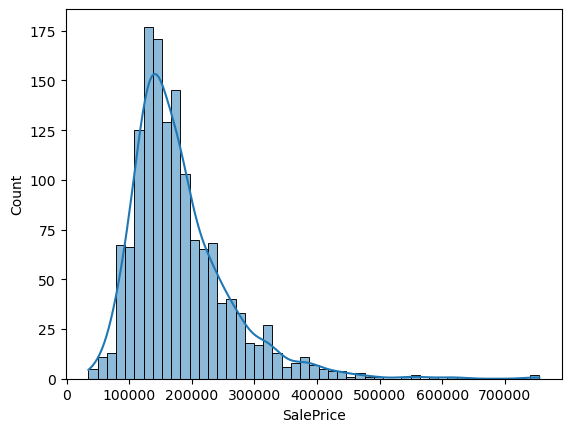

In [119]:
sns.histplot(train_data["SalePrice"], kde=True)

This is a skewed distribution. A log transformation could make the feature less skewed and more normal, which might help for our lasso model.

<Axes: xlabel='SalePrice', ylabel='Count'>

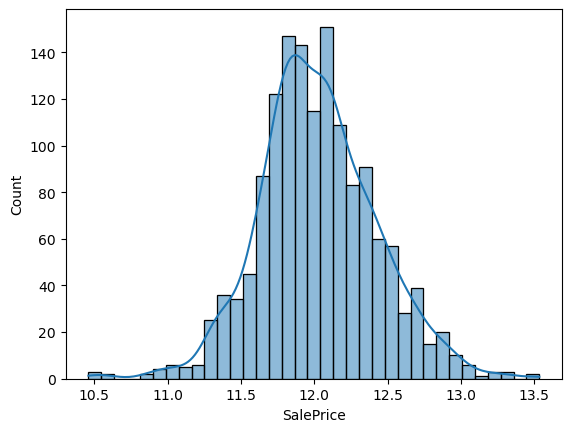

In [120]:
sns.histplot(np.log1p(train_data["SalePrice"]), kde=True)

The distribution of the log-transformed feature looks more normal now.

### **Normality test for numeric features**

Let's test the normality for the numeric features.

In [121]:
num_feat = [col for col in train_data.drop(["Id"], axis=1) if train_data.dtypes[col] != "category"]

In [122]:
norm_test = lambda x: stats.shapiro(x)[1] < 0.05
non_norm_dist = train_data[num_feat].apply(norm_test)
print(non_norm_dist.all())

True


No numeric feature distribution looks normal. So doing a log-transformation for all these features could help the lasso model.

### **Distance and area features**

#### **Normality check**

Let's examine the distribution of distance and area features.

First let's plot the boxplots

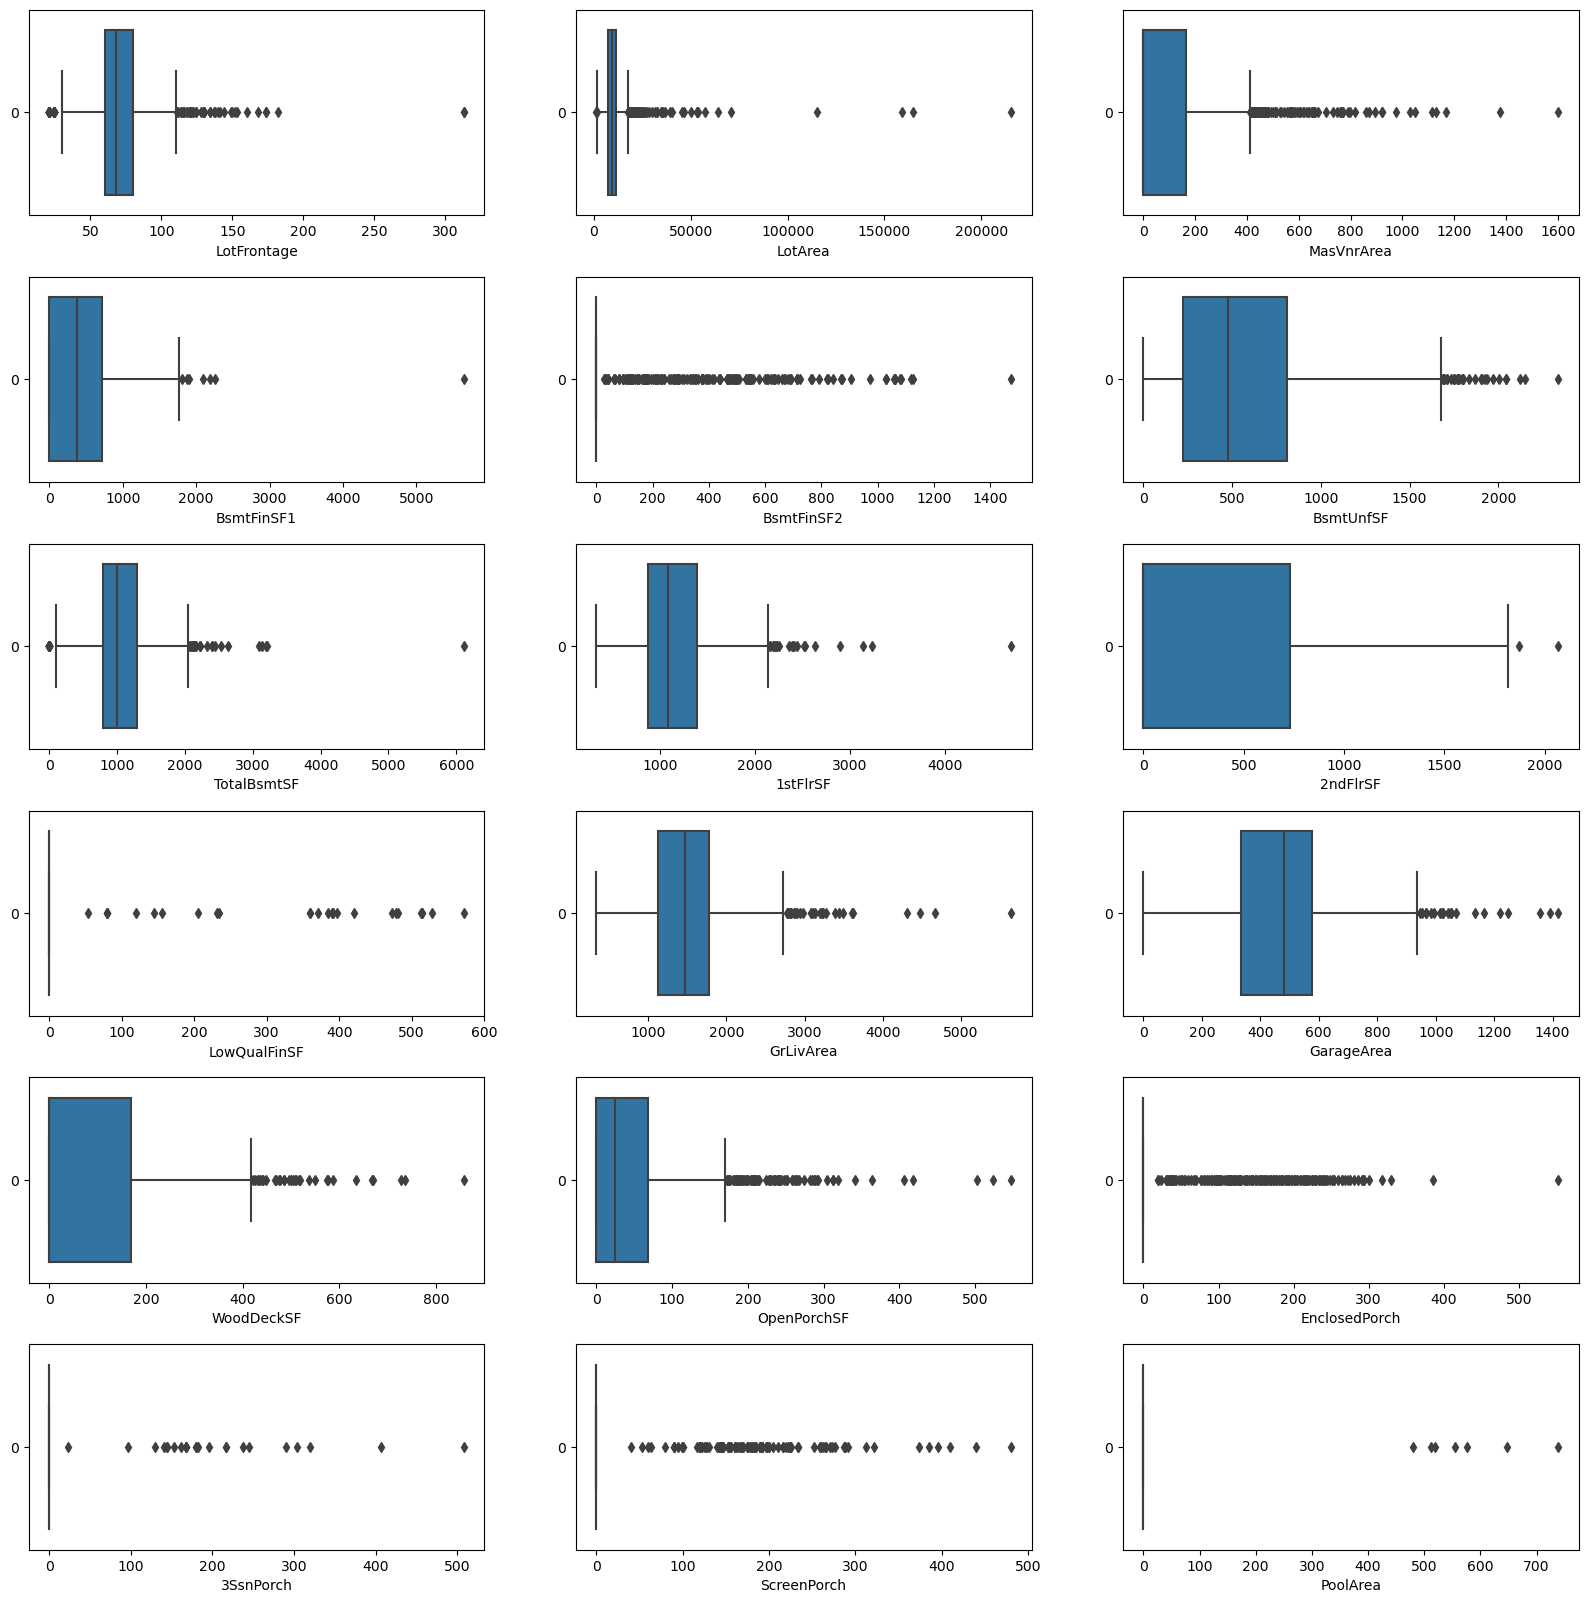

In [123]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))

for i, feature in enumerate(area_dist_feat, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(train_data[feature], orient="h").set(xlabel=feature)

plt.subplots_adjust(hspace=0.3)

We notice two kinds of feature: 
- Ones which regard pretty rare options like a second type of basement (BsmtFinSF2), a low quality finished surface (LowQualFinSF), an enclosed porch (EnclosedPorch), a 3 season porch (3SsnPorch), a screen porch (ScreenPorch) and a pool (PoolArea). For this kind of feature, all points above 0 are considered outliers.
- On the other hand, regarding the other features, we notice some extreme values which can be capped to make our model more able to generalize.

Let's call the first kind of feature "outlier features" and let's put them in a list.

In [124]:
outlier_feat = []

for feature in area_dist_feat:
    if np.percentile(train_data[feature], 75) == 0:
        outlier_feat.append(feature)
        
outlier_feat

['BsmtFinSF2',
 'LowQualFinSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea']

Let's put the other features to cap in a list as well.

In [125]:
feat_to_cap = list(set(area_dist_feat) - set(outlier_feat))

feat_to_cap

['WoodDeckSF',
 '1stFlrSF',
 'LotArea',
 'BsmtFinSF1',
 'MasVnrArea',
 'BsmtUnfSF',
 'OpenPorchSF',
 'LotFrontage',
 'TotalBsmtSF',
 'GrLivArea',
 '2ndFlrSF',
 'GarageArea']

Some distributions are heavily skewed. A log transformation could help for our lasso model.

### **Categorical features**

#### **Classification, Type and Style**

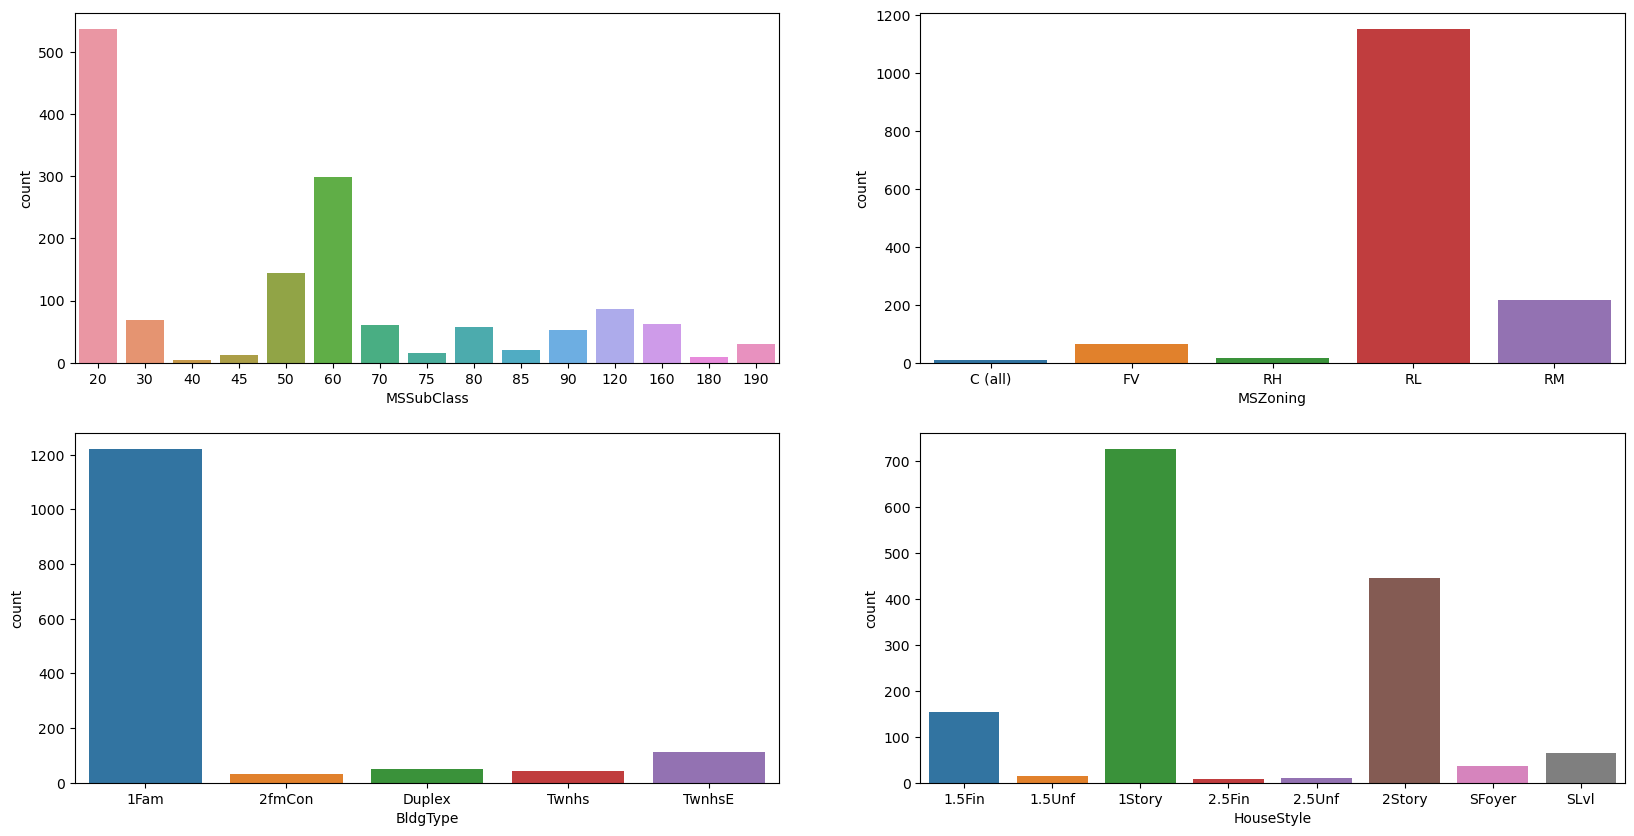

In [126]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for i, feature in enumerate(["MSSubClass", "MSZoning", "BldgType", "HouseStyle"], 1):
    plt.subplot(2, 2, i)
    sns.countplot(train_data, x=feature)

plt.subplots_adjust(hspace=0.2, wspace=0.2)

Here is the meaning of the values of the MSSubClass feature, according to the data description.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

And here is the same for the HouseStyle feature.

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

We can retrieve the main details of the MSSubClass if we combine the feature HouseStyle with YearBuilt and BldgType. Thus, we can drop MSSubClass since the essential of this data is also in the HouseStyle feature.

In [127]:
cat_feat_to_drop = ["MSSubClass"]

The other features have enough diversity. Most of the sales are classified as Residential Low Density, followed by Residential Medium, most of the dwellings are single-family and are mostly one-story and two-story.

#### **Street, Alley, Lot and Land**

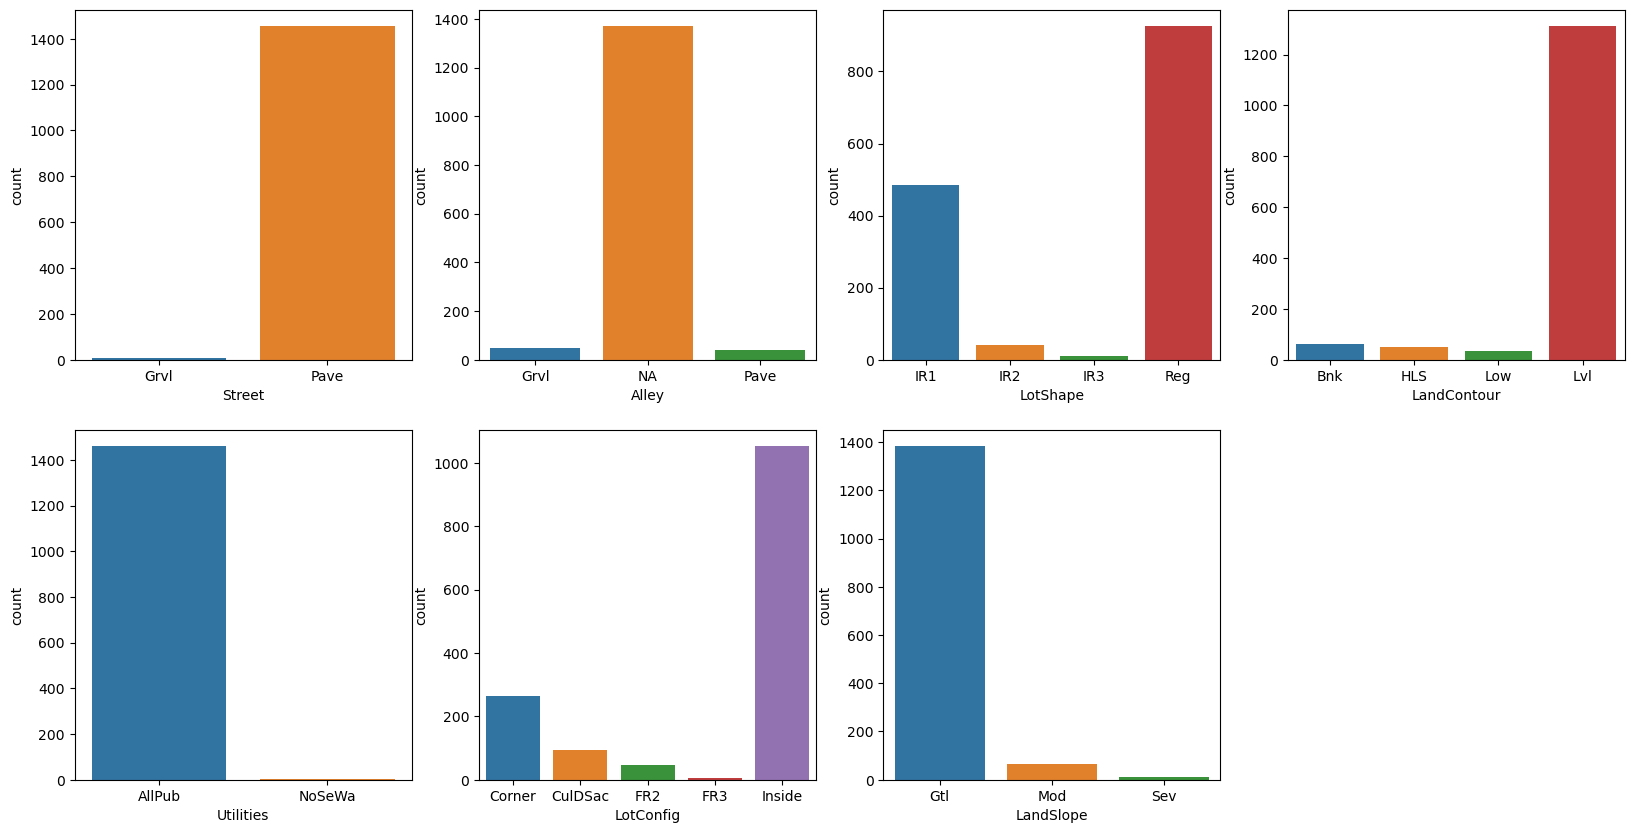

In [128]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(["Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope"], 1):
    plt.subplot(2, 4, i)
    sns.countplot(train_data, x=feature)
        
fig.delaxes(axs.flatten()[i])

plt.subplots_adjust(hspace=0.2, wspace=0.2)

Street and Utilities have not enough diversity to be interesting features.

In [129]:
cat_feat_to_drop.extend(["Street", "Utilities"])

The other features have enough diversity. Most of the dwellings have no alley, have a flat level and are inside lots.

#### **Neighborhood**

<Axes: xlabel='Neighborhood', ylabel='count'>

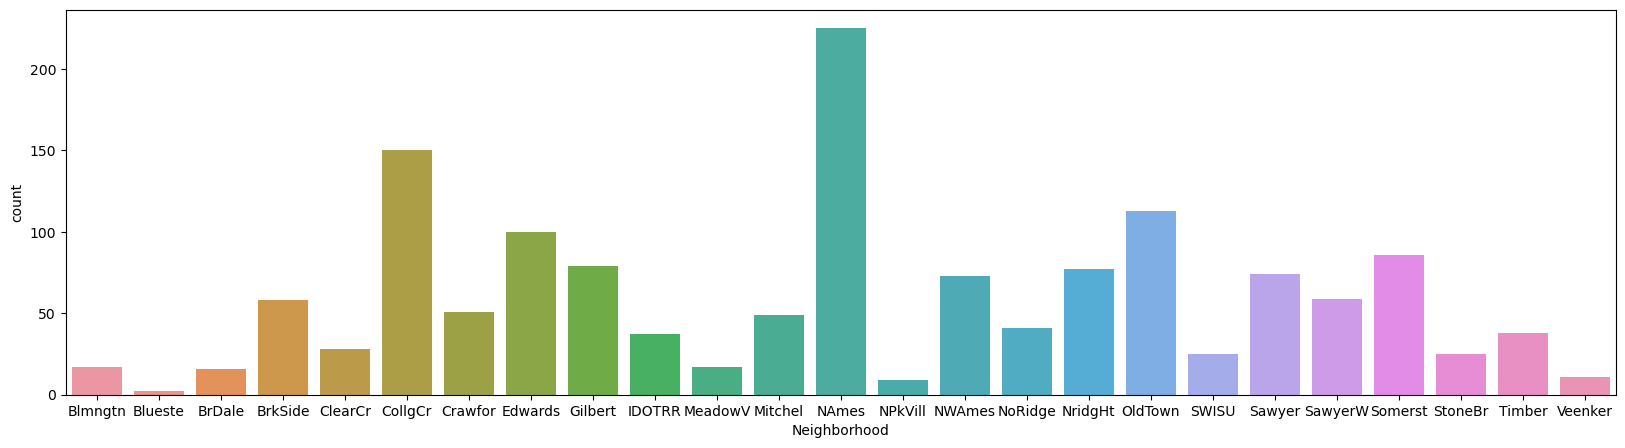

In [130]:
plt.figure(figsize=(20, 5))
sns.countplot(train_data, x="Neighborhood")

There is enough diversity among the neighborhoods. The most frequent is North Ames.

#### **Conditions, Type and Quality**

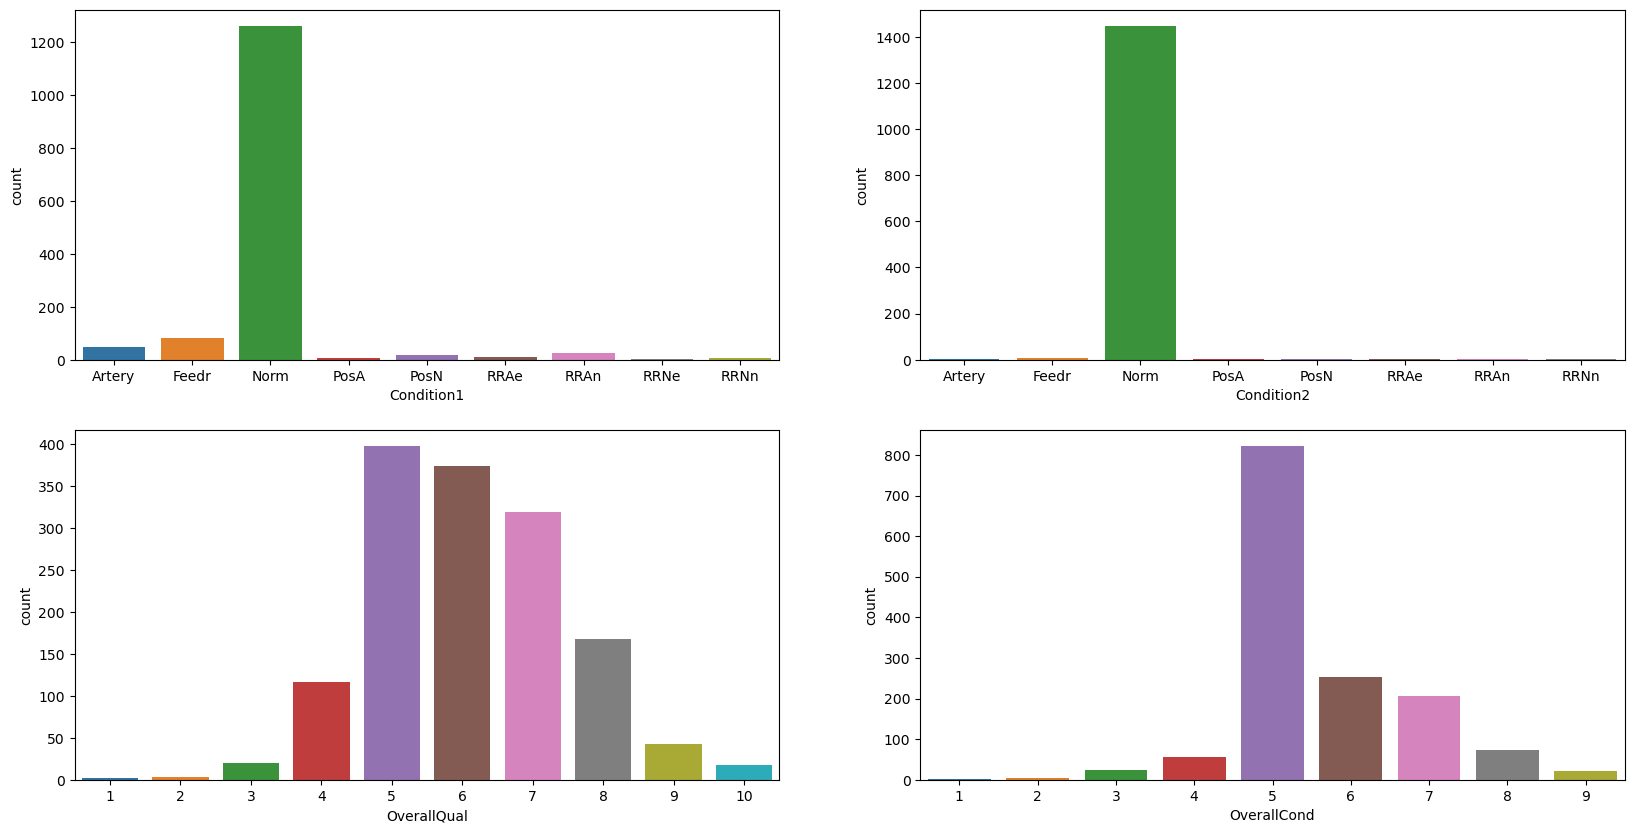

In [131]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for i, feature in enumerate(["Condition1", "Condition2", "OverallQual", "OverallCond"], 1):
    plt.subplot(2, 2, i)
    sns.countplot(train_data, x=feature)

plt.subplots_adjust(hspace=0.2, wspace=0.2)

Condition2 has not enough diversity to be an interesting feature.

In [132]:
cat_feat_to_drop.append("Condition2")

The other features have enough diversity. The proximity to conditions is mostly normal and the quality is mostly above average.

#### **Roof, Exterior and Foundation**

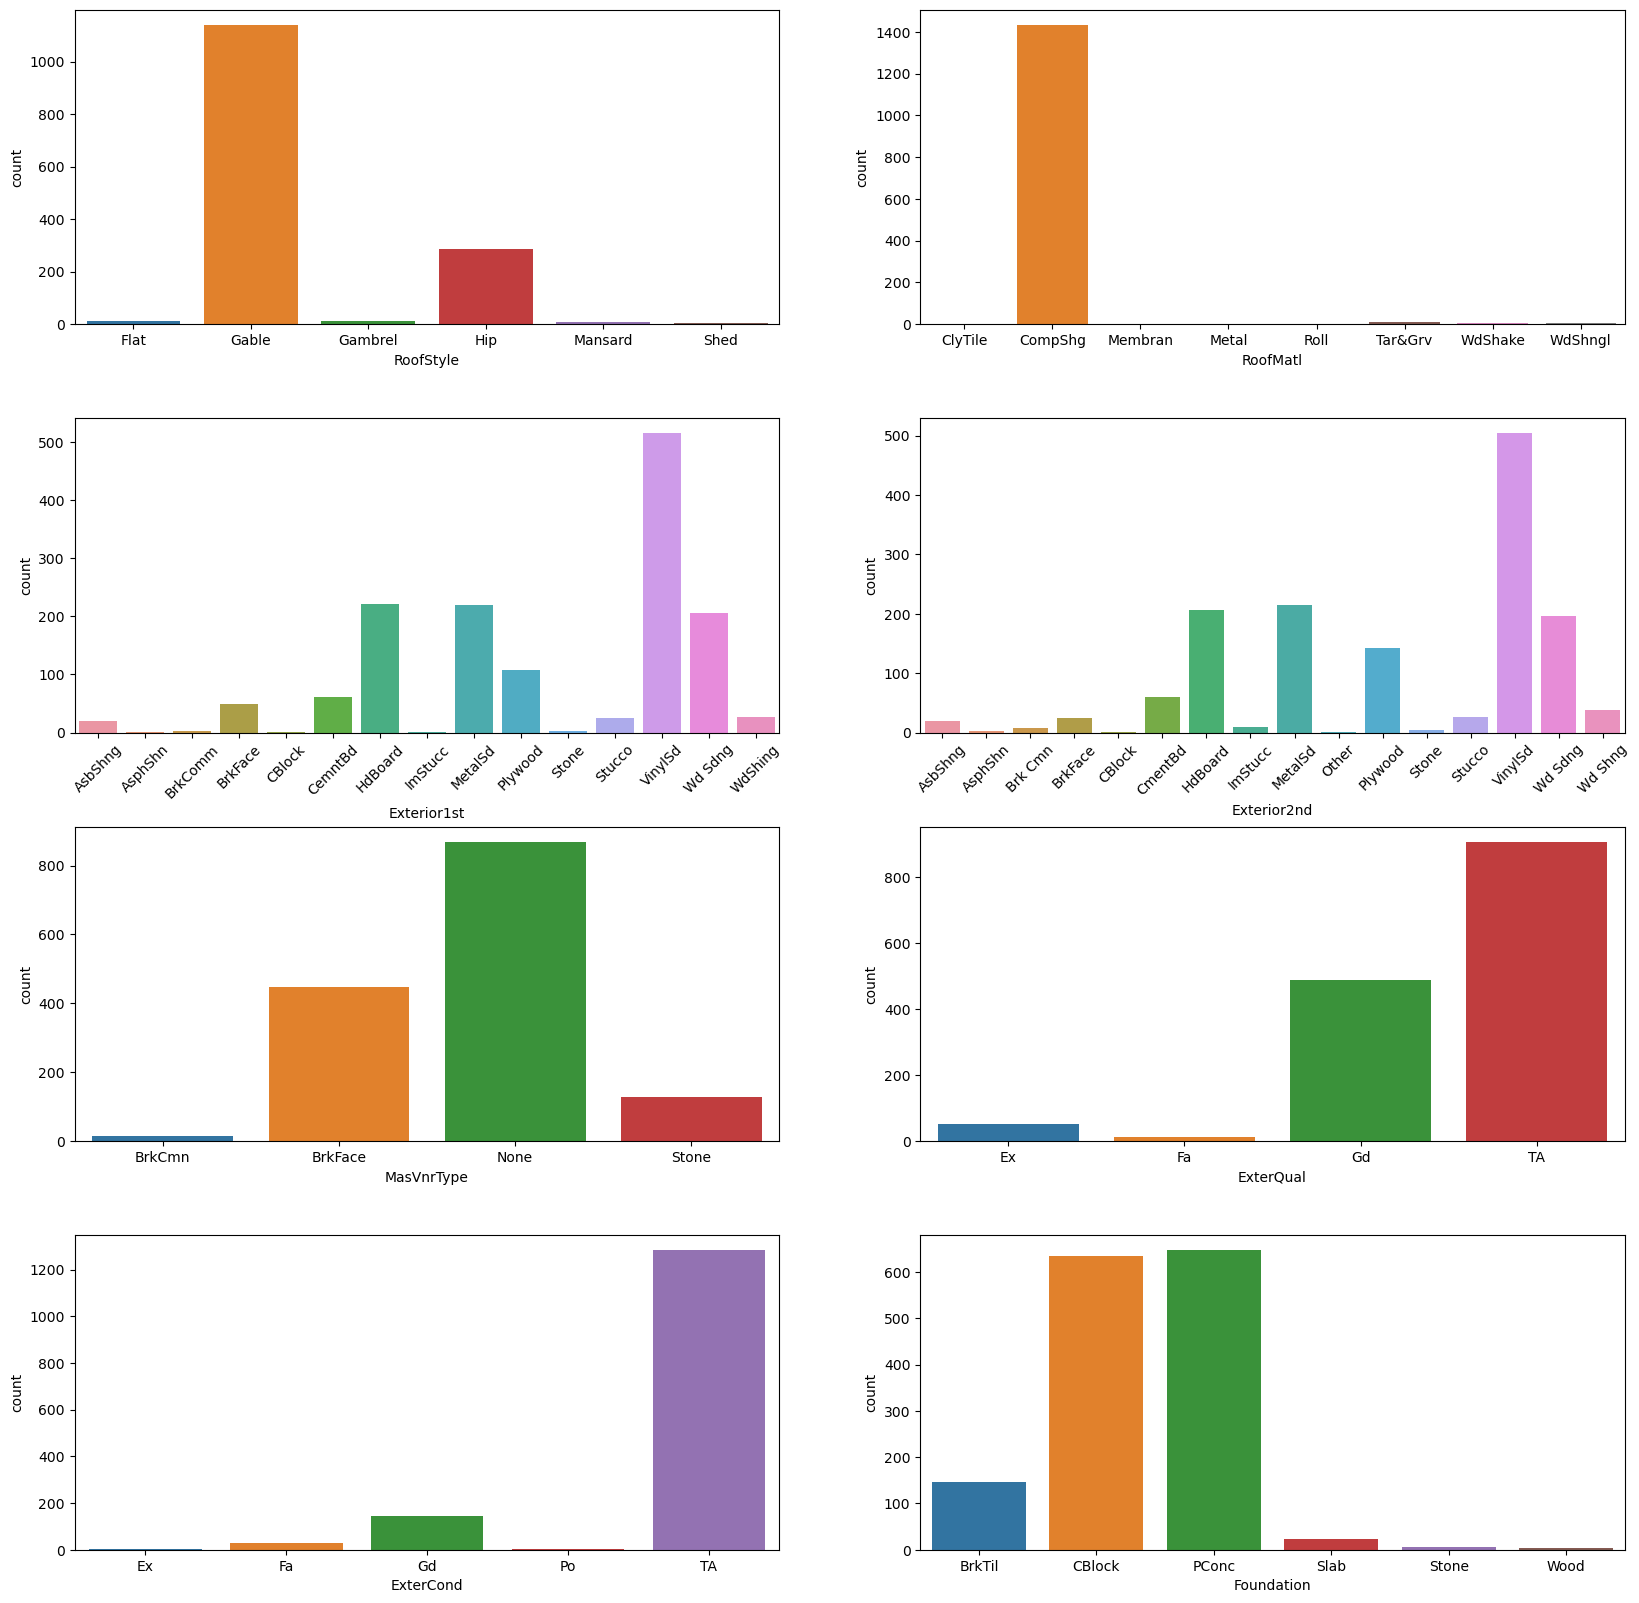

In [133]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

for i, feature in enumerate(["RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", 
                             "MasVnrType", "ExterQual", "ExterCond", "Foundation"], 1):
    plt.subplot(4, 2, i)
    sns.countplot(train_data, x=feature)
    
    if "Exterior" in feature:
        plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.3, wspace=0.2)

RoofMatl has not enough diversity to be interesting features.

In [134]:
cat_feat_to_drop.append("RoofMatl")

The other features have enough diversity. The roof style is mostly gable, the preferred covering for exterior is vynil siding. The quality and condition of the material are mostly typical or above. Most dwellings have no masonry veneer.

#### **Basement**

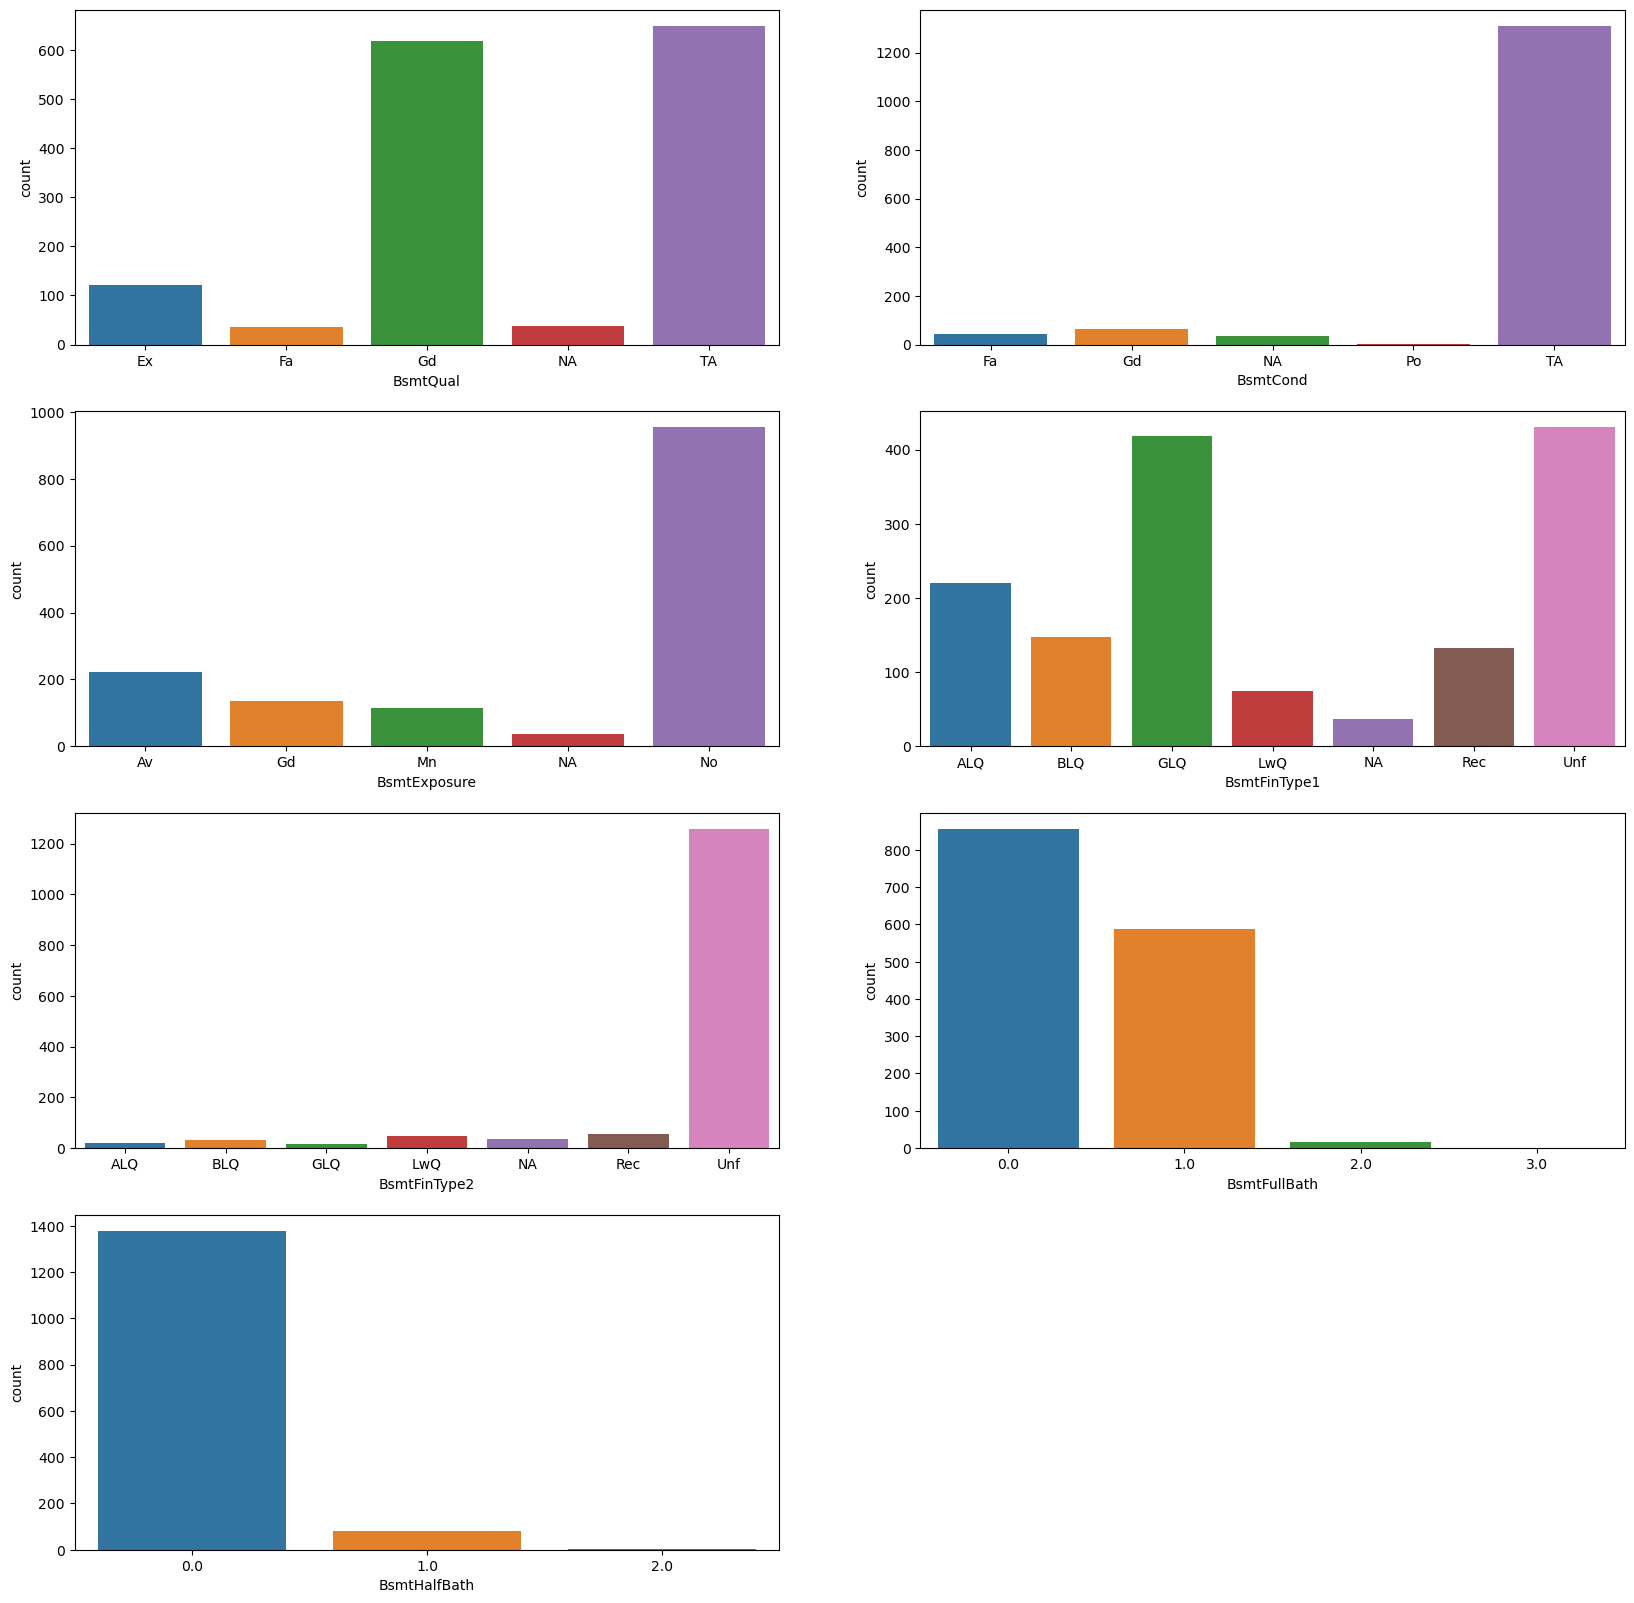

In [135]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

for i, feature in enumerate(["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
                             "BsmtFinType2", "BsmtFullBath", "BsmtHalfBath"], 1):
    plt.subplot(4, 2, i)
    sns.countplot(train_data, x=feature)
        
fig.delaxes(axs.flatten()[i])

plt.subplots_adjust(hspace=0.2, wspace=0.2)

All the basement features have enough diversity. The height is mostly good or typical, the condition is mostly typical, most basements have no exposure and have no or one full bathroom.

#### **Heating, Central Air and Electrical**

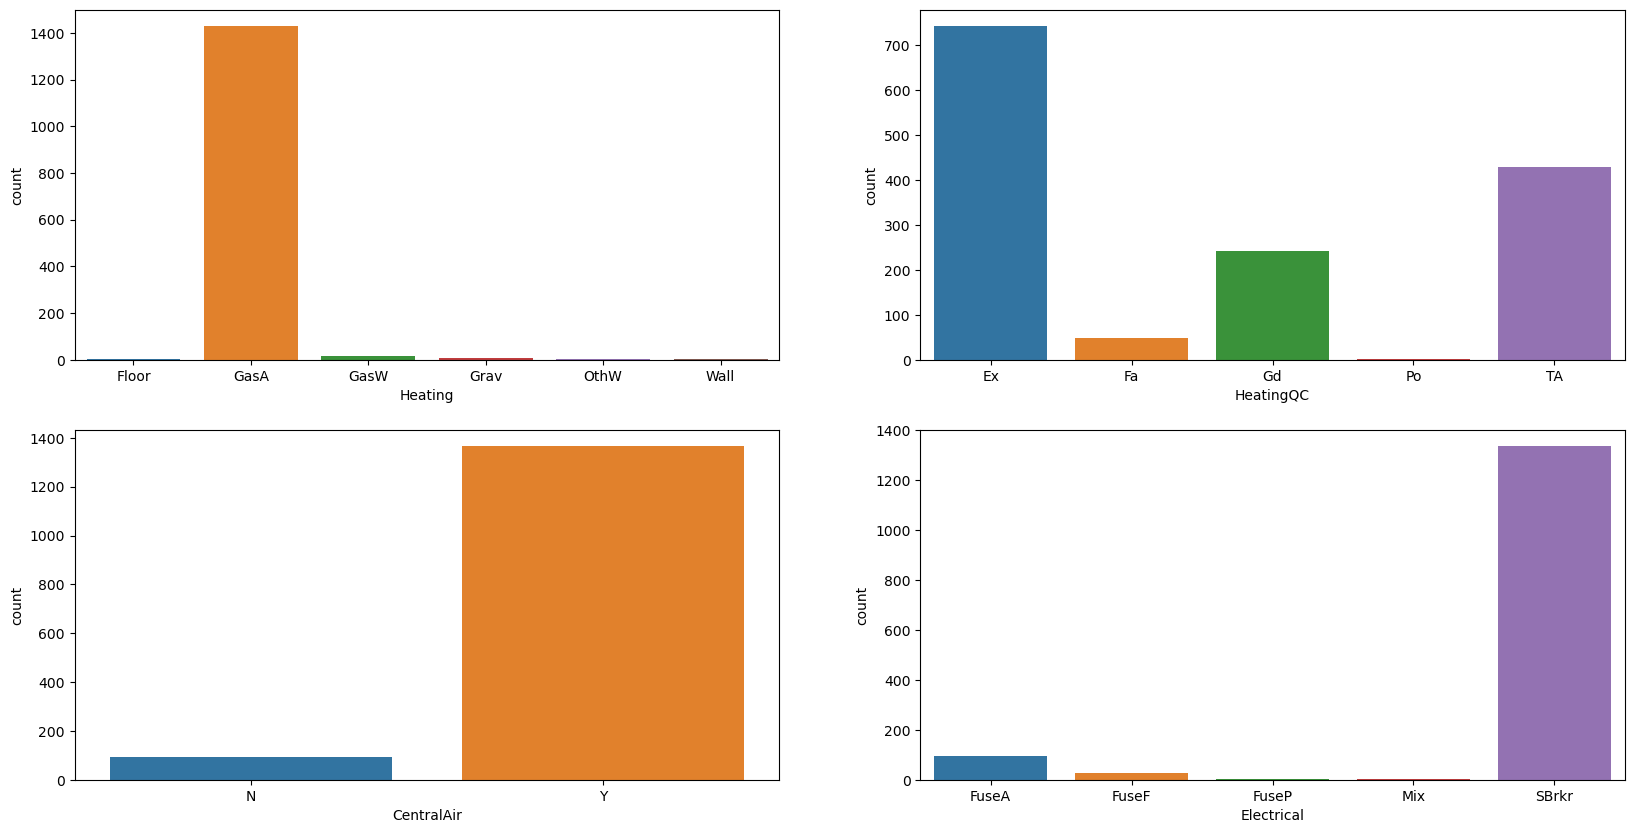

In [136]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for i, feature in enumerate(["Heating", "HeatingQC", "CentralAir", "Electrical"], 1):
    plt.subplot(2, 2, i)
    sns.countplot(train_data, x=feature)

plt.subplots_adjust(hspace=0.2, wspace=0.2)

Heating has not enough diversity to be interesting features.

In [137]:
cat_feat_to_drop.append("Heating")

The other features have enough diversity. The quality of heating is mostly above good, the electrical system is mostly standard and most dwelling have air conditioning.

#### **Bathrooms, Bedrooms, Kitchen and Functional**

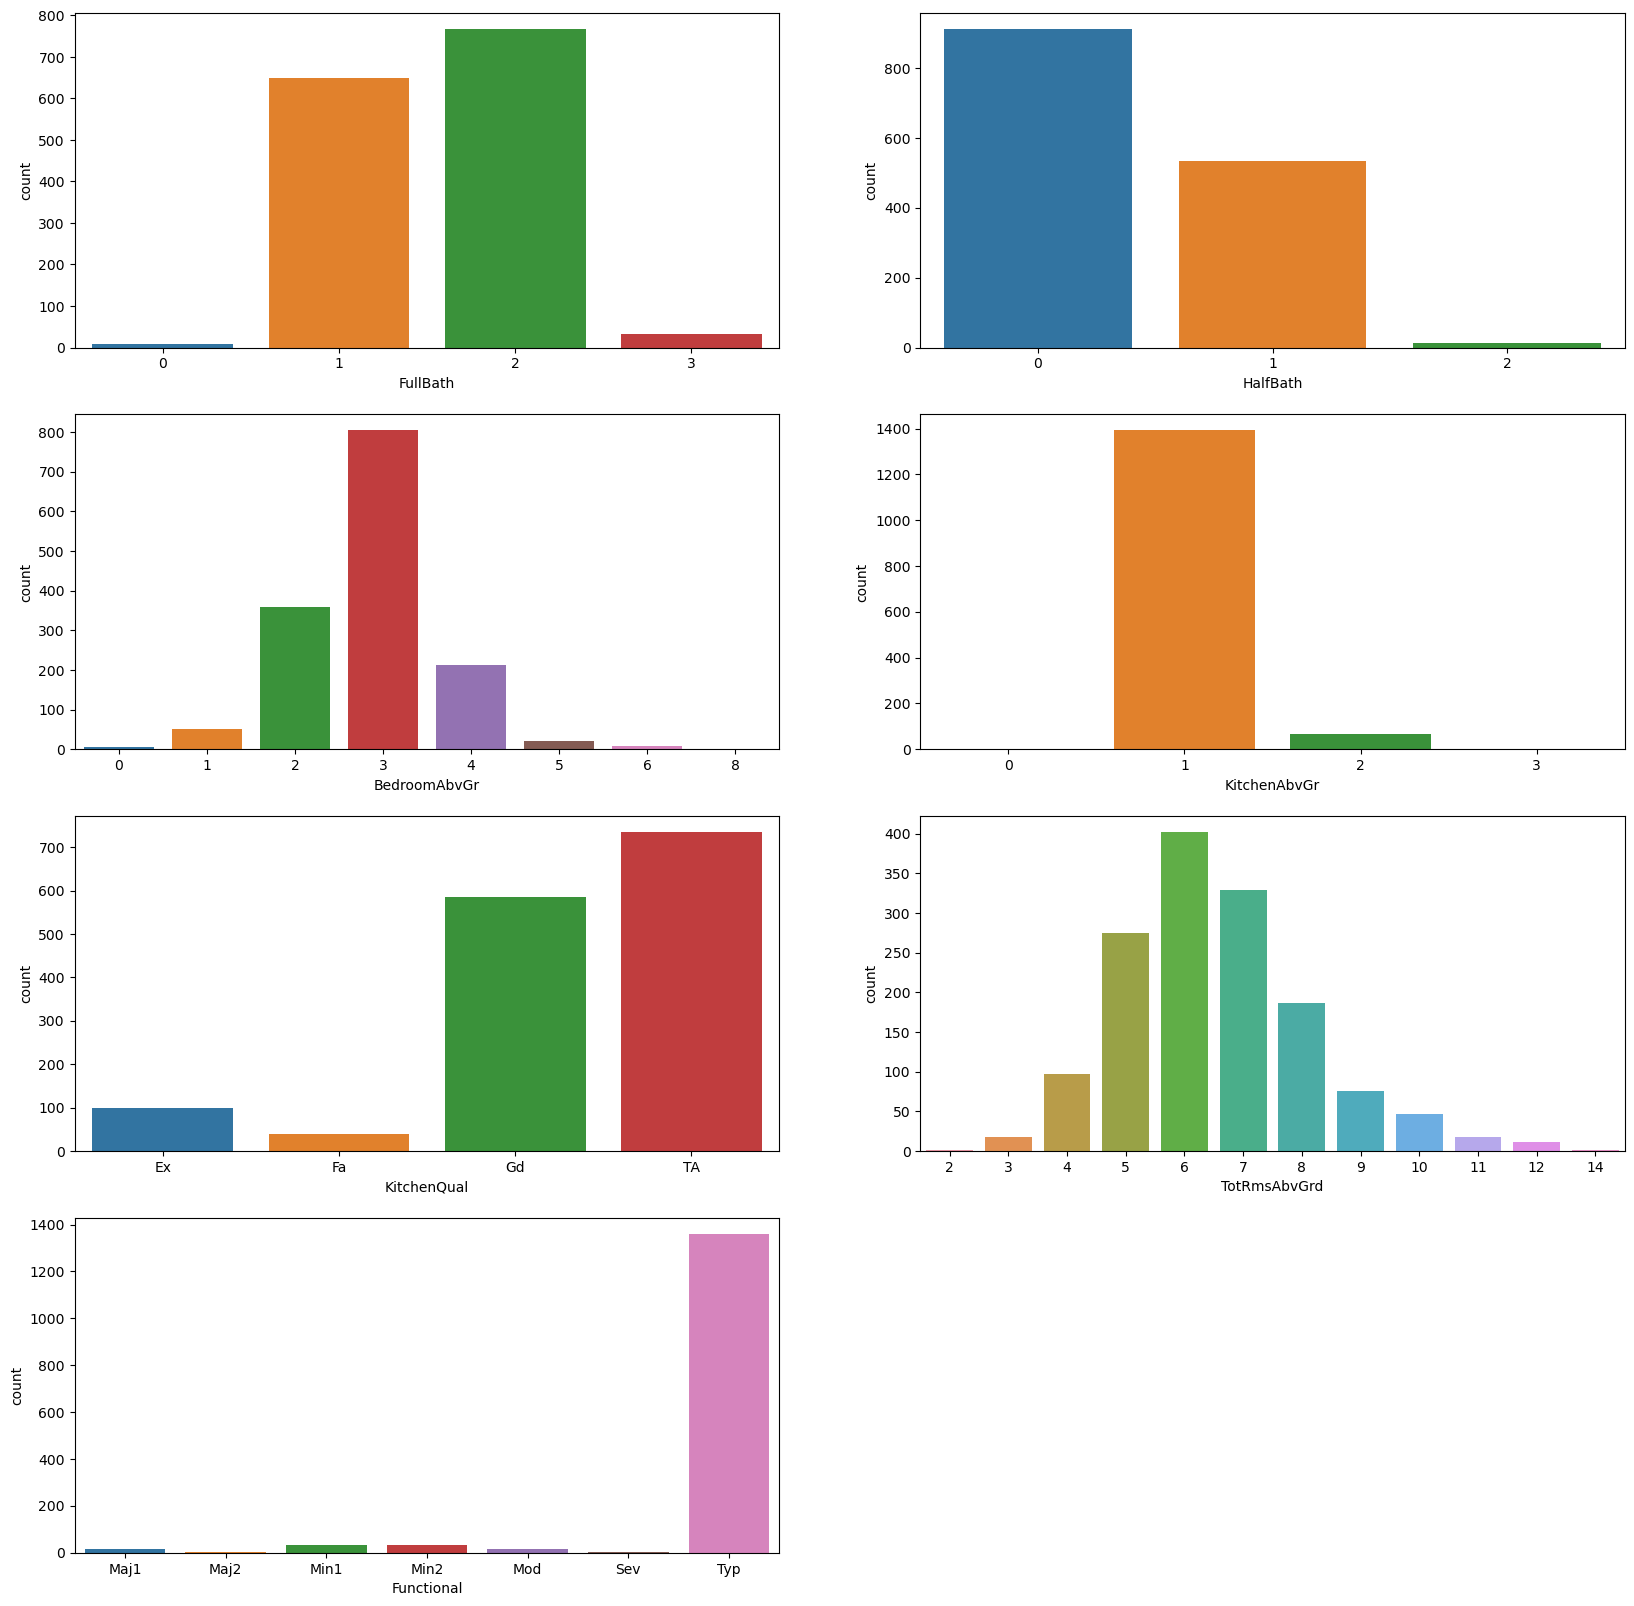

In [138]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

for i, feature in enumerate(["FullBath", "HalfBath", "BedroomAbvGr", 
                             "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd", "Functional"], 1):
    plt.subplot(4, 2, i)
    sns.countplot(train_data, x=feature)

fig.delaxes(axs.flatten()[i])
    
plt.subplots_adjust(hspace=0.2, wspace=0.2)

These features have enough diversity. Most of the dwelling have one or two bathrooms, have three bedrooms and one kitchen above ground. The kitchen quality is mostly good or typical and the home functionality is typical.

#### **Fireplace and Garage**

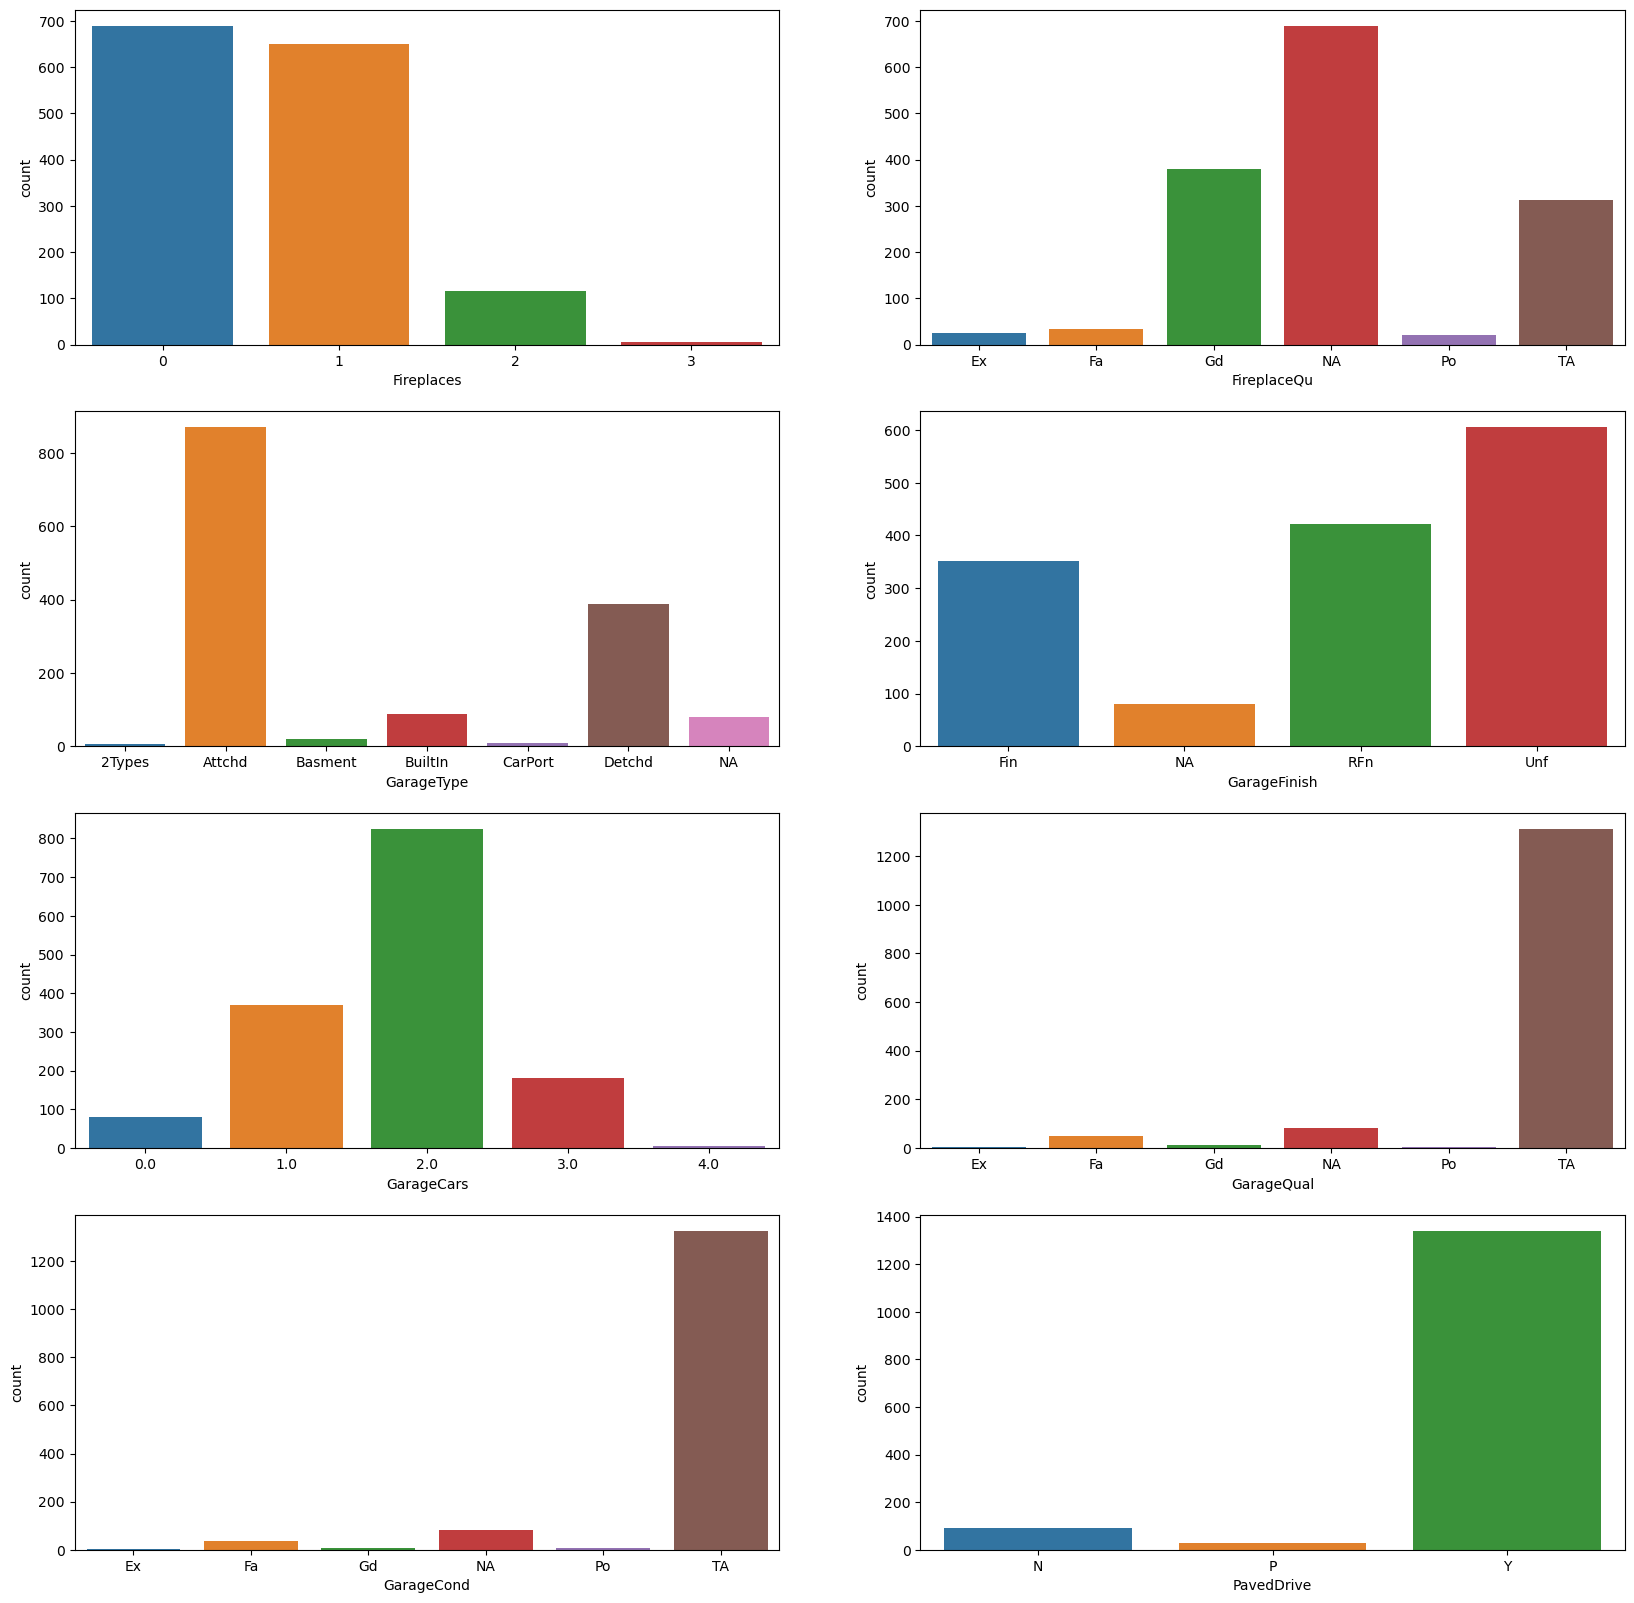

In [139]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

for i, feature in enumerate(["Fireplaces", "FireplaceQu", "GarageType", "GarageFinish", 
                             "GarageCars", "GarageQual", "GarageCond", "PavedDrive"], 1):
    plt.subplot(4, 2, i)
    sns.countplot(train_data, x=feature)

plt.subplots_adjust(hspace=0.2, wspace=0.2)

These features have enough diversity. Most of the dwelling have no or one fireplace, fireplace quality is mostly above average. Garage are mostly attached and contains mostly two cars. The garage quality is mostly typical.

#### **Pool, Fence, Misc and Sale**

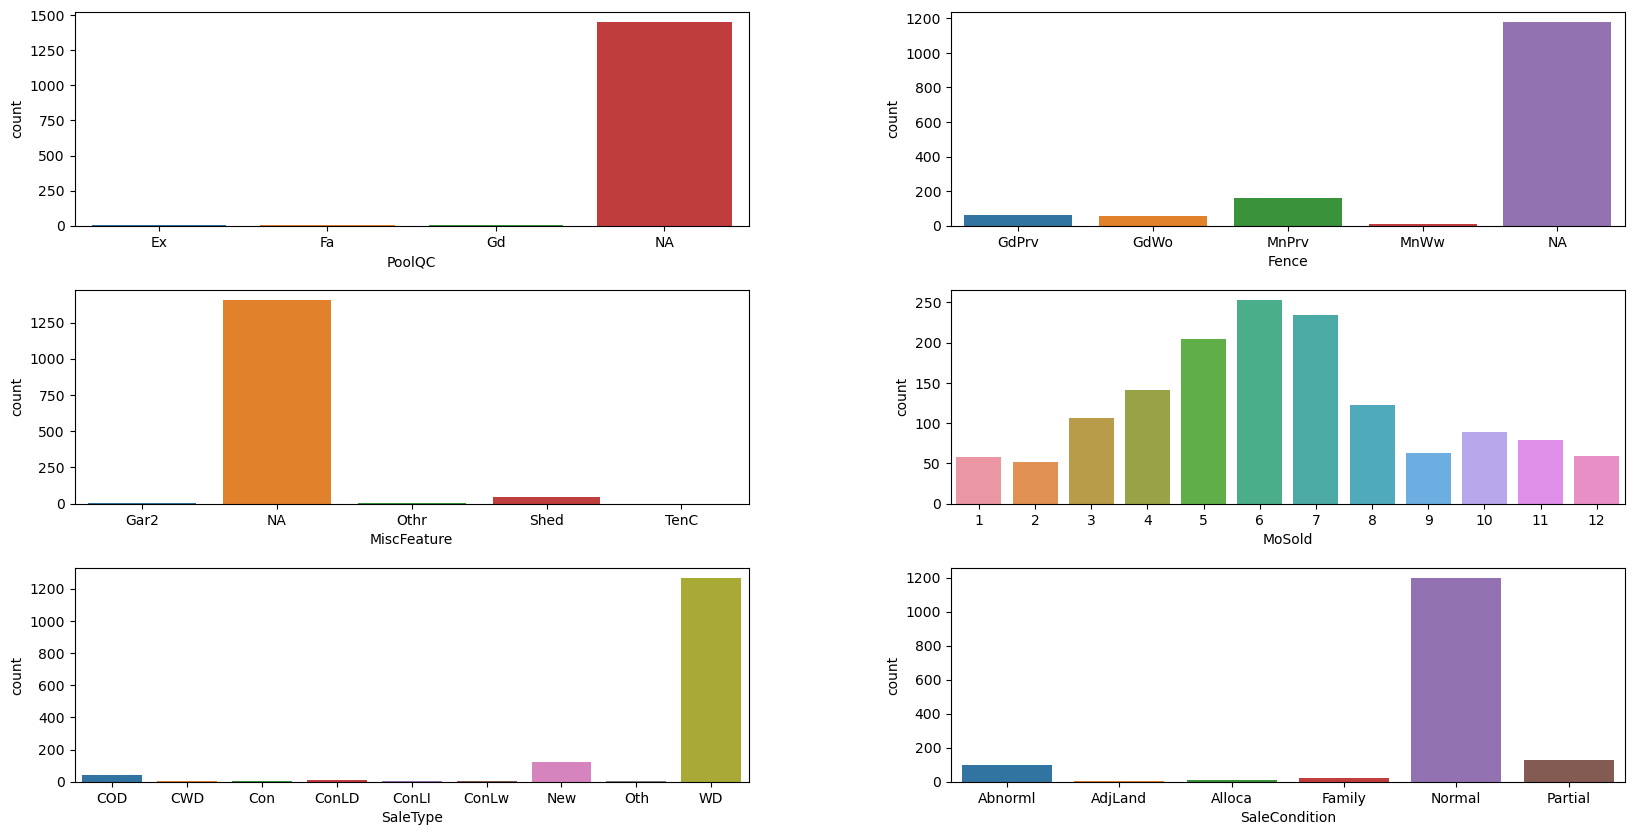

In [140]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

for i, feature in enumerate(["PoolQC", "Fence", "MiscFeature", "MoSold", "SaleType", "SaleCondition"], 1):
    plt.subplot(3, 2, i)
    sns.countplot(train_data, x=feature)

plt.subplots_adjust(hspace=0.3, wspace=0.3)

PoolQC and MiscFeature (and therefore MiscVal) have not enough diversity to be interesting features.

In [141]:
cat_feat_to_drop.extend(["PoolQC", "MiscFeature"])

In [142]:
num_feat_to_drop.append("MiscVal")

The other features have enough diversity. Most of the dwelling have no pool and no fence. Most of the sales are done around the middle of the year. The sales are mostly conventional and normal.

## **Features selection and transformation**

### **Columns dropping**

In [143]:
col_to_drop = num_feat_to_drop + cat_feat_to_drop + ["Id"] + ["SalePrice"]

X_train = train_data.drop(col_to_drop, axis=1)
y_train = train_data["SalePrice"]

In [144]:
X_test = test_data.drop(col_to_drop, axis=1)

### **Features capping**

Let's plot the percentiles of the features to cap, highlighting the five last percentiles.

In [145]:
feat_to_cap = list(set(feat_to_cap) - set(col_to_drop))

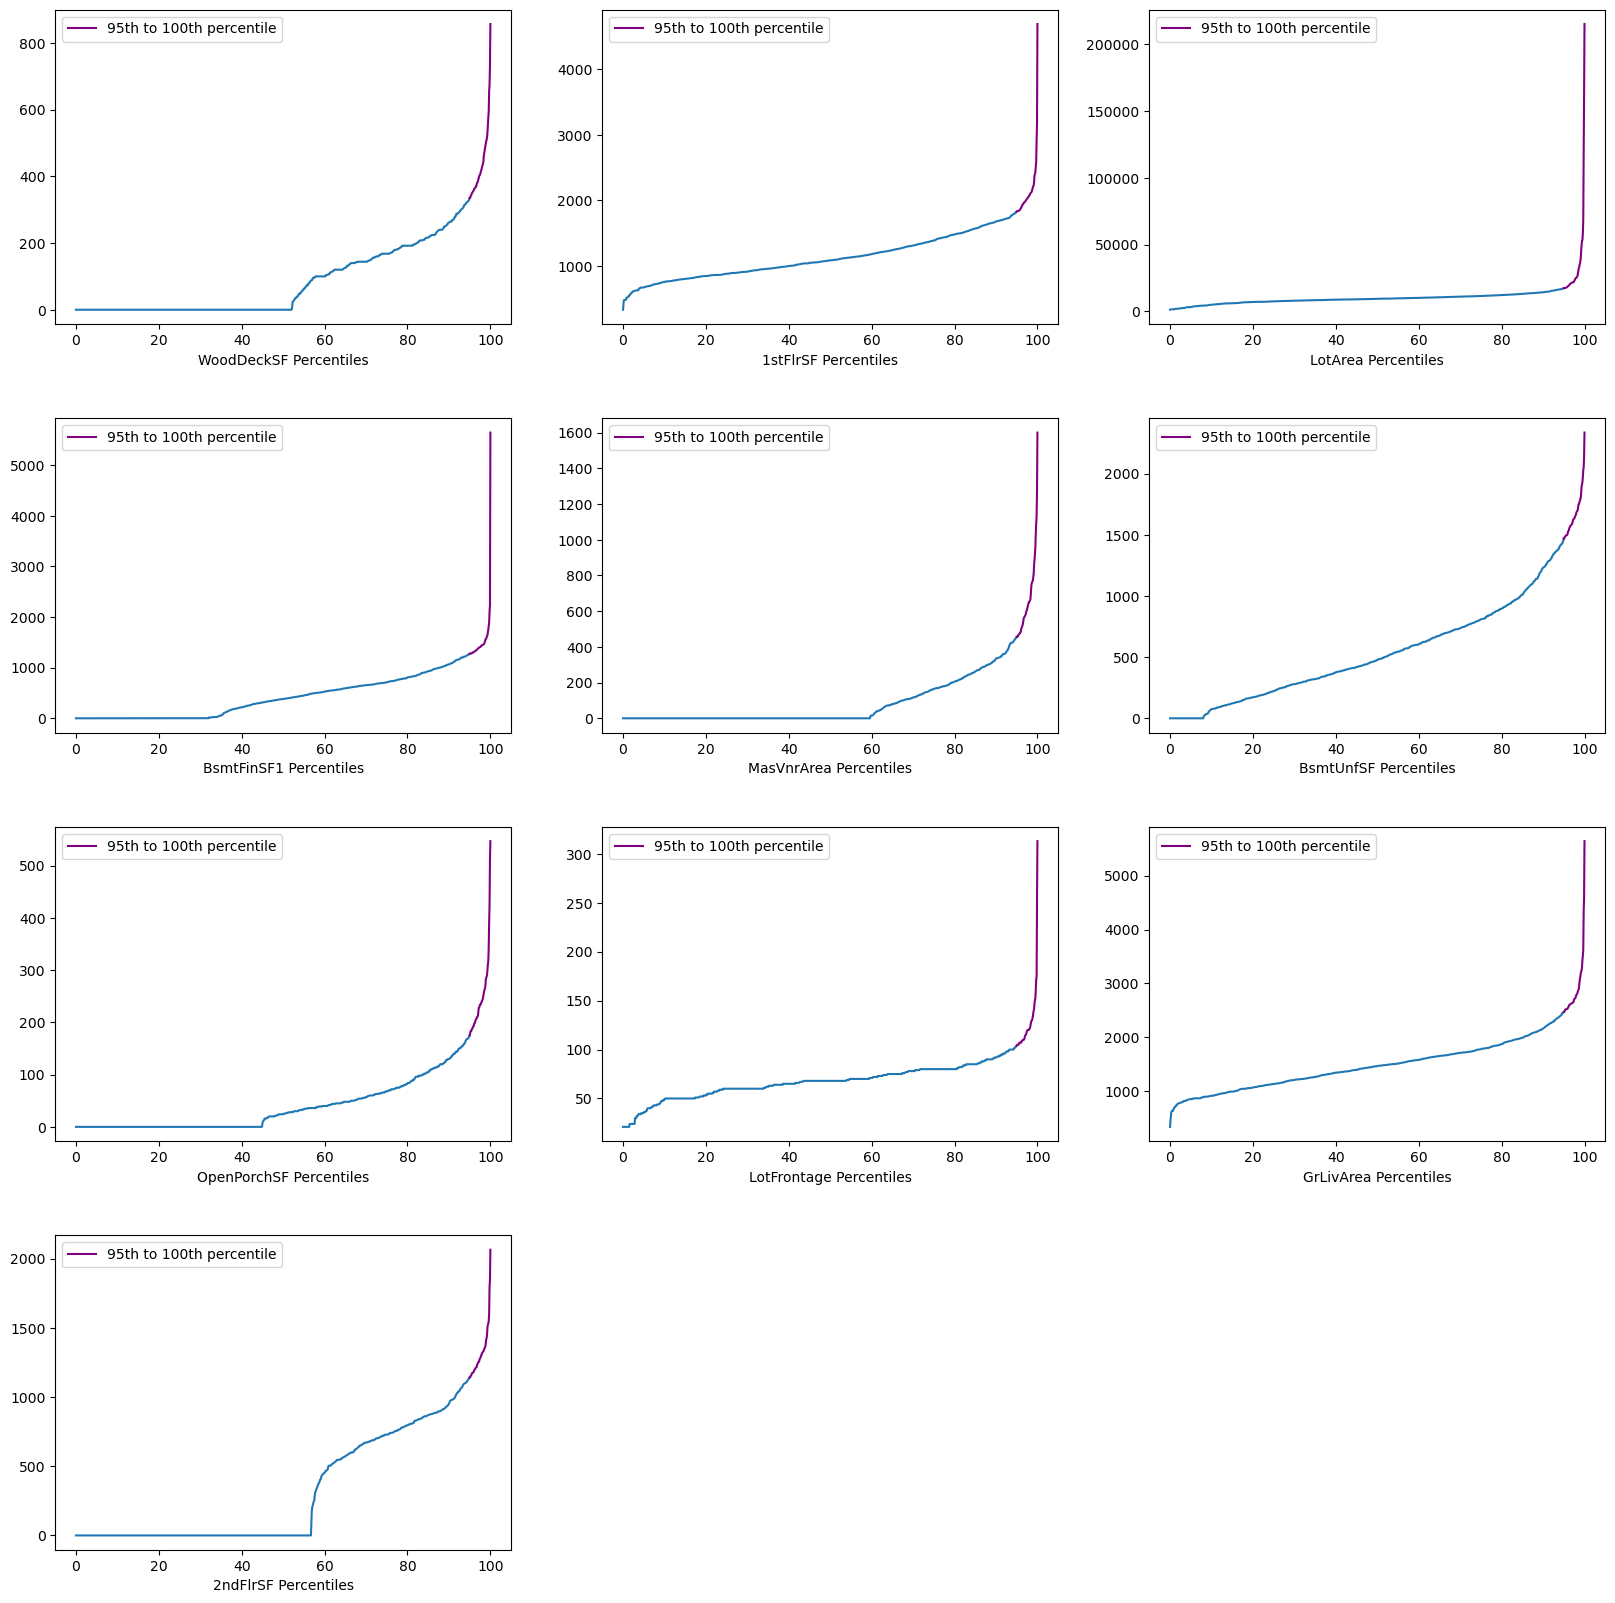

In [146]:
percentiles = np.linspace(0, 95, 951)
high_percentiles = np.linspace(95, 100, 51)

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

for i, feature in enumerate(feat_to_cap, 1):
    plt.subplot(4, 3, i)
    plt.plot(percentiles, np.percentile(X_train[feature], percentiles))
    plt.plot(high_percentiles, np.percentile(X_train[feature], high_percentiles), 
             color="purple", label="95th to 100th percentile")
    
    plt.xlabel(feature + " Percentiles")
    plt.legend()

plt.subplots_adjust(hspace=0.3)

fig.delaxes(axs.flatten()[i])
fig.delaxes(axs.flatten()[i + 1])

For all these features, we notice an exponential rise around the 90th or 95th percentile.

Let's zoom between the 80th and 100th percentiles, let's do a Holt exponential smoothing based on the range from 95th to 99th percentiles and let's do a forecast for the last percentile.

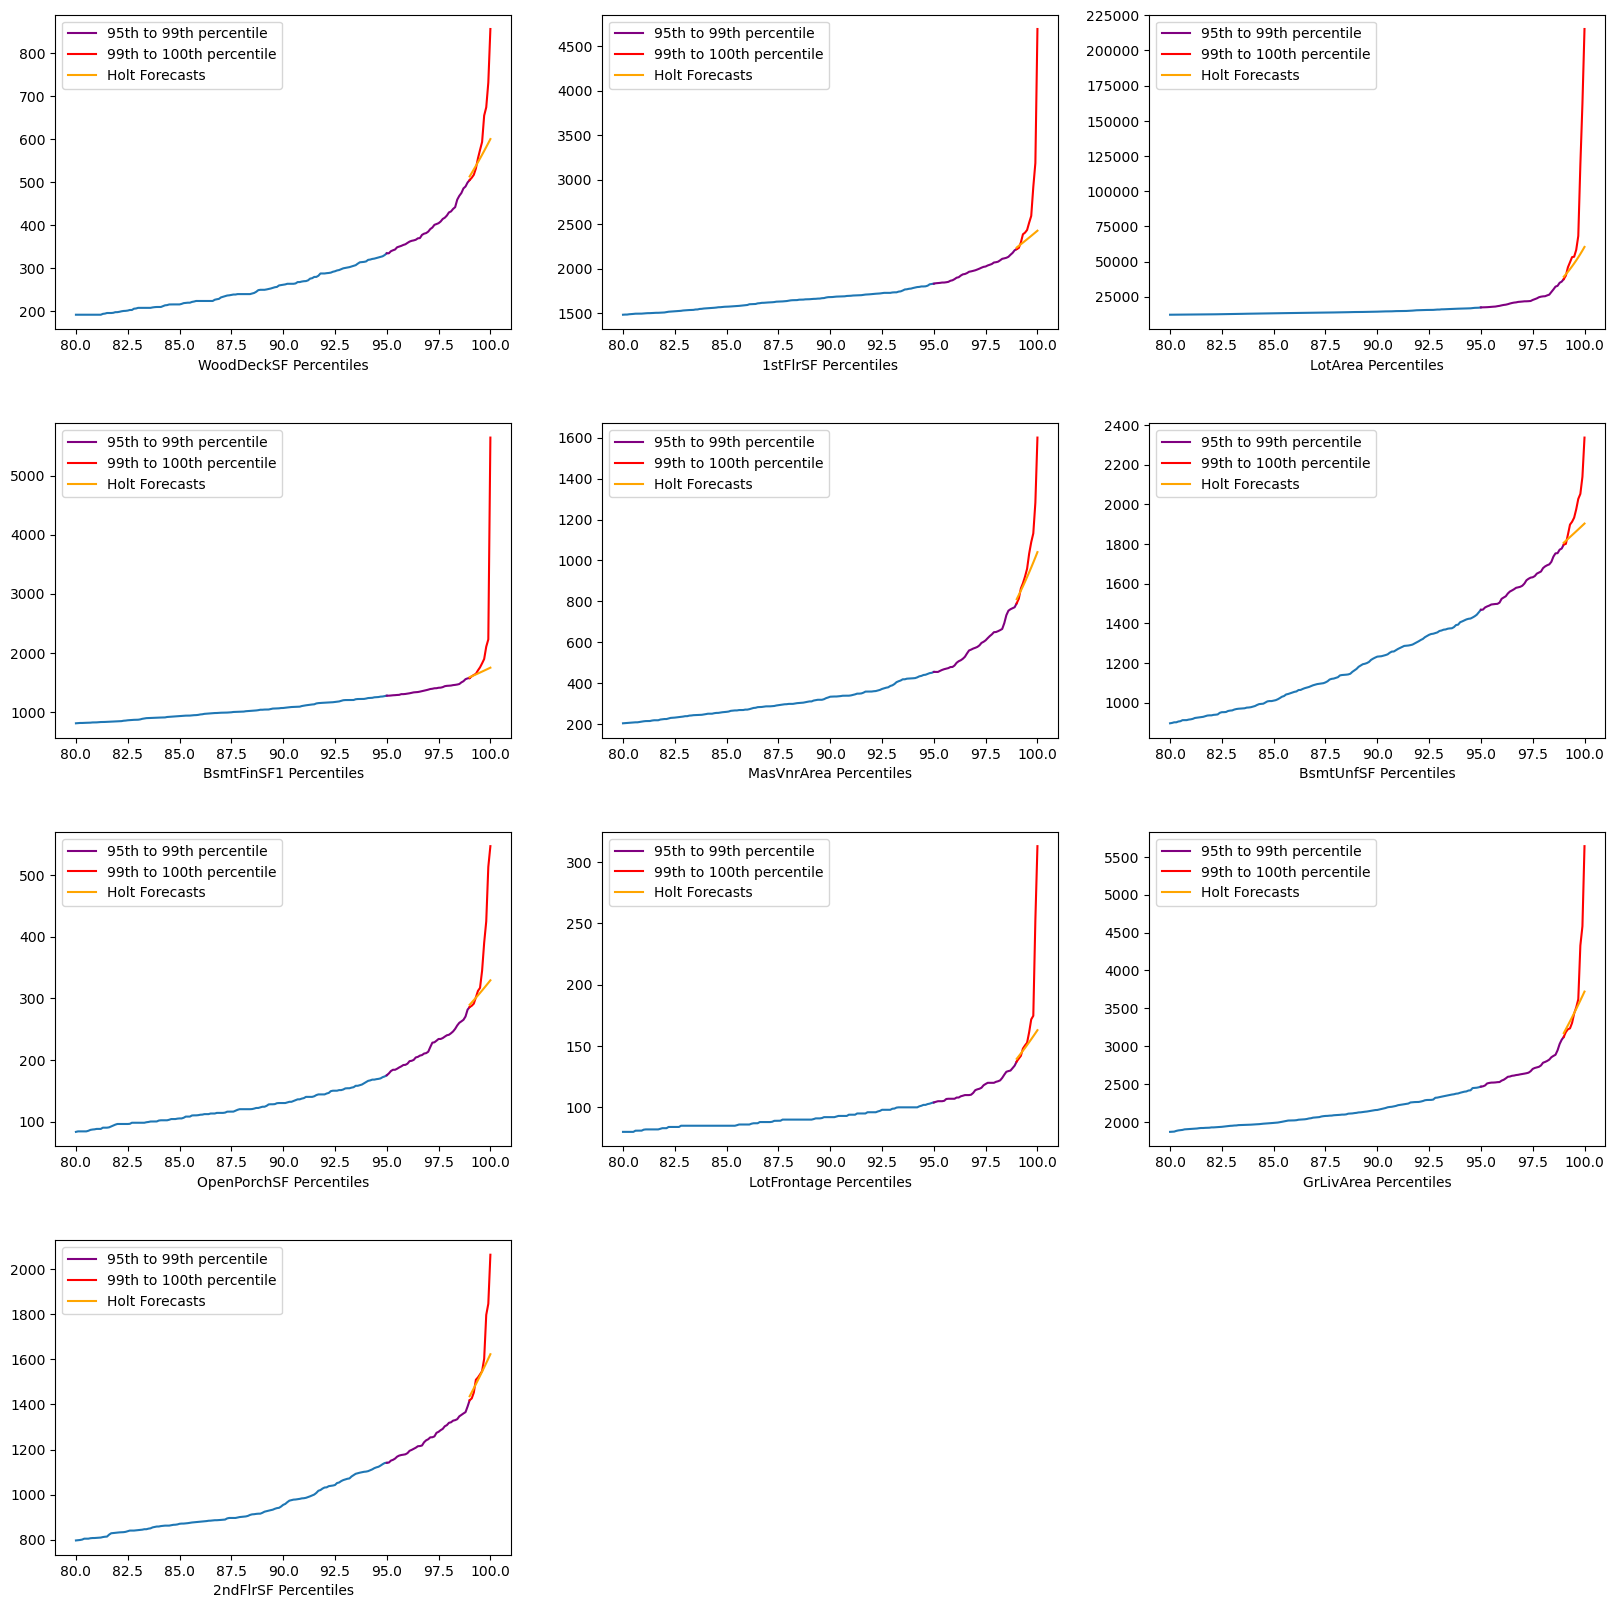

In [147]:
# create a dictionary of cap values
feat_caps = {}

percentiles = np.linspace(80, 95, 151)
high_percentiles = np.linspace(95, 99, 41)
last_percentiles = np.linspace(99, 100, 11)

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

for i, feature in enumerate(feat_to_cap, 1):
    plt.subplot(4, 3, i)
    plt.plot(percentiles, np.percentile(X_train[feature], percentiles))
    plt.plot(high_percentiles, np.percentile(X_train[feature], high_percentiles), 
             color="purple", label="95th to 99th percentile")
    plt.plot(last_percentiles, np.percentile(X_train[feature], last_percentiles), 
             color="red", label="99th to 100th percentile")
    
    holt = Holt(np.percentile(X_train[feature], high_percentiles), exponential=True, 
                        initialization_method="estimated").fit(optimized=True)
    holt_fcst = holt.forecast(11)
    feat_caps[feature] = holt_fcst[10]
    plt.plot(last_percentiles, holt_fcst, color="orange", label="Holt Forecasts")
    
    plt.xlabel(feature + " Percentiles")
    plt.legend()

plt.subplots_adjust(hspace=0.3)

fig.delaxes(axs.flatten()[i])
fig.delaxes(axs.flatten()[i + 1])

With the exponential smoothing we notice that the percentiles curves rise to a less extreme value, which can be a reference for capping these features and make our model more able to generalize.

Let's cap our features with these values.

In [148]:
for feat in feat_to_cap:
    cap_val = feat_caps[feat]
    X_train.loc[X_train[feat] > cap_val, feat] = cap_val

Let's plot the capped features.

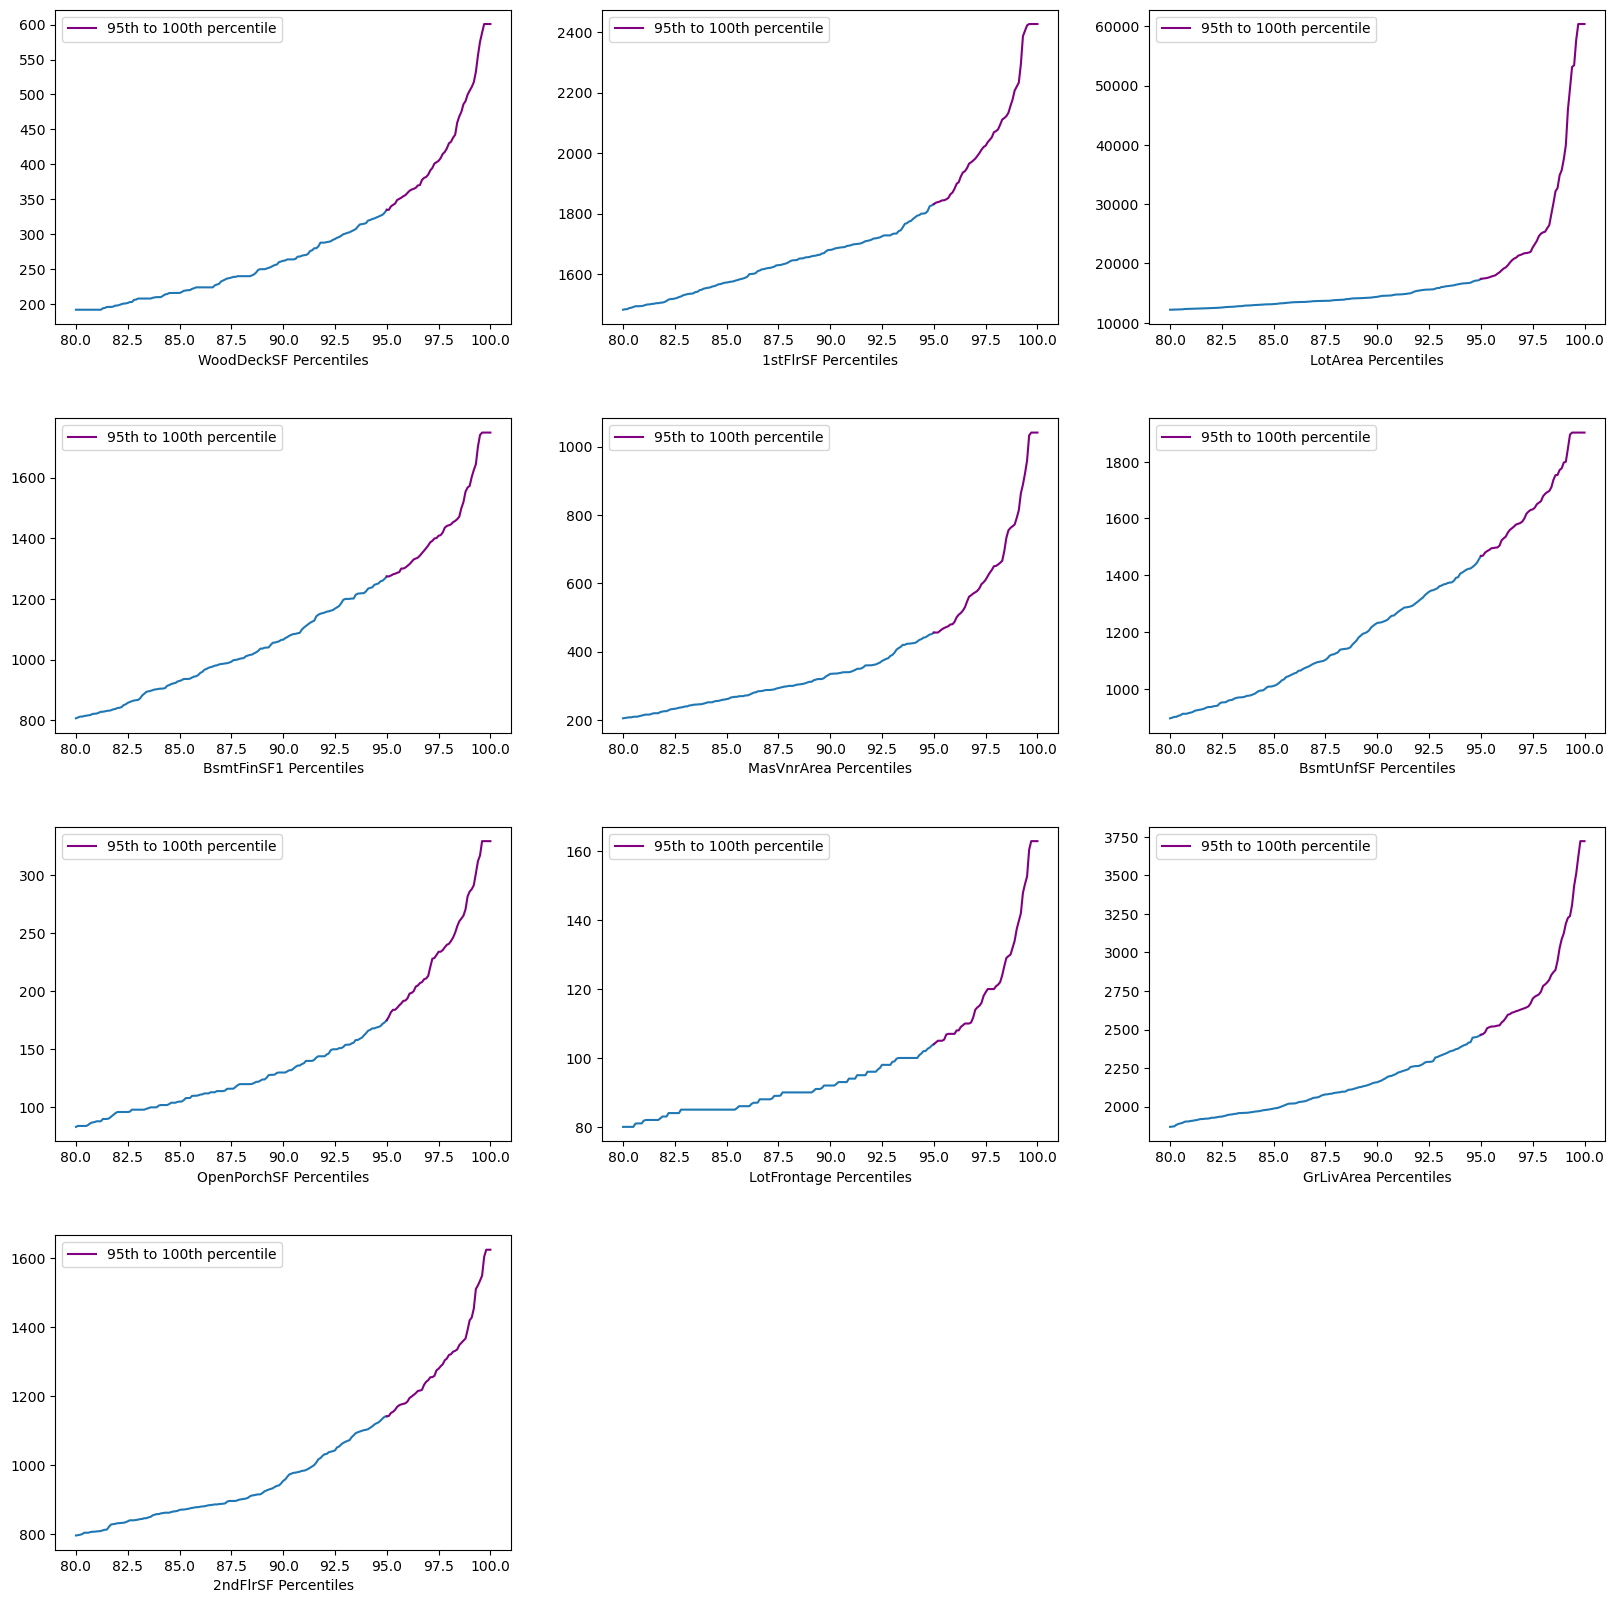

In [149]:
percentiles = np.linspace(80, 95, 151)
high_percentiles = np.linspace(95, 100, 51)

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

for i, feature in enumerate(feat_to_cap, 1):
    plt.subplot(4, 3, i)
    plt.plot(percentiles, np.percentile(X_train[feature], percentiles))
    plt.plot(high_percentiles, np.percentile(X_train[feature], high_percentiles), 
             color="purple", label="95th to 100th percentile")
    
    plt.xlabel(feature + " Percentiles")
    plt.legend()

plt.subplots_adjust(hspace=0.3)

fig.delaxes(axs.flatten()[i])
fig.delaxes(axs.flatten()[i + 1])

### **Log transformation of numeric features**

In order to help the lasso model, let's do a log transformation for skewed features.

In [150]:
num_feat = list(set(num_feat) - set(col_to_drop))

for qf in num_feat:
    if stats.skew(X_train[qf]) > 0.5:
        X_train[qf] = np.log1p(X_train[qf])
        X_test[qf] = np.log1p(X_test[qf])

### **Log transformation of the sale price**

Let's do the same for the target feature.

In [151]:
y_train = np.log1p(y_train)

### **One-hot encoding**

And let's do one-hot encoding to help our models deal with categorical features.

In [152]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [153]:
X_train.shape, train_data.shape

((1460, 261), (1460, 81))

In [154]:
X_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     4.189655  9.042040            7     1.791759       2003          2003   
1     4.394449  9.169623            6     2.197225       1976          1976   
2     4.234107  9.328212            7     1.791759       2001          2002   
3     4.110874  9.164401            7     1.791759       1915          1970   
4     4.442651  9.565284            8     1.791759       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  \
0    5.283204    6.561031         0.0   5.017280  6.753438  6.751101   
1    0.000000    6.886532         0.0   5.652489  7.141245  0.000000   
2    5.093750    6.188264         0.0   6.075346  6.825460  6.765039   
3    0.000000    5.379897         0.0   6.293419  6.869014  6.629363   
4    5.860786    6.486161         0.0   6.196444  7.044033  6.960348   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0   7.444833      0.693147      0.000000         2  0.693147   
1           0.0   7.141245      0.000000      0.693147         2  0.000000   
2           0.0   7.488294      0.693147      0.000000         2  0.693147   
3           0.0   7.448916      0.693147      0.000000         1  0.000000   
4           0.0   7.695758      0.693147      0.000000         2  0.693147   

   BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  \
0             3      0.693147    0.000000         2.0    0.000000   
1             3      0.693147    0.693147         2.0    5.700444   
2             3      0.693147    0.693147         2.0    0.000000   
3             3      0.693147    0.693147         3.0    0.000000   
4             4      0.693147    0.693147         3.0    5.262690   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MoSold  \
0     4.127134       0.000000        0.0          0.0       0.0       2   
1     0.000000       0.000000        0.0          0.0       0.0       5   
2     3.761200       0.000000        0.0          0.0       0.0       9   
3     3.583519       5.609472        0.0          0.0       0.0       2   
4     4.442651       0.000000        0.0          0.0       0.0      12   

   YrSold  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0    2008             False        False        False         True   
1    2007             False        False        False         True   
2    2008             False        False        False         True   
3    2006             False        False        False         True   
4    2008             False        False        False         True   

   MSZoning_RM  Alley_Grvl  Alley_NA  Alley_Pave  LotShape_IR1  LotShape_IR2  \
0        False       False      True       False         False         False   
1        False       False      True       False         False         False   
2        False       False      True       False          True         False   
3        False       False      True       False          True         False   
4        False       False      True       False          True         False   

   LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0         False          True            False            False   
1         False          True            False            False   
2         False         False            False            False   
3         False         False            False            False   
4         False         False            False            False   

   LandContour_Low  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  \
0            False             True             False              False   
1            False             True             False              False   
2            False             True             False              False   
3            False             True              True              False   
4            False             True             False              False   

In [155]:
X_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
1460     4.394449  9.360741            5     1.945910       1961   
1461     4.406719  9.565775            6     1.945910       1958   
1462     4.317488  9.534668            5     1.791759       1997   
1463     4.369448  9.208238            6     1.945910       1998   
1464     3.784190  8.518392            8     1.791759       1992   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  1stFlrSF  \
1460          1961    0.000000    6.150603    4.976734   5.602119  6.799056   
1461          1958    4.691348    6.828712    0.000000   6.008813  7.192934   
1462          1998    0.000000    6.674561    0.000000   4.927254  6.834109   
1463          1998    3.044522    6.401917    0.000000   5.783825  6.831954   
1464          1992    0.000000    5.575949    0.000000   6.925595  7.155396   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1460  0.000000           0.0   6.799056           0.0           0.0         1   
1461  0.000000           0.0   7.192934           0.0           0.0         1   
1462  6.553933           0.0   7.396335           0.0           0.0         2   
1463  6.520621           0.0   7.380879           0.0           0.0         2   
1464  0.000000           0.0   7.155396           0.0           0.0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  \
1460  0.000000             2      0.693147    0.000000         1.0   
1461  0.693147             3      0.693147    0.000000         1.0   
1462  0.693147             3      0.693147    0.693147         2.0   
1463  0.693147             3      0.693147    0.693147         2.0   
1464  0.000000             2      0.693147    0.000000         2.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1460    4.948760     0.000000            0.0        0.0     4.795791   
1461    5.976351     3.610918            0.0        0.0     0.000000   
1462    5.361292     3.555348            0.0        0.0     0.000000   
1463    5.888878     3.610918            0.0        0.0     0.000000   
1464    0.000000     4.418841            0.0        0.0     4.976734   

      PoolArea  MoSold  YrSold  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
1460       0.0       6    2010             False        False         True   
1461       0.0       6    2010             False        False        False   
1462       0.0       3    2010             False        False        False   
1463       0.0       6    2010             False        False        False   
1464       0.0       1    2010             False        False        False   

      MSZoning_RL  MSZoning_RM  Alley_Grvl  Alley_NA  Alley_Pave  \
1460        False        False       False      True       False   
1461         True        False       False      True       False   
1462         True        False       False      True       False   
1463         True        False       False      True       False   
1464         True        False       False      True       False   

      LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  \
1460         False         False         False          True            False   
1461          True         False         False         False            False   
1462          True         False         False         False            False   
1463          True         False         False         False            False   
1464          True         False         False         False            False   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_Corner  \
1460            False            False             True             False   
1461            False            False             True              True   
1462            False            False             True             False   
1463            False            False             True             False   
1464             True          

## **Model training**

### **Lasso**

#### **Model**

The lasso model is a linear regression model with a L1 regularization, meaning that certain features could have a zero coefficient, leading to some sort of automatic feature selection. The importance of regularization is controlled by the parameter alpha.

A high value of alpha tends to lead to undefitting, this is why we choose a very low range for this parameter.

In [156]:
param_grid = {"alpha": np.linspace(0.0001, 0.0009, 9)}

In [157]:
grid = GridSearchCV(Lasso(), param_grid=param_grid, n_jobs=-1)

In [158]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009])})

In [159]:
grid.best_params_

{'alpha': 0.0006000000000000001}

In [160]:
lasso_cv = grid.best_estimator_

Let's plot the features with the most important coefficients.

In [161]:
feature_names = X_train.columns

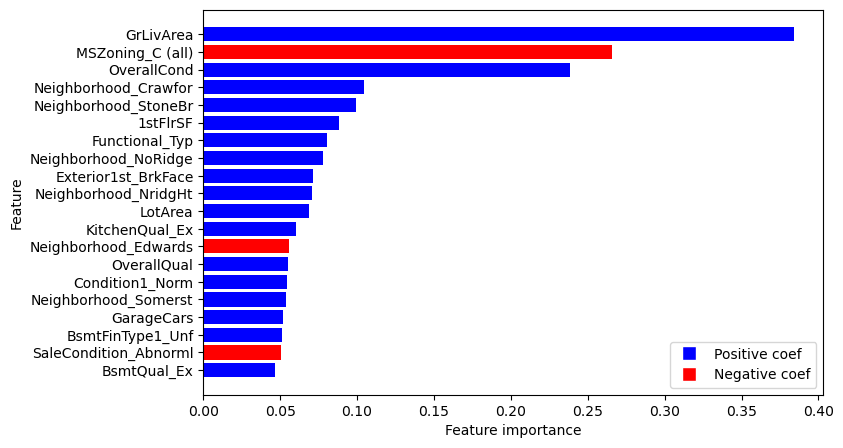

In [162]:
coefs = lasso_cv.coef_

feat_coefs_df = pd.DataFrame(data={"Coef": coefs, "Neg": coefs < 0, "Importance": np.abs(coefs)}, 
                             index=feature_names)

feat_coefs_df = feat_coefs_df.sort_values(by="Importance").reset_index(names="Feature")[-20:]

colors = np.where(feat_coefs_df["Neg"], "red", "blue")

plt.figure(figsize=(8, 5))
plt.barh(feat_coefs_df["Feature"], feat_coefs_df["Importance"], color=colors, align="center")
plt.xlabel("Feature importance")
plt.ylabel("Feature")

positive_legend = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=10, label='Positive coef')
negative_legend = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, label='Negative coef')
plt.legend(handles=[positive_legend, negative_legend]);

The surface above ground (GrLivArea) and the overall condition are the most positive features. On the opposite, a commercial classification (MSZoning_C) is a negative feature for the sale price.

#### **Predictions**

Let's use our lasso model to predict on the dataset and let's build our csv file for the submission.

In [163]:
y_train_pred_lasso = np.expm1(lasso_cv.predict(X_train))

In [164]:
predictions_lasso = np.expm1(lasso_cv.predict(X_test))
predictions = predictions_lasso.astype("int64")

test_sub = pd.DataFrame({"Id": test_data["Id"],
                        "SalePrice": predictions}, dtype="int64")

test_sub.to_csv("submission.csv", index=False)

Let's submit using the Kaggle API.

In [165]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Lasso with alpha=.0006, log-transformed sale price and features, capped features (99th perc)"

Successfully submitted to House Prices - Advanced Regression Techniques



  0%|          | 0.00/18.4k [00:00<?, ?B/s]
 43%|####3     | 8.00k/18.4k [00:00<00:00, 19.5kB/s]
100%|##########| 18.4k/18.4k [00:01<00:00, 18.7kB/s]


Let's retrieve our submission score (wait for a couple of seconds before).

In [166]:
submissions = subprocess.getoutput("kaggle competitions submissions -c house-prices-advanced-regression-techniques")
latest_submission_score = re.findall(r'\d\.\d+', submissions)[0]

In [167]:
print("Accuracy of train: {:.5f}".format(np.sqrt(mean_squared_log_error(np.expm1(y_train), y_train_pred_lasso))))
print("Accuracy of test: {:.5f}".format(float(latest_submission_score)))
print("Number of features used: {}".format(np.sum(lasso_cv.coef_ != 0)))

Accuracy of train: 0.11044
Accuracy of test: 0.12474
Number of features used: 95


### **XG Boost**

#### **Model**

Now let's use Gradient Boosting Decision Trees. This algorithm works with "weak learners" which are shallow decision trees. The first decision tree is fitted to the training dataset and the next ones are fitted to the errors of the previous one. For every trees, a different sampling configuration for rows and features is randomly selected.

Since we choose a high number of estimators (from 1000 to 5000), we compensate it by choosing a small value for the learning rate (0.01).

In [168]:
param_grid = {"n_estimators": np.arange(1000, 5100, 500), 
              "subsample": np.linspace(0.7, 1.0, 4), 
              "colsample_bytree": np.linspace(0.7, 1.0, 4)}

In [169]:
grid = GridSearchCV(XGBRegressor(n_jobs=-1, learning_rate=0.01, seed=42, max_depth=2), 
                    param_grid=param_grid, 
                    n_jobs=-1)

In [170]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.01, max_bi...
                                    max_depth=2, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': array([0.7, 0.8, 0.9, 1. ]),
                         'n_estimators': array([1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]),
                         'subsample': array([0.7, 0.8, 0.9, 1. ])})

In [171]:
grid.best_params_

{'colsample_bytree': 0.7, 'n_estimators': 5000, 'subsample': 0.7}

In [172]:
xgb_cv = grid.best_estimator_

Let's plot the features with the most important coefficients.

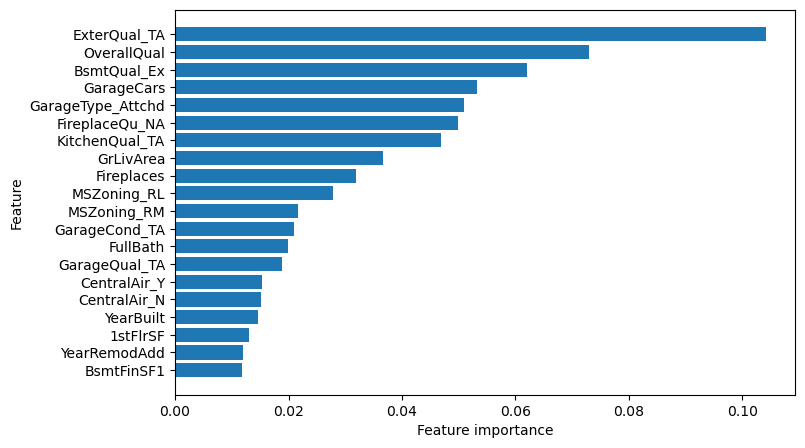

In [173]:
    feat_importances_df = pd.DataFrame(data=xgb_cv.feature_importances_, 
                                   index=feature_names, 
                                   columns=["Importance"])

    feat_importances_df = feat_importances_df.sort_values(by="Importance").reset_index(names="Feature")[-20:]
    
    plt.figure(figsize=(8, 5))
    plt.barh(feat_importances_df["Feature"], feat_importances_df["Importance"], align="center")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature");

Here, the most important features are a typical exterior material quality, the overall quality and an excellent basement quality. These features are different from the lasso model features, which is normal since the training process is different. Moreover, the variety of approaches will be useful when we will blend the models.

#### **Predictions**

Let's use our gradient boosting model to predict on the dataset and let's build our csv file for the submission.

In [174]:
y_train_pred_xgb = np.expm1(xgb_cv.predict(X_train))

In [175]:
predictions_xgb = np.expm1(xgb_cv.predict(X_test))
predictions = predictions_xgb.astype("int64")

test_sub = pd.DataFrame({"Id": test_data["Id"],
                        "SalePrice": predictions}, dtype="int64")


test_sub.to_csv("submission.csv", index=False)

Let's submit using the Kaggle API.

In [176]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "XG Boost regressor max_depth=2 from grid search"

Successfully submitted to House Prices - Advanced Regression Techniques



  0%|          | 0.00/18.4k [00:00<?, ?B/s]
 43%|####3     | 8.00k/18.4k [00:00<00:00, 17.0kB/s]
100%|##########| 18.4k/18.4k [00:01<00:00, 17.4kB/s]


Let's retrieve our submission score (wait for a couple of seconds before).

In [177]:
submissions = subprocess.getoutput("kaggle competitions submissions -c house-prices-advanced-regression-techniques")
latest_submission_score = re.findall(r'\d\.\d+', submissions)[0]

In [178]:
print("Accuracy of train: {:.3f}".format(np.sqrt(mean_squared_log_error(np.expm1(y_train), y_train_pred_xgb))))
print("Accuracy of test: {:.3f}".format(float(latest_submission_score)))

Accuracy of train: 0.069
Accuracy of test: 0.128


### **Blending models**

Now let's take the average of these models as our final predictions

In [179]:
y_train_pred = 0.5 * y_train_pred_lasso + 0.5 * y_train_pred_xgb

In [180]:
predictions = 0.5 * predictions_lasso + 0.5 * predictions_xgb
predictions = predictions.astype("int64")

test_sub = pd.DataFrame({"Id": test_data["Id"],
                        "SalePrice": predictions}, dtype="int64")

test_sub.to_csv("submission.csv", index=False)

Let's submit using the Kaggle API.

In [181]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Blending Lasso and XGBoost"

Successfully submitted to House Prices - Advanced Regression Techniques



  0%|          | 0.00/18.4k [00:00<?, ?B/s]
 43%|####3     | 8.00k/18.4k [00:00<00:00, 17.2kB/s]
100%|##########| 18.4k/18.4k [00:01<00:00, 17.1kB/s]


Let's retrieve our submission score (wait for a couple of seconds before).

In [182]:
submissions = subprocess.getoutput("kaggle competitions submissions -c house-prices-advanced-regression-techniques")
latest_submission_score = re.findall(r'\d\.\d+', submissions)[0]

In [183]:
print("Accuracy of train: {:.5f}".format(np.sqrt(mean_squared_log_error(np.expm1(y_train), y_train_pred))))
print("Accuracy of test: {:.5f}".format(float(latest_submission_score)))

Accuracy of train: 0.08691
Accuracy of test: 0.12263
